In [2]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
from heapq import merge
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\n22-webb\OneDrive - UWE Bristol\studyanalysis\transformations.py:1924: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


## Create DF for VICON data

In [12]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study4H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in file])

# file = Path("study1H.csv")
# GROUP=file.name.split("H")[0]
# d_df = pd.read_csv(file)
# d_df['GROUP'] = GROUP

# file2 = Path("study2H.csv")
# GROUP2=file2.name.split("H")[0]
# d_df2 = pd.read_csv(file2)
# d_df2['GROUP'] = GROUP2


# data_df = d_df.append(d_df2, ignore_index=True)
# data_df = pd.concat([d_df, d_df2], ignore_index=True, sort=False)

csv_files = Path("").glob("*H.csv")
data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files])
# data_df['GROUP'] = 

<generator object Path.glob at 0x0000022980007660>


In [13]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0          1          0       NaN       NaN        NaN          NaN   
1          2          0       NaN       NaN        NaN          NaN   
2          3          0       NaN       NaN        NaN          NaN   
3          4          0  2.425969  0.099261 -89.028012  -723.095154   
4          5          0  2.426525  0.098838 -89.028694  -723.002930   
...      ...        ...       ...       ...        ...          ...   
80113  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
80114  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
80115  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
80116  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
80117  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

               1TY          1TZ       2RX       2RY  ...          4TX  \
0              NaN          NaN       NaN       NaN  ...   -86.220253   
1              NaN          NaN       NaN       NaN  ...   -86.903648   
2              NaN          NaN       NaN       NaN  ...   -87.555389   
3      -749.753662  1761.347290       NaN       NaN  ...   -88.151741   
4      -749.562805  1761.383179       NaN       NaN  ...   -88.929825   
...            ...          ...       ...       ...  ...          ...   
80113 -1438.786865  1068.234619  0.409880 -3.846665  ...  1949.711304   
80114 -1438.802124  1068.252686  0.406747 -3.846874  ...  1949.705444   
80115 -1438.787964  1068.242188  0.405425 -3.845295  ...  1949.700439   
80116 -1438.788452  1068.236450  0.407506 -3.846482  ...  1949.710205   
80117 -1438.820312  1068.266724  0.409008 -3.846727  ...  1949.689697   

               4TY          4TZ       5RX       5RY        5RZ         5TX  \
0       818.517395  1798.021973  1.212219  0.045618 -87.467487  -38.479145   
1       819.127197  1798.149170  1.213007  0.045643 -87.467487  -39.157539   
2       819.722473  1798.270142  1.213187  0.046975 -87.467861  -39.863754   
3       820.284424  1798.372803  1.212633  0.047152 -87.468085  -40.523148   
4       820.954712  1798.596069  1.212393  0.046770 -87.468515  -41.103912   
...            ...          ...       ...       ...        ...         ...   
80113 -1842.257202  1063.357056 -0.003808 -0.126373 -89.876357  663.993103   
80114 -1842.252808  1063.356323 -0.003754 -0.126231 -89.876319  663.992859   
80115 -1842.249268  1063.353149 -0.003746 -0.126173 -89.876350  663.987854   
80116 -1842.260132  1063.359741 -0.003903 -0.126301 -89.876301  663.994568   
80117 -1842.246460  1063.345215 -0.003805 -0.126234 -89.876352  663.986206   

               5TY          5TZ   GROUP  
0       855.451111  1773.667480  study1  
1       856.090454  1773.793701  study1  
2       856.770325  1773.937378  study1  
3       857.447632  1774.108154  study1  
4       857.965637  1774.213135  study1  
...            ...          ...     ...  
80113 -2095.846924   882.212646  study6  
80114 -2095.852539   882.222839  study6  
80115 -2095.842529   882.218140  study6  
80116 -2095.847656   882.218689  study6  
80117 -2095.847900   882.214844  study6  

[384295 rows x 33 columns]

In [14]:
data_df.columns
# data_df

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP'],
      dtype='object')

##### Distance - plot distance from person to person

In [15]:
df_dist= pd.DataFrame()  

print(data_df['Frame'].values)
OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist['GROUP'] = data_df['GROUP']
df_dist["Frame2"] = data_df['Frame'].astype(int)

df_dist

[    1     2     3 ... 80116 80117 80118]


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
3               NaN      0.529754      0.250855      0.470718           NaN   
4               NaN      0.529720      0.250873      0.470729           NaN   
...             ...           ...           ...           ...           ...   
80113      0.050720      0.064382      0.069926      0.449102      0.050720   
80114      0.050716      0.064384      0.069925      0.449104      0.050716   
80115      0.050717      0.064382      0.069926      0.449103      0.050717   
80116      0.050721      0.064383      0.069926      0.449101      0.050721   
80117      0.050716      0.064384      0.069924      0.449106      0.050716   

       distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN      0.529754           NaN   
4               NaN           NaN           NaN      0.529720           NaN   
...             ...           ...           ...           ...           ...   
80113      0.068123      0.035554      0.225305      0.064382      0.068123   
80114      0.068123      0.035555      0.225306      0.064384      0.068123   
80115      0.068124      0.035557      0.225308      0.064382      0.068124   
80116      0.068129      0.035556      0.225307      0.064383      0.068129   
80117      0.068126      0.035558      0.225308      0.064384      0.068126   

       ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0      ...           NaN      0.209044      0.008809           NaN   
1      ...           NaN      0.208911      0.008812           NaN   
2      ...           NaN      0.208793      0.008814           NaN   
3      ...           NaN      0.208670      0.008817      0.470718   
4      ...           NaN      0.208525      0.008826      0.470729   
...    ...           ...           ...           ...           ...   
80113  ...      0.035554      0.055650      0.198219      0.449102   
80114  ...      0.035555      0.055649      0.198218      0.449104   
80115  ...      0.035557      0.055650      0.198218      0.449103   
80116  ...      0.035556      0.055654      0.198218      0.449101   
80117  ...      0.035558      0.055649      0.198217      0.449106   

       distance_5_2  distance_5_3  distance_5_4  Frame   GROUP  Frame2  
0               NaN      0.227703      0.008809      0  study1       1  
1               NaN      0.227546      0.008812      1  study1       2  
2               NaN      0.227394      0.008814      2  study1       3  
3               NaN      0.227230      0.008817      3  study1       4  
4               NaN      0.227103      0.008826      4  study1       5  
...             ...           ...           ...    ...     ...     ...  
80113      0.225305      0.241155      0.198219  80113  study6   80114  
80114      0.225306      0.241156      0.198218  80114  study6   80115  
80115      0.225308      0.241156      0.198218  80115  study6   80116  
80116      0.225307      0.241154      0.198218  80116  study6   80117  
80117      0.225308      0.241158      0.198217  80117  study6   80118  

[384295 rows x 23 columns]

### Plot location

10000   -1442.157959
10001   -1442.608643
10002   -1443.224365
10003   -1443.643066
10004   -1443.928589
            ...     
59309    1019.692566
59310    1528.373535
59311    1527.615112
59312    1527.082031
59313    1526.210327
Name: 5TX, Length: 49314, dtype: float64


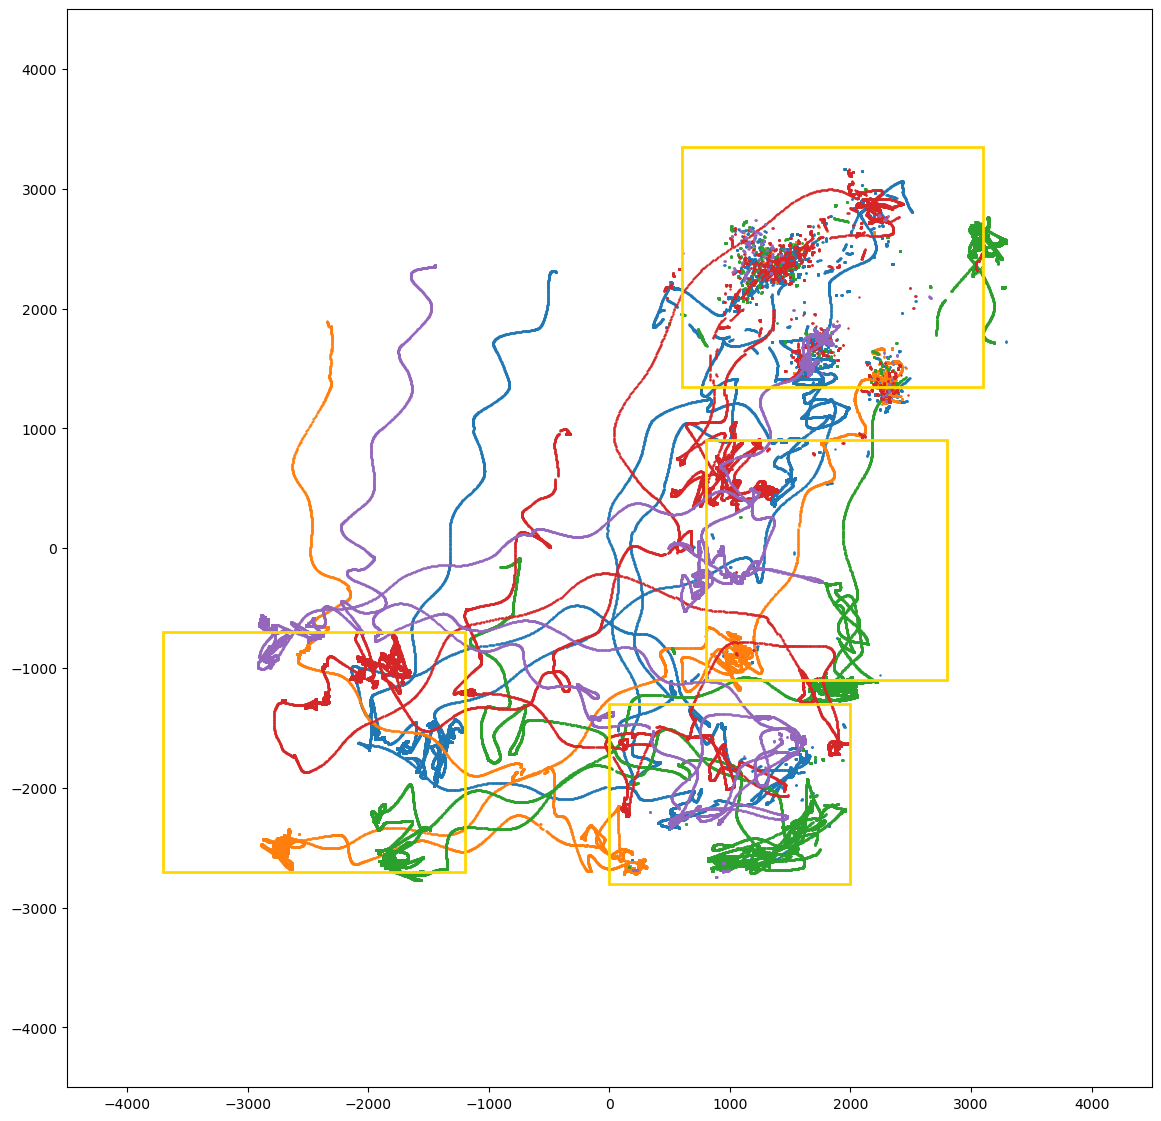

10000   -1320.150757
10001   -1319.952881
10002   -1319.769165
10003   -1319.582275
10004   -1319.413452
            ...     
76350            NaN
76351            NaN
76352            NaN
76353            NaN
76354            NaN
Name: 5TX, Length: 66355, dtype: float64


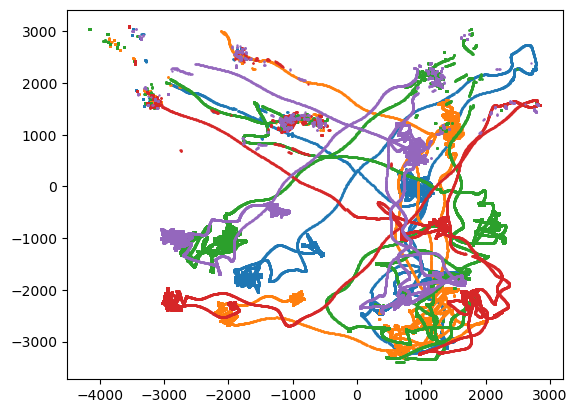

10000   -1445.514648
10001   -1445.390259
10002   -1445.977295
10003   -1446.026123
10004   -1445.925415
            ...     
48970    1282.454346
48971    1278.942993
48972    1275.679932
48973    1272.850464
48974    1269.163818
Name: 5TX, Length: 38975, dtype: float64


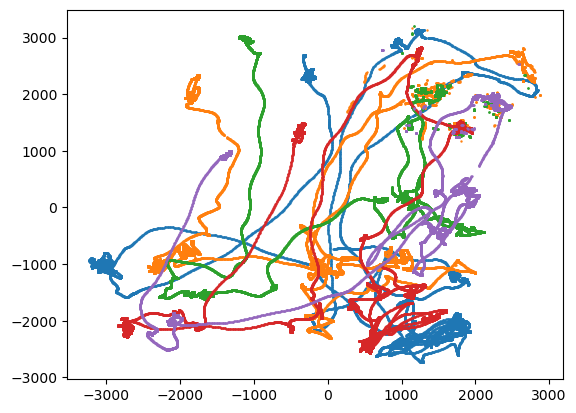

10000     410.397247
10001     411.878571
10002     413.324554
10003     414.709473
10004     416.060822
            ...     
73044    2604.039062
73045    2604.049805
73046    2604.036621
73047    2604.043701
73048    2604.054199
Name: 5TX, Length: 63049, dtype: float64


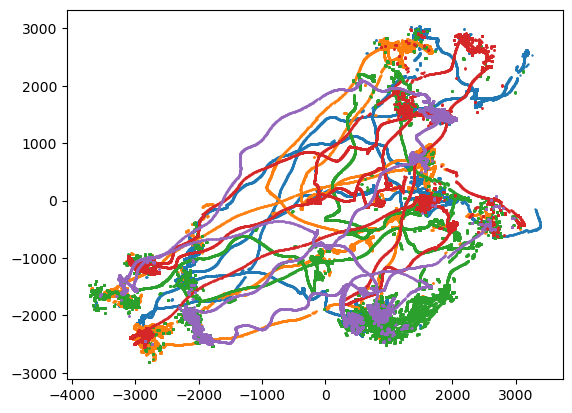

10000   -2343.827148
10001   -2343.745850
10002   -2343.613037
10003   -2343.480469
10004   -2343.310791
            ...     
46479     700.212280
46480     698.153992
46481     694.938049
46482    2513.056885
46483    2513.210693
Name: 5TX, Length: 36484, dtype: float64


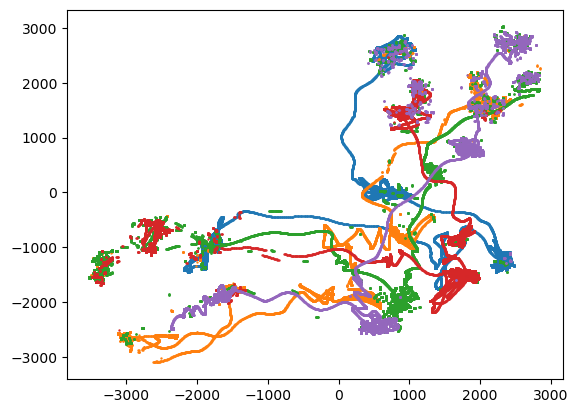

10000   -285.237427
10001   -285.258026
10002   -285.380920
10003   -285.289642
10004   -285.168915
            ...    
80113    663.993103
80114    663.992859
80115    663.987854
80116    663.994568
80117    663.986206
Name: 5TX, Length: 70118, dtype: float64


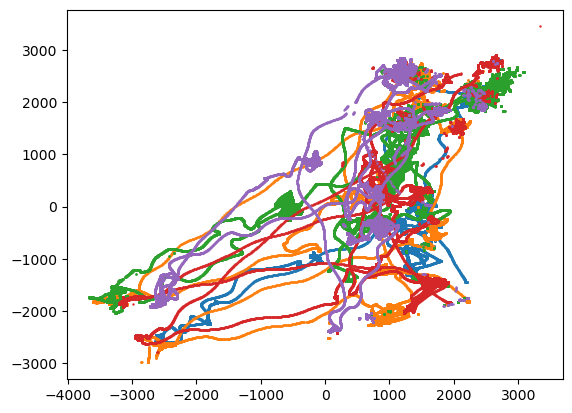

In [7]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

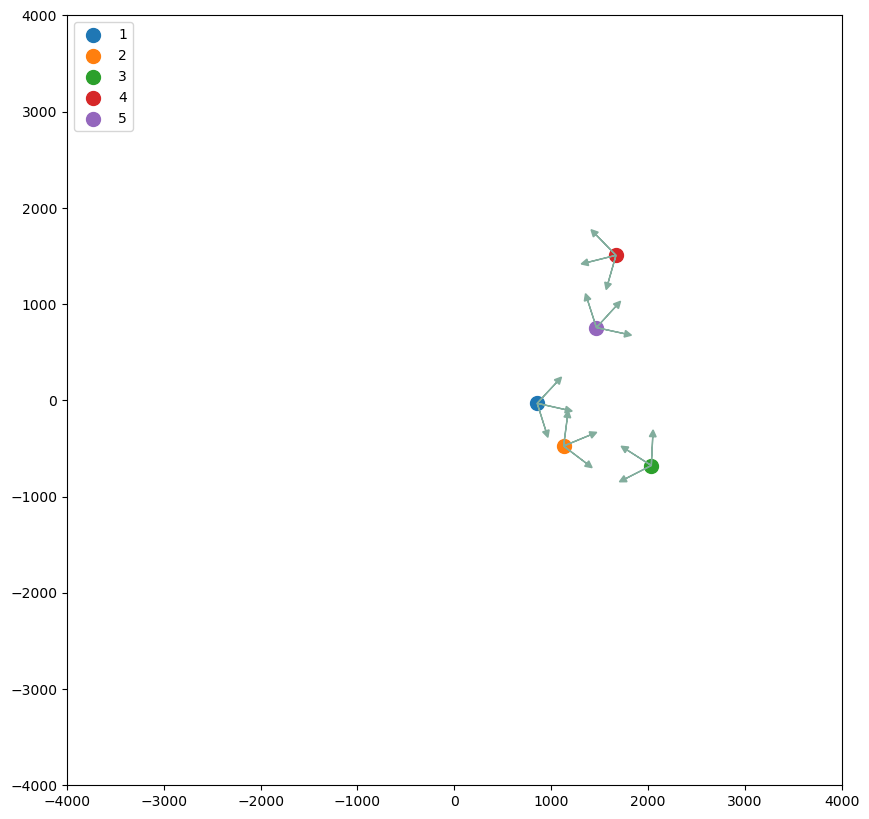

47080


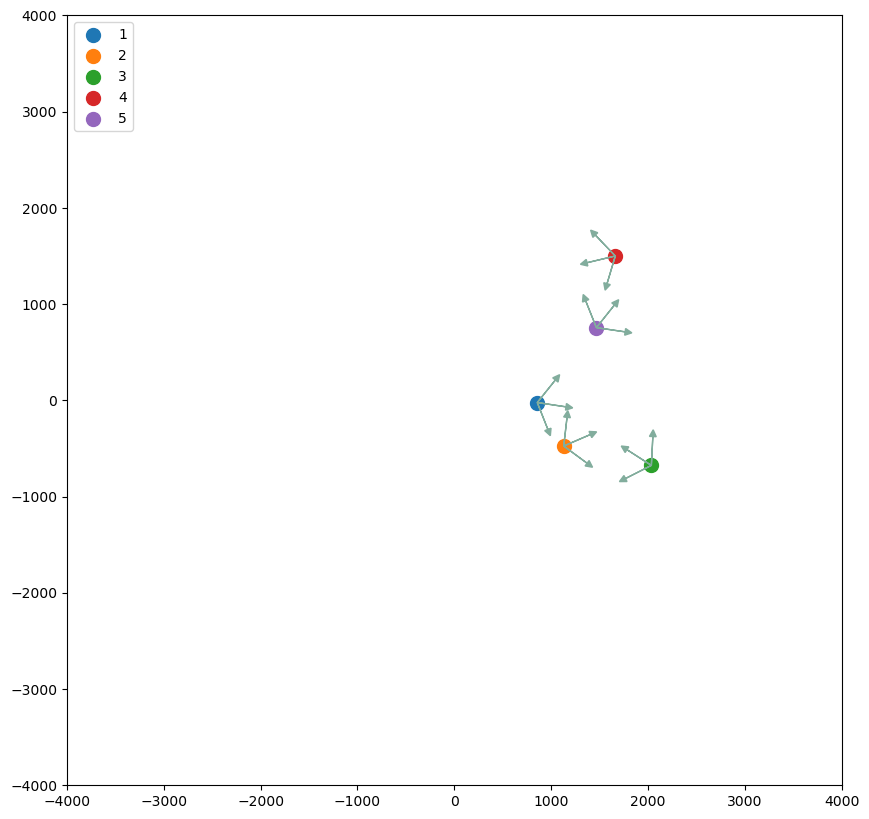

47085


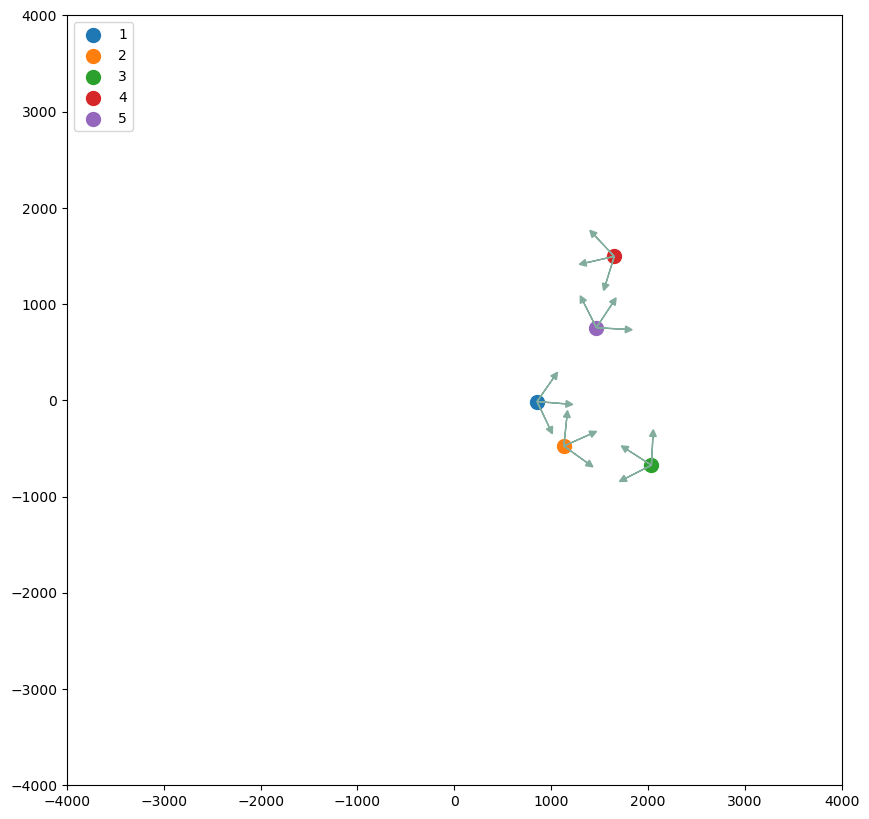

47090


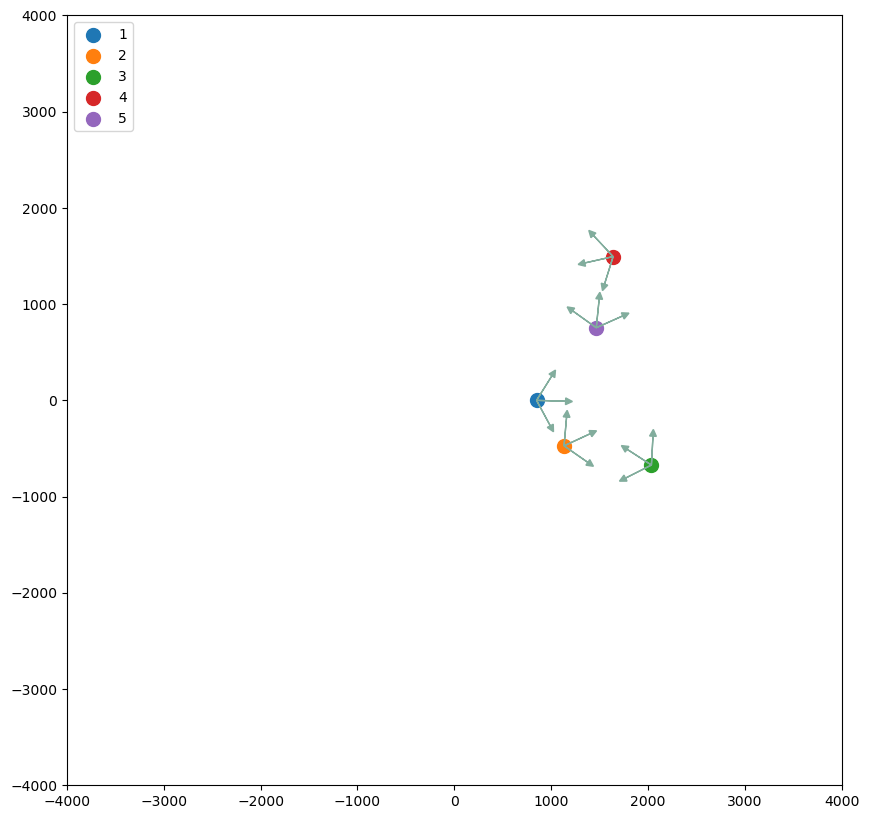

47095


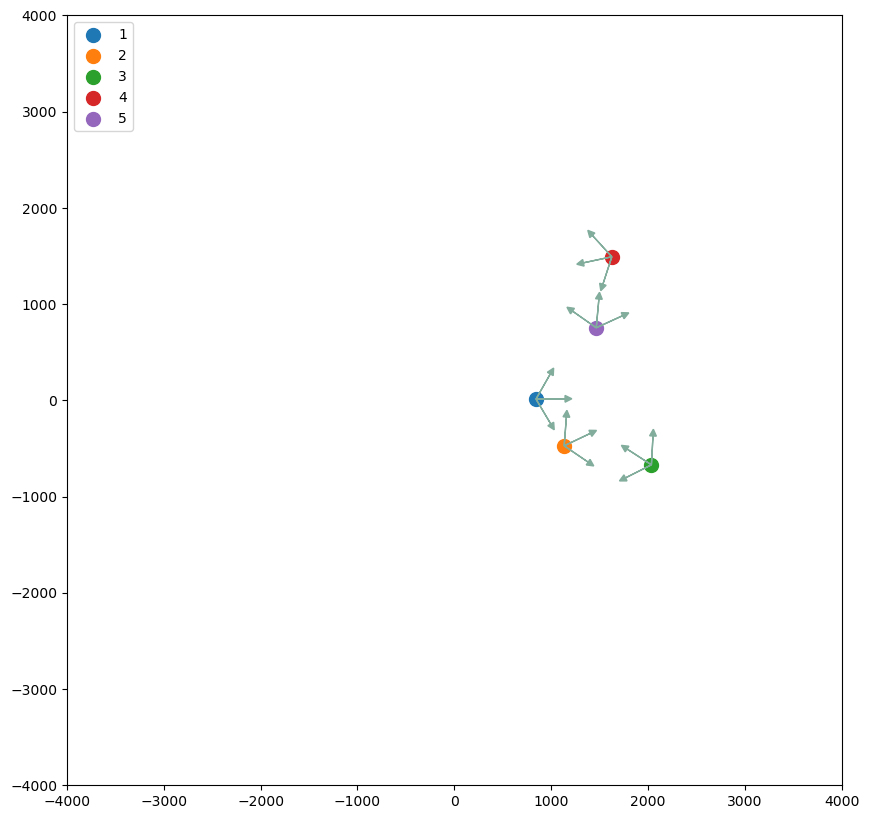

47100


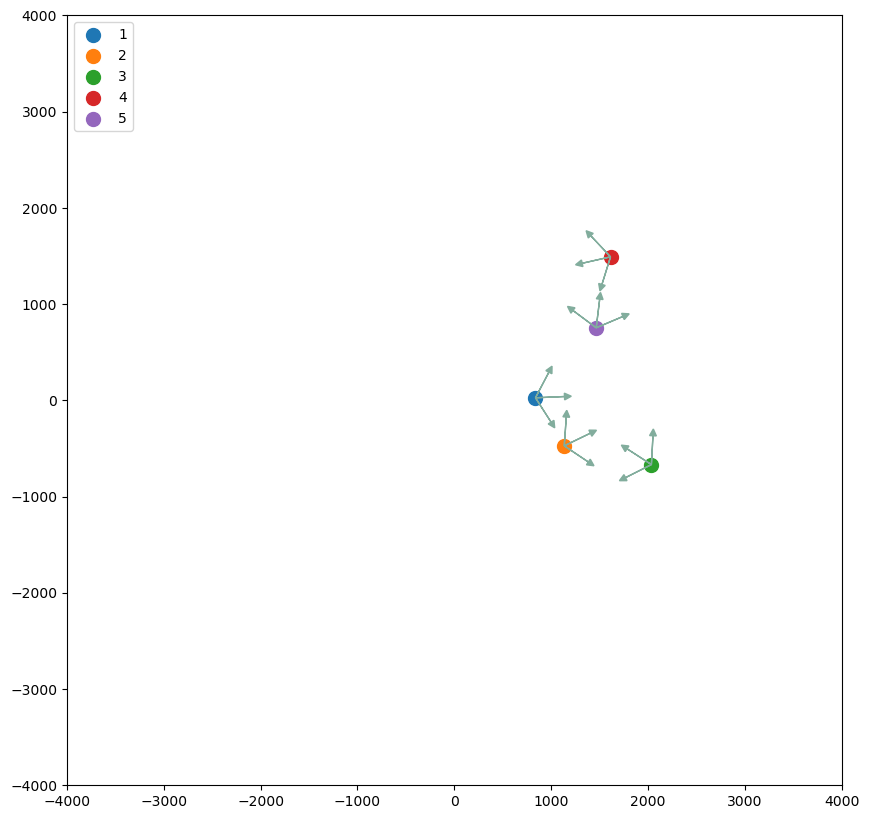

47105


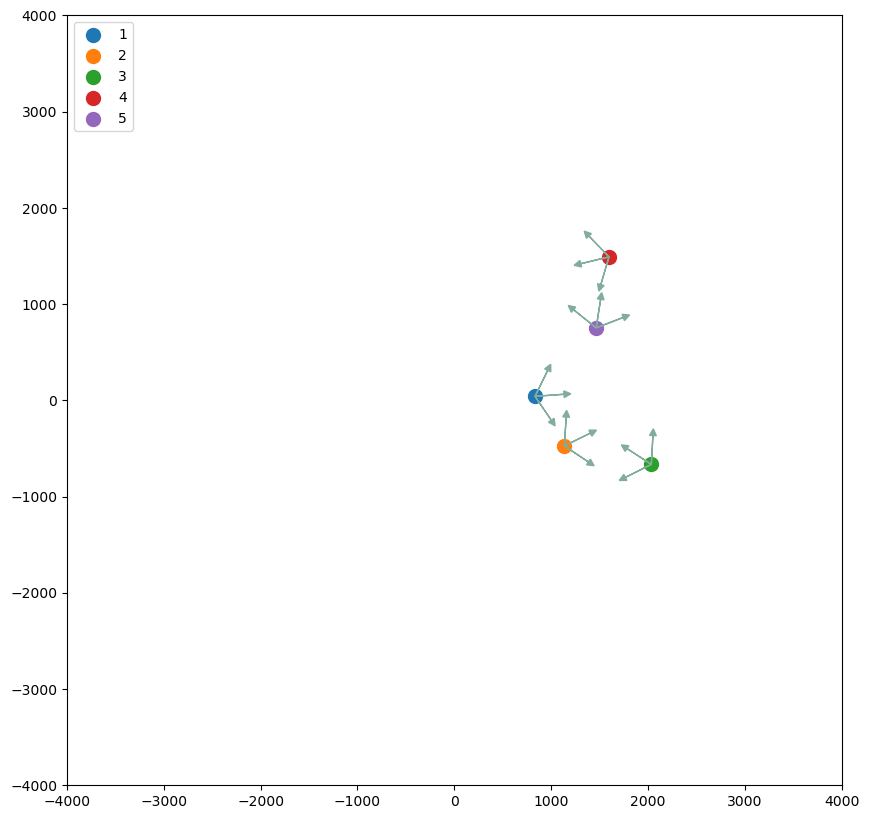

47110


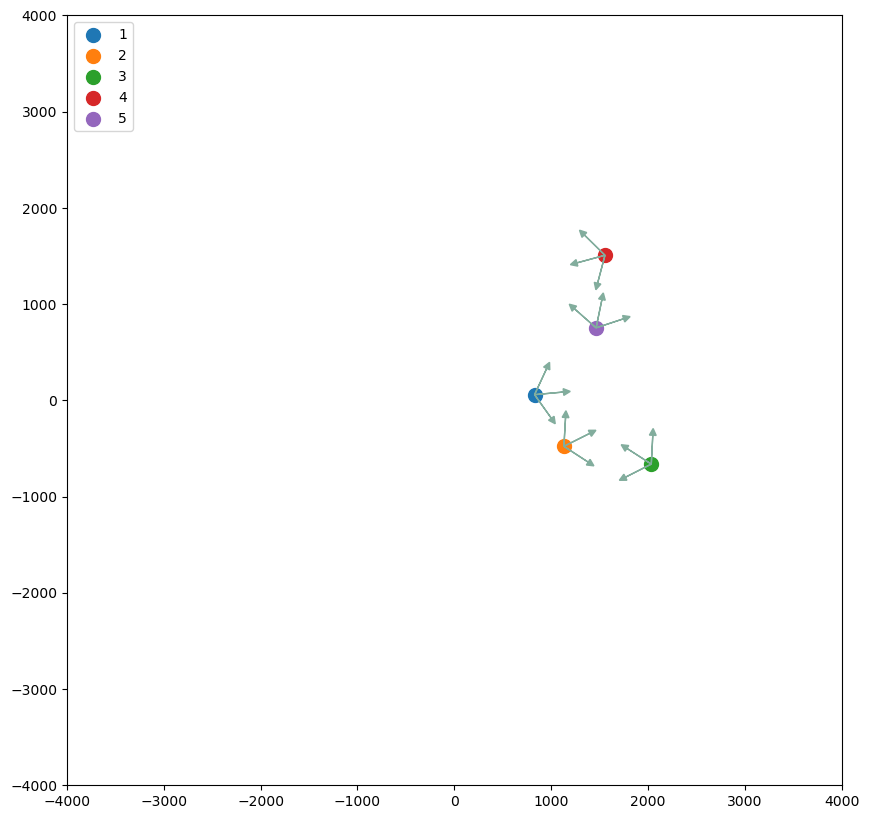

47115


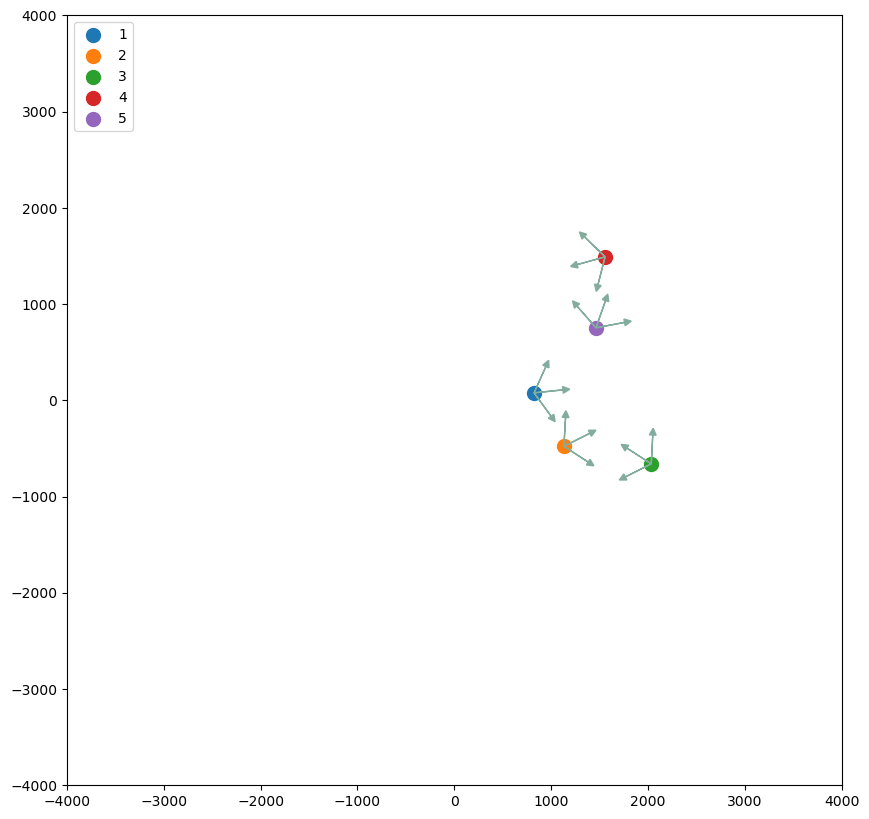

47120


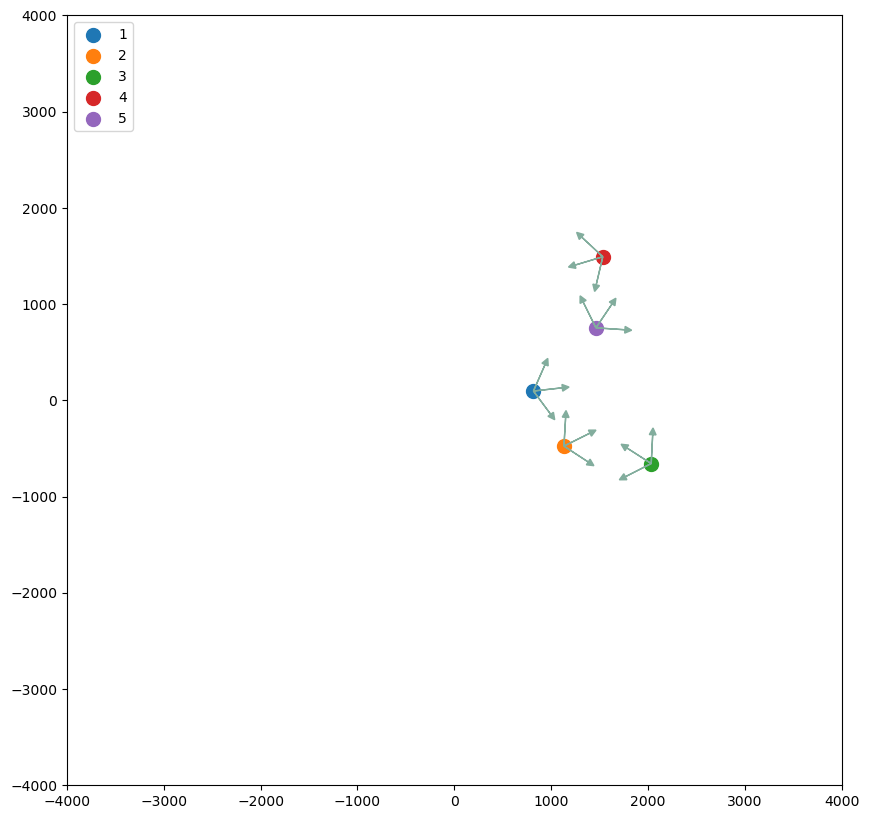

47125


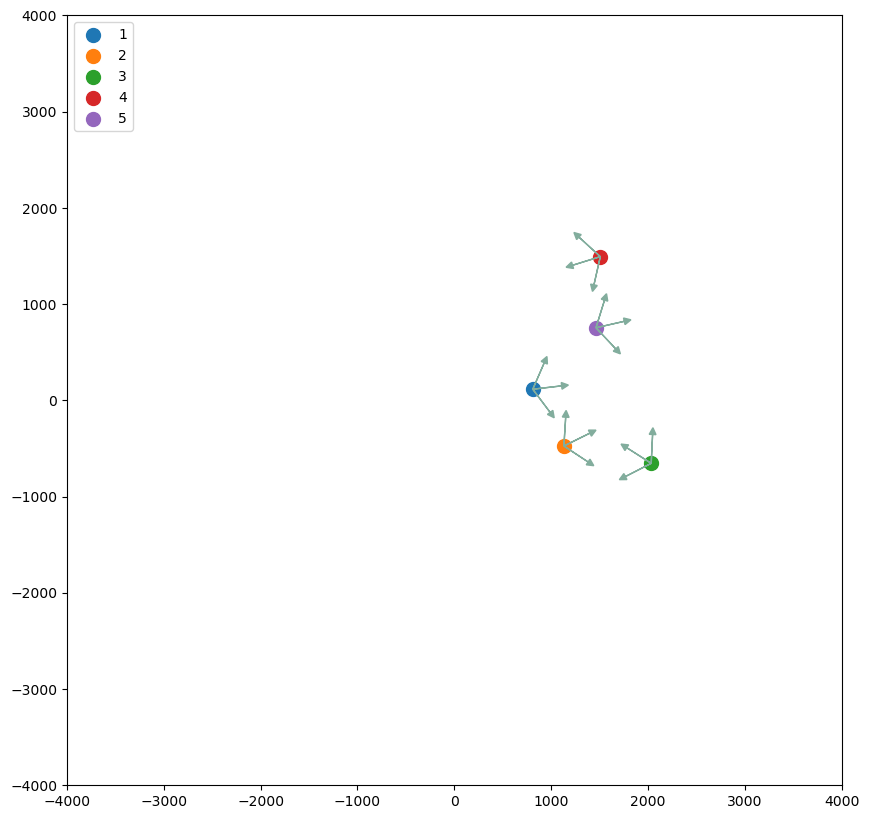

47130


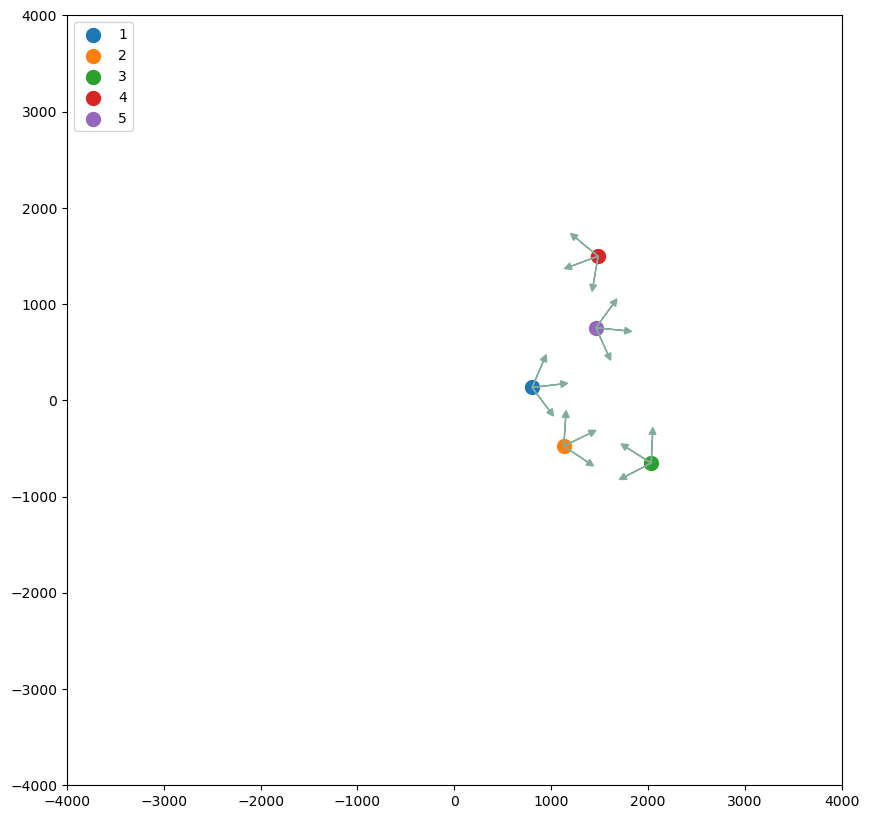

47135


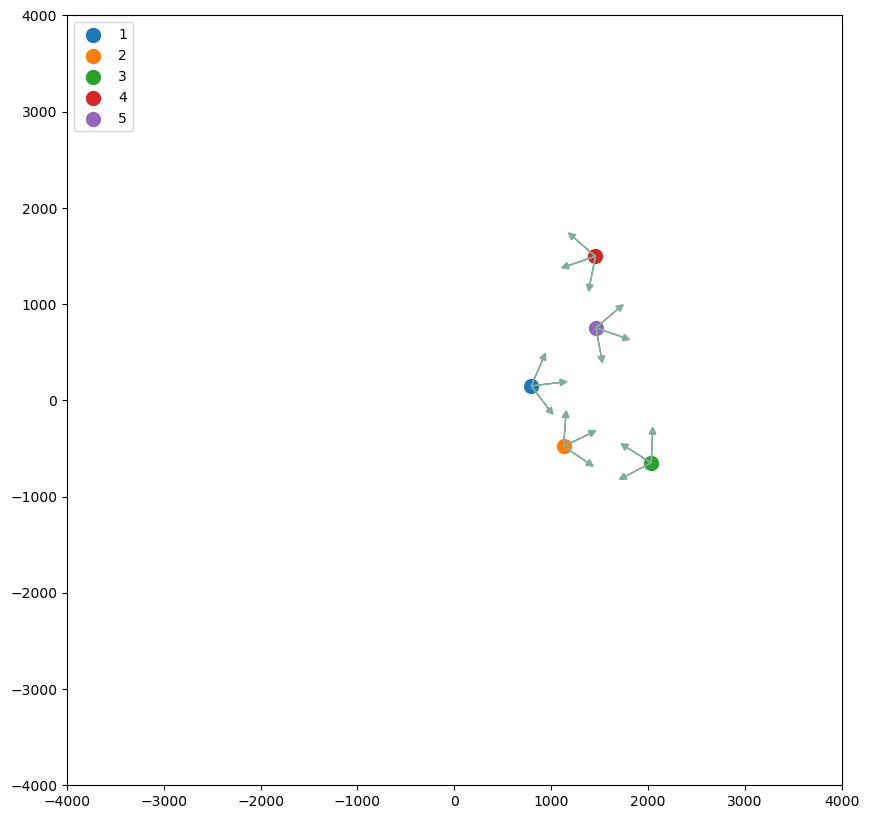

47140


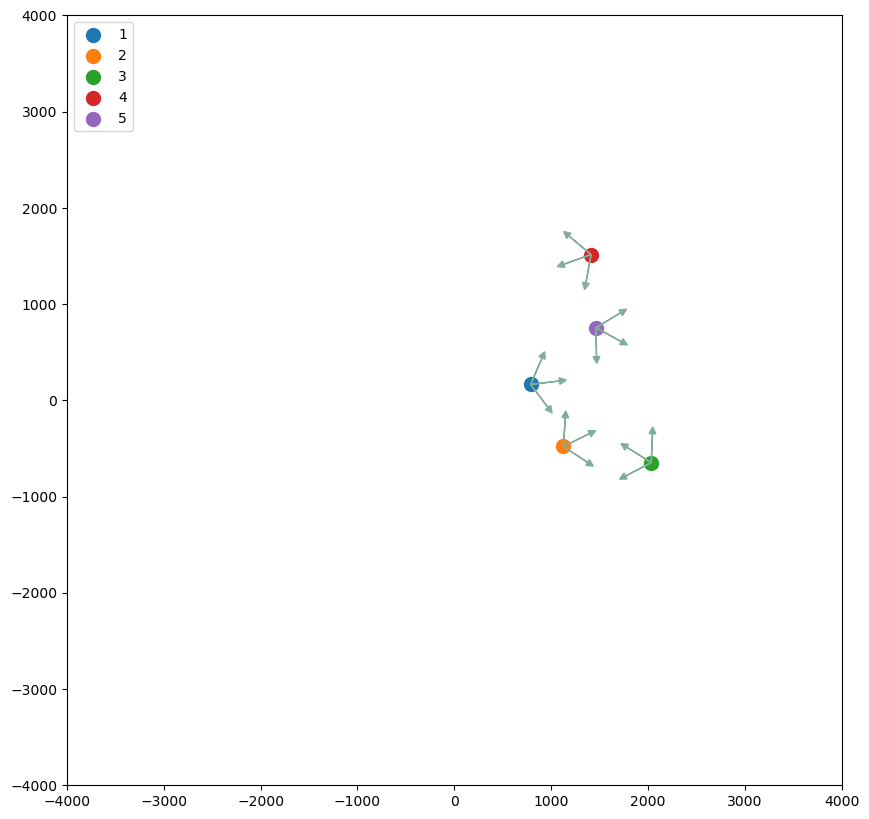

47145


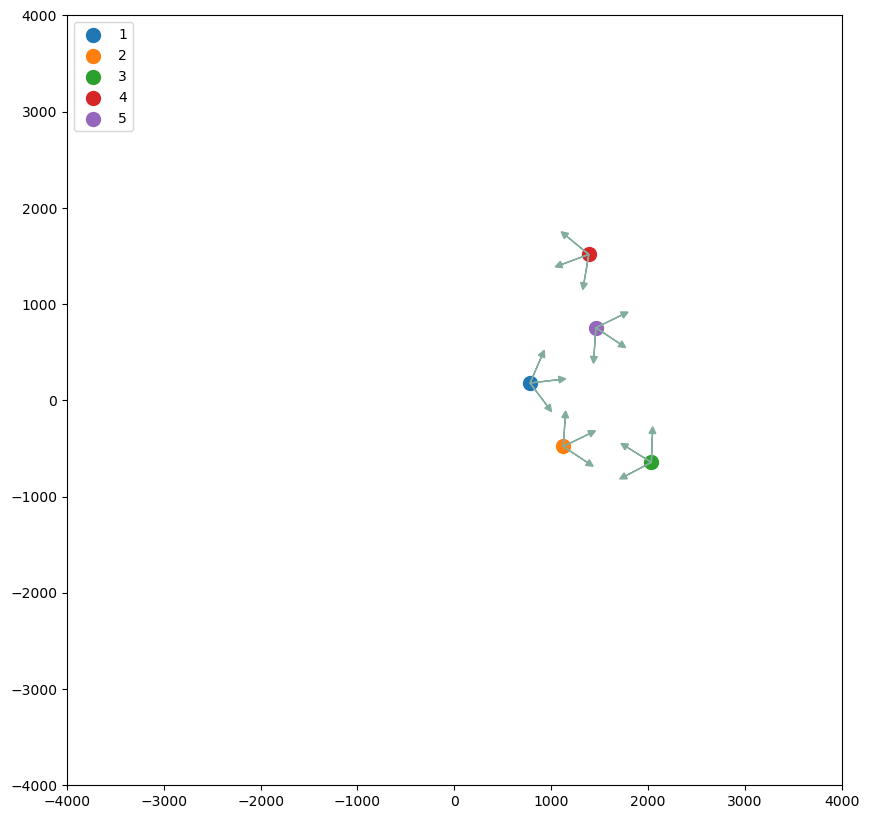

47150


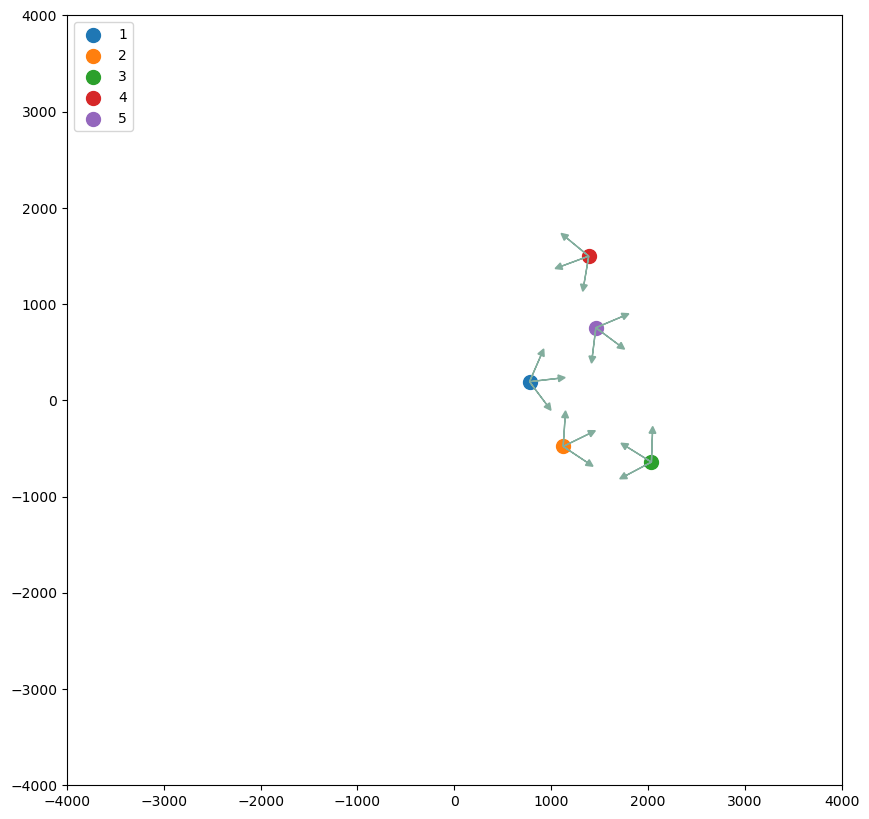

47155


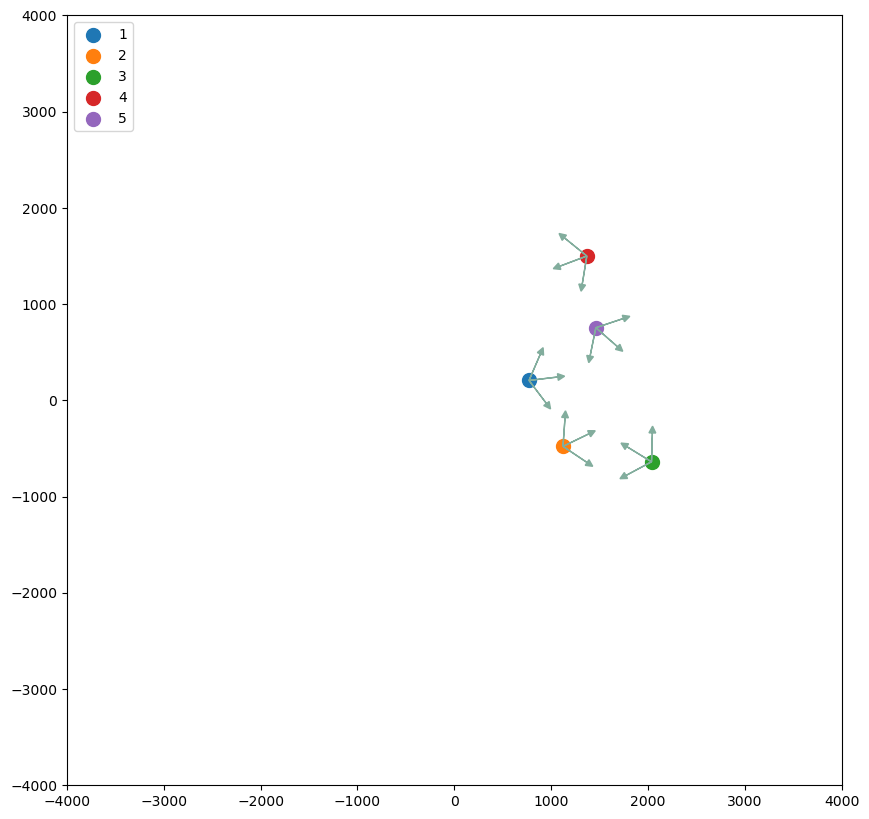

47160


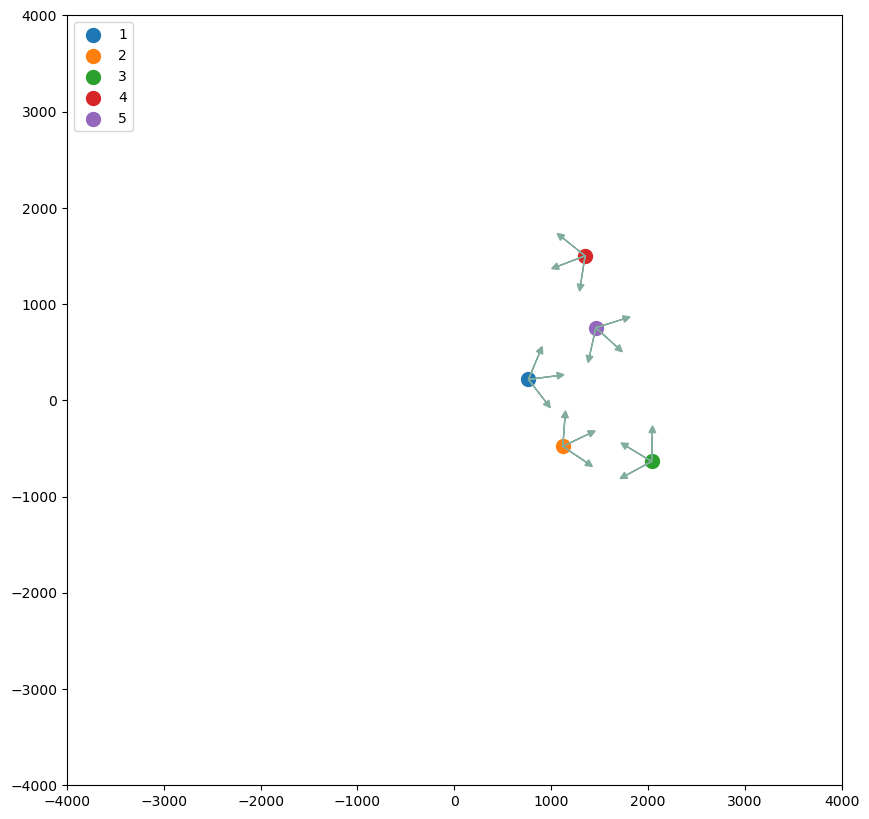

47165


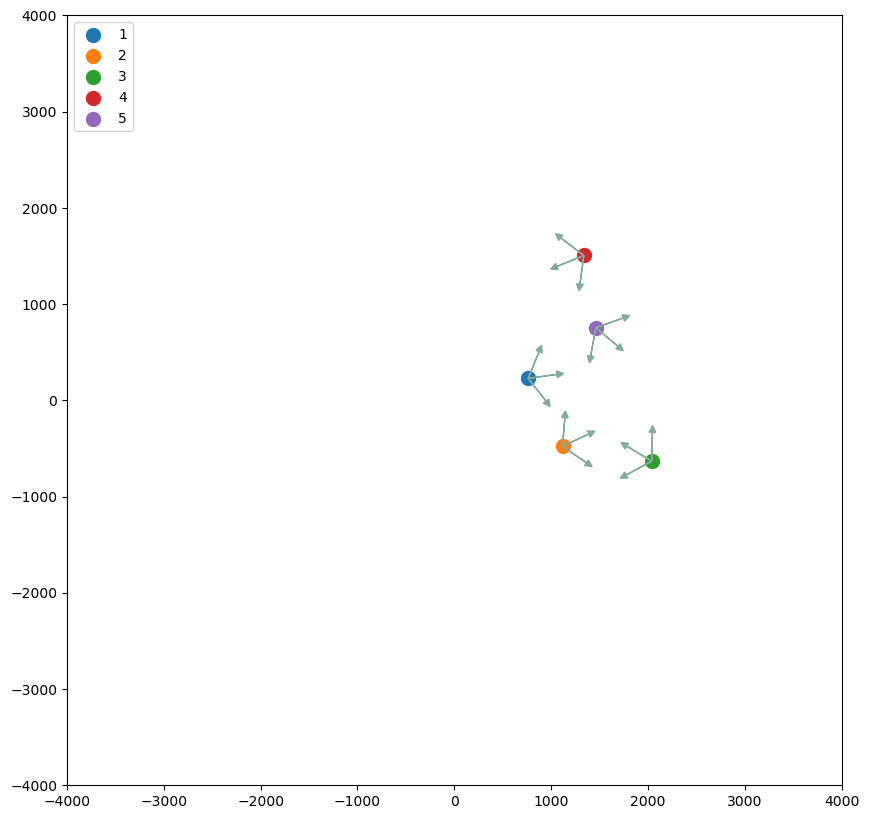

47170


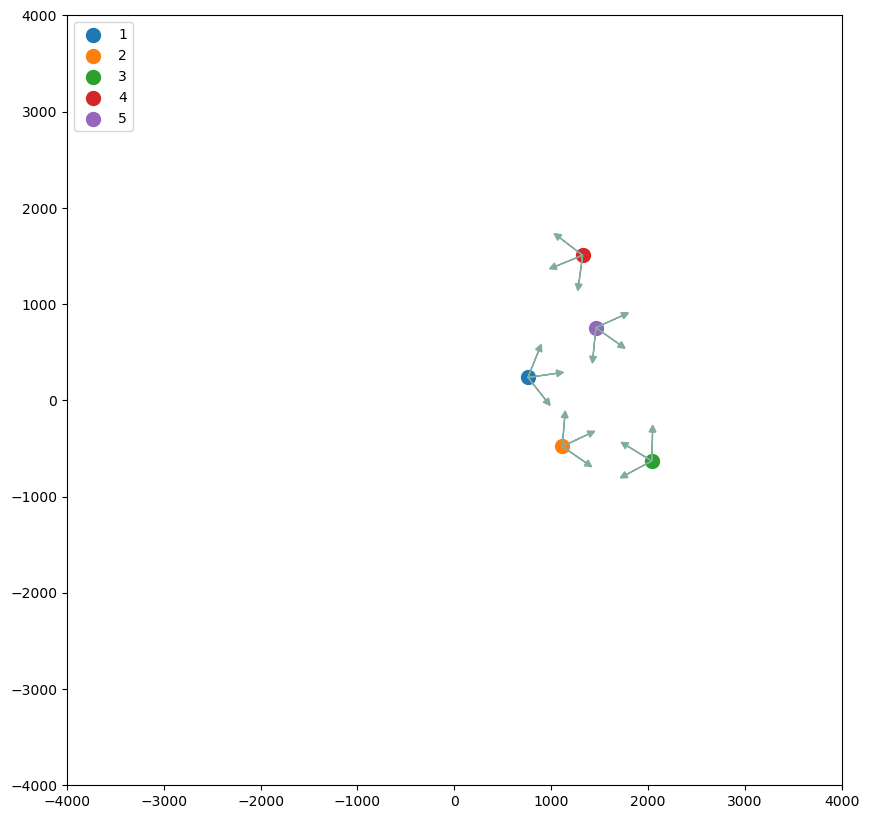

47175


In [904]:
fov_angle = math.radians(60)
start = 47080
end = 47180
length = 300

for index, row in data_df.iloc[start:end:5].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))

    for i in range(1, 6):
        label = str(i)
        x = row[f"{label}TX"]
        y = row[f"{label}TY"]
        yaw = row[f"{label}RZ"]

        plt.scatter(x, y, s=100, label=label)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )

    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()
    print(index)


### Transformations

In [16]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

#for group
# grp = data_df.groupby(by=["GROUP"])

# for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]

for i in range(1,6):
    x = '%sTX'%i
    y = '%sTY'%i
    z = '%sTZ'%i
    p = '%sRX'%i
    r = '%sRY'%i
    yaw = '%sRZ'%i

    for j in range(1,6):
        x1 = '%sTX'%j
        y1 = '%sTY'%j
        z1 = '%sTZ'%j
        p1 = '%sRX'%j
        r1 = '%sRY'%j
        yaw1 = '%sRZ'%j
        if i == j:
            continue
        print(x, x1)
        data_df["%s%sx"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
        data_df["%s%sy"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
        data_df["%s%sz"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
        print("%s%sz"%(i,j))



1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


In [17]:
data_df.columns

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP', '12x', '12y', '12z', '13x', '13y', '13z',
       '14x', '14y', '14z', '15x', '15y', '15z', '21x', '21y', '21z', '23x',
       '23y', '23z', '24x', '24y', '24z', '25x', '25y', '25z', '31x', '31y',
       '31z', '32x', '32y', '32z', '34x', '34y', '34z', '35x', '35y', '35z',
       '41x', '41y', '41z', '42x', '42y', '42z', '43x', '43y', '43z', '45x',
       '45y', '45z', '51x', '51y', '51z', '52x', '52y', '52z', '53x', '53y',
       '53z', '54x', '54y', '54z'],
      dtype='object')

In [18]:
data_df = data_df.fillna(0)
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0          1          0  0.000000  0.000000   0.000000     0.000000   
1          2          0  0.000000  0.000000   0.000000     0.000000   
2          3          0  0.000000  0.000000   0.000000     0.000000   
3          4          0  2.425969  0.099261 -89.028012  -723.095154   
4          5          0  2.426525  0.098838 -89.028694  -723.002930   
...      ...        ...       ...       ...        ...          ...   
80113  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
80114  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
80115  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
80116  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
80117  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

               1TY          1TZ       2RX       2RY  ...         51z  \
0         0.000000     0.000000  0.000000  0.000000  ...    0.000000   
1         0.000000     0.000000  0.000000  0.000000  ...    0.000000   
2         0.000000     0.000000  0.000000  0.000000  ...    0.000000   
3      -749.753662  1761.347290  0.000000  0.000000  ...  991.907341   
4      -749.562805  1761.383179  0.000000  0.000000  ...  993.091057   
...            ...          ...       ...       ...  ...         ...   
80113 -1438.786865  1068.234619  0.409880 -3.846665  ...  331.772945   
80114 -1438.802124  1068.252686  0.406747 -3.846874  ...  331.552617   
80115 -1438.787964  1068.242188  0.405425 -3.845295  ...  331.478191   
80116 -1438.788452  1068.236450  0.407506 -3.846482  ...  331.797196   
80117 -1438.820312  1068.266724  0.409008 -3.846727  ...  331.643120   

              52x          52y         52z         53x         53y  \
0        0.000000     0.000000    0.000000  199.146849  419.075558   
1        0.000000     0.000000    0.000000  199.530143  417.722201   
2        0.000000     0.000000    0.000000  199.469988  417.391890   
3        0.000000     0.000000    0.000000  199.550157  417.601318   
4        0.000000     0.000000    0.000000  199.361911  417.470219   
...           ...          ...         ...         ...         ...   
80113 -765.475974  1331.676824  297.657787 -919.165300  930.604704   
80114 -765.483200  1331.721711  297.468682 -919.183870  930.653050   
80115 -765.543642  1331.713383  297.422734 -919.227429  930.631971   
80116 -765.419549  1331.707220  297.721352 -919.151199  930.609163   
80117 -765.509089  1331.703685  297.553172 -919.216610  930.615030   

               53z         54x          54y         54z  
0     -1167.926565  -60.624571    16.834857   16.664426  
1     -1167.424531  -60.643620    16.838429   16.672758  
2     -1166.649947  -60.660082    16.702072   16.748552  
3     -1165.593936  -60.657996    16.568370   16.865846  
4     -1164.922716  -60.751980    16.763369   16.728431  
...            ...         ...          ...         ...  
80113   304.549544 -640.767389  1125.888503  268.299400  
80114   304.346930 -640.771261  1125.920168  268.132394  
80115   304.299300 -640.814982  1125.903860  268.091294  
80116   304.553391 -640.721309  1125.899012  268.348713  
80117   304.420961 -640.806334  1125.875263  268.193033  

[384295 rows x 93 columns]

In [21]:
df_dist = df_dist.fillna(0)
df_dist

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.529754      0.250855      0.470718      0.000000   
4          0.000000      0.529720      0.250873      0.470729      0.000000   
...             ...           ...           ...           ...           ...   
80113      0.050720      0.064382      0.069926      0.449102      0.050720   
80114      0.050716      0.064384      0.069925      0.449104      0.050716   
80115      0.050717      0.064382      0.069926      0.449103      0.050717   
80116      0.050721      0.064383      0.069926      0.449101      0.050721   
80117      0.050716      0.064384      0.069924      0.449106      0.050716   

       distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.000000      0.000000      0.529754      0.000000   
4          0.000000      0.000000      0.000000      0.529720      0.000000   
...             ...           ...           ...           ...           ...   
80113      0.068123      0.035554      0.225305      0.064382      0.068123   
80114      0.068123      0.035555      0.225306      0.064384      0.068123   
80115      0.068124      0.035557      0.225308      0.064382      0.068124   
80116      0.068129      0.035556      0.225307      0.064383      0.068129   
80117      0.068126      0.035558      0.225308      0.064384      0.068126   

       ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0      ...      0.000000      0.209044      0.008809      0.000000   
1      ...      0.000000      0.208911      0.008812      0.000000   
2      ...      0.000000      0.208793      0.008814      0.000000   
3      ...      0.000000      0.208670      0.008817      0.470718   
4      ...      0.000000      0.208525      0.008826      0.470729   
...    ...           ...           ...           ...           ...   
80113  ...      0.035554      0.055650      0.198219      0.449102   
80114  ...      0.035555      0.055649      0.198218      0.449104   
80115  ...      0.035557      0.055650      0.198218      0.449103   
80116  ...      0.035556      0.055654      0.198218      0.449101   
80117  ...      0.035558      0.055649      0.198217      0.449106   

       distance_5_2  distance_5_3  distance_5_4  Frame   GROUP  Frame2  
0          0.000000      0.227703      0.008809      0  study1       1  
1          0.000000      0.227546      0.008812      1  study1       2  
2          0.000000      0.227394      0.008814      2  study1       3  
3          0.000000      0.227230      0.008817      3  study1       4  
4          0.000000      0.227103      0.008826      4  study1       5  
...             ...           ...           ...    ...     ...     ...  
80113      0.225305      0.241155      0.198219  80113  study6   80114  
80114      0.225306      0.241156      0.198218  80114  study6   80115  
80115      0.225308      0.241156      0.198218  80115  study6   80116  
80116      0.225307      0.241154      0.198218  80116  study6   80117  
80117      0.225308      0.241158      0.198217  80117  study6   80118  

[384295 rows x 23 columns]

### Angle/FOV

In [22]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):    
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[df['%sx'%id] < 0] = 0
    
    return series


# grp = data_df.groupby(by=["GROUP"])

# # for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]
#     df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
fov_df["Frame"] = data_df['Frame']

    
for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))


for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])

        soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
        soc_eng['GROUP'] = data_df['GROUP']
        # soc_eng['GROUP'] = "4"


soc_eng = soc_eng.fillna(0)
soc_eng

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
0          1                    0.0  study1                    0.0   
1          2                    0.0  study1                    0.0   
2          3                    0.0  study1                    0.0   
3          4                    0.0  study1                    0.0   
4          5                    0.0  study1                    0.0   
...      ...                    ...     ...                    ...   
80113  80114                    1.0  study6                    0.0   
80114  80115                    1.0  study6                    0.0   
80115  80116                    1.0  study6                    0.0   
80116  80117                    1.0  study6                    0.0   
80117  80118                    1.0  study6                    0.0   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
80113                    1.0                    0.0                    0.0   
80114                    1.0                    0.0                    0.0   
80115                    1.0                    0.0                    0.0   
80116                    1.0                    0.0                    0.0   
80117                    1.0                    0.0                    0.0   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
80113                    0.0                    0.0                    0.0   
80114                    0.0                    0.0                    0.0   
80115                    0.0                    0.0                    0.0   
80116                    0.0                    0.0                    0.0   
80117                    0.0                    0.0                    0.0   

       ...  social_engagement_3_4  social_engagement_3_5  \
0      ...                    1.0                    1.0   
1      ...                    1.0                    1.0   
2      ...                    1.0                    1.0   
3      ...                    1.0                    1.0   
4      ...                    1.0                    1.0   
...    ...                    ...                    ...   
80113  ...                    0.0                    0.0   
80114  ...                    0.0                    0.0   
80115  ...                    0.0                    0.0   
80116  ...                    0.0                    0.0   
80117  ...                    0.0                    0.0   

       social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
0                   0.000000                    0.0                    1.0   
1                   0.000000                    0.0                    1.0   
2                   0.000000                    0.0                    1.0   
3                   0.000000                    0.0                    1.0   
4                   0.000000                    0.0                    1.0   
...                      ...                    ...                    ...   
80113               0.972

In [23]:
soc_eng.describe()

Frame  social_engagement_1_2  social_engagement_1_3  \
count  384295.000000          384295.000000          384295.000000   
mean    33389.692973               0.401210               0.425197   
std     20627.230567               0.471542               0.474427   
min         1.000000               0.000000               0.000000   
25%     16013.000000               0.000000               0.000000   
50%     32025.000000               0.000000               0.000774   
75%     48348.000000               1.000000               1.000000   
max     80118.000000               1.000000               1.000000   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.359776               0.309819               0.322464   
std                 0.460699               0.430800               0.450864   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               0.879272               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
count          384295.000000          384295.000000          384295.000000   
mean                0.285817               0.281296               0.351521   
std                 0.435607               0.433602               0.460612   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.984737               0.898928               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_3_1  ...  social_engagement_3_4  \
count          384295.000000  ...          384295.000000   
mean                0.386930  ...               0.423378   
std                 0.470562  ...               0.474007   
min                 0.000000  ...               0.000000   
25%                 0.000000  ...               0.000000   
50%                 0.000000  ...               0.004895   
75%                 1.000000  ...               1.000000   
max                 1.000000  ...               1.000000   

       social_engagement_3_5  social_engagement_4_1  social_engagement_4_2  \
count          384295.000000          384295.000000          384295.000000   
mean                0.406491               0.368876               0.458739   
std                 0.463157               0.462506               0.477937   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.151535   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_4_3  social_engagement_4_5  social_engagement_5_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.413946               0.328056               0.356137   
std                 0.473430               0.455417               0.451320   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_5_2  s

In [29]:
soc_eng[(soc_eng['social_engagement_1_2']!=0) &(soc_eng['GROUP'] == 'study6')]

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
561      562               0.000342  study6                    0.0   
562      563               0.001384  study6                    0.0   
563      564               0.002943  study6                    0.0   
564      565               0.005584  study6                    0.0   
565      566               0.007689  study6                    0.0   
...      ...                    ...     ...                    ...   
80113  80114               1.000000  study6                    0.0   
80114  80115               1.000000  study6                    0.0   
80115  80116               1.000000  study6                    0.0   
80116  80117               1.000000  study6                    0.0   
80117  80118               1.000000  study6                    0.0   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
561                      0.0                    0.0                    0.0   
562                      0.0                    0.0                    0.0   
563                      0.0                    0.0                    0.0   
564                      0.0                    0.0                    0.0   
565                      0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
80113                    1.0                    0.0                    0.0   
80114                    1.0                    0.0                    0.0   
80115                    1.0                    0.0                    0.0   
80116                    1.0                    0.0                    0.0   
80117                    1.0                    0.0                    0.0   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
561                      0.0                    1.0               0.058573   
562                      0.0                    1.0               0.052309   
563                      0.0                    1.0               0.060218   
564                      0.0                    1.0               0.061236   
565                      0.0                    1.0               0.061953   
...                      ...                    ...                    ...   
80113                    0.0                    0.0               0.000000   
80114                    0.0                    0.0               0.000000   
80115                    0.0                    0.0               0.000000   
80116                    0.0                    0.0               0.000000   
80117                    0.0                    0.0               0.000000   

       ...  social_engagement_3_4  social_engagement_3_5  \
561    ...                    1.0                    1.0   
562    ...                    1.0                    1.0   
563    ...                    1.0                    1.0   
564    ...                    1.0                    1.0   
565    ...                    1.0                    1.0   
...    ...                    ...                    ...   
80113  ...                    0.0                    0.0   
80114  ...                    0.0                    0.0   
80115  ...                    0.0                    0.0   
80116  ...                    0.0                    0.0   
80117  ...                    0.0                    0.0   

       social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
561                 1.000000               0.016452                    1.0   
562                 1.000000               0.016567                    1.0   
563                 1.000000               0.016093                    1.0   
564                 1.000000               0.015672                    1.0   
565                 1.000000               0.014971                    1.0   
...                      ...                    ...                    ...   
80113               0.972

In [30]:
soc_eng.iloc[10300:12000]

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
10300  10301               1.000000  study1               0.595260   
10301  10302               1.000000  study1               0.601566   
10302  10303               1.000000  study1               0.605794   
10303  10304               1.000000  study1               0.611998   
10304  10305               1.000000  study1               0.621062   
...      ...                    ...     ...                    ...   
11995  11996               0.925249  study1               0.000000   
11996  11997               0.975629  study1               0.000000   
11997  11998               1.000000  study1               0.000000   
11998  11999               1.000000  study1               0.000000   
11999  12000               1.000000  study1               0.000000   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
10300               0.000000                    0.0                    0.0   
10301               0.000000                    0.0                    0.0   
10302               0.000000                    0.0                    0.0   
10303               0.000000                    0.0                    0.0   
10304               0.000000                    0.0                    0.0   
...                      ...                    ...                    ...   
11995               0.810672                    0.0                    0.0   
11996               0.919966                    0.0                    0.0   
11997               1.000000                    0.0                    0.0   
11998               1.000000                    0.0                    0.0   
11999               1.000000                    0.0                    0.0   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
10300                    0.0                    0.0                    0.0   
10301                    0.0                    0.0                    0.0   
10302                    0.0                    0.0                    0.0   
10303                    0.0                    0.0                    0.0   
10304                    0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
11995                    0.0                    0.0                    0.0   
11996                    0.0                    0.0                    0.0   
11997                    0.0                    0.0                    0.0   
11998                    0.0                    0.0                    0.0   
11999                    0.0                    0.0                    0.0   

       ...  social_engagement_3_4  social_engagement_3_5  \
10300  ...                    0.0                    0.0   
10301  ...                    0.0                    0.0   
10302  ...                    0.0                    0.0   
10303  ...                    0.0                    0.0   
10304  ...                    0.0                    0.0   
...    ...                    ...                    ...   
11995  ...                    0.0                    0.0   
11996  ...                    0.0                    0.0   
11997  ...                    0.0                    0.0   
11998  ...                    0.0                    0.0   
11999  ...                    0.0                    0.0   

       social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
10300                    0.0                    1.0               0.709198   
10301                    0.0                    1.0               0.711689   
10302                    0.0                    1.0               0.713275   
10303                    0.0                    1.0               0.711731   
10304                    0.0                    1.0               0.701173   
...                      ...                    ...                    ...   
11995                    

### Social Engagement Metric 

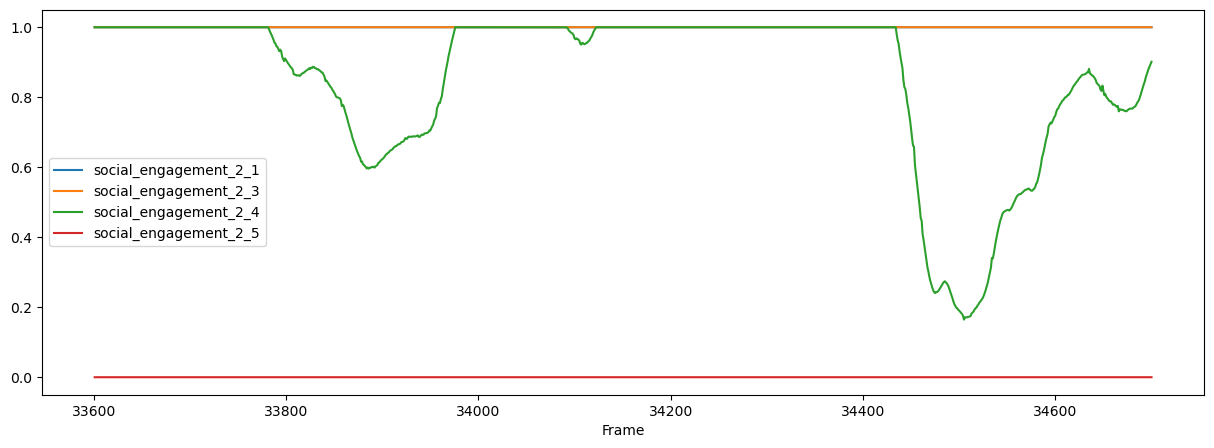

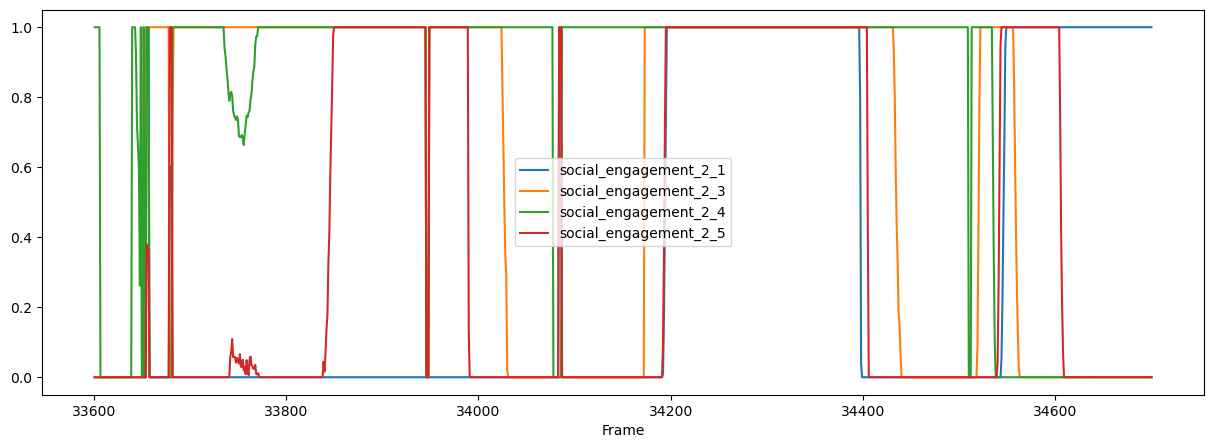

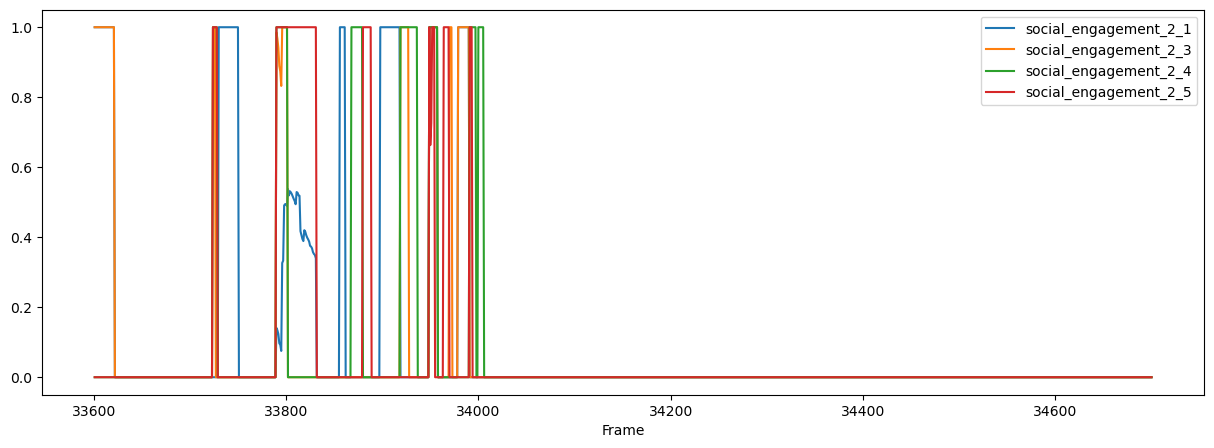

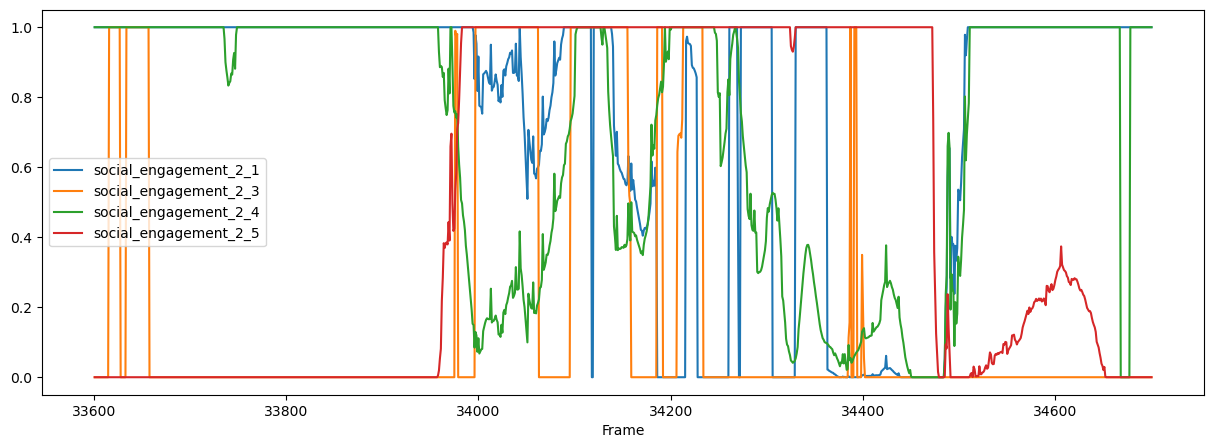

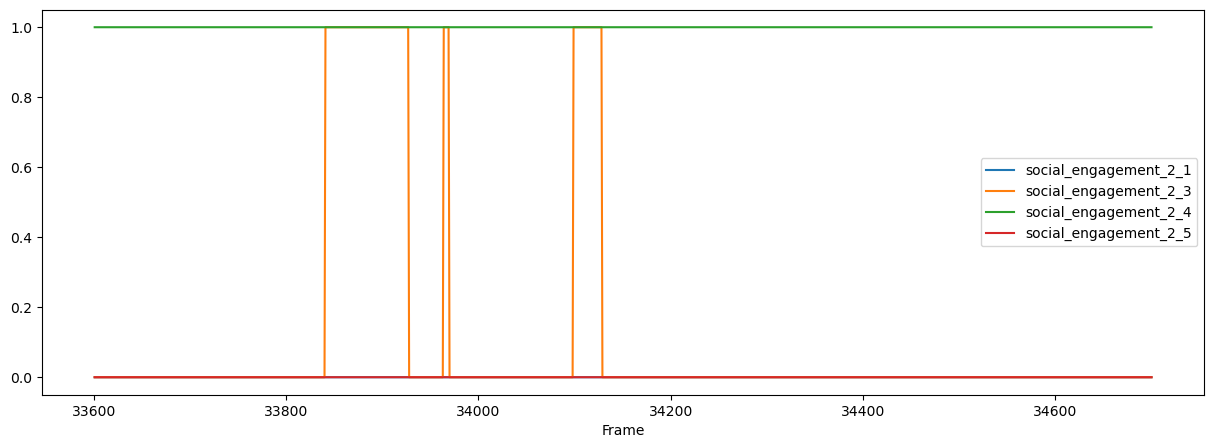

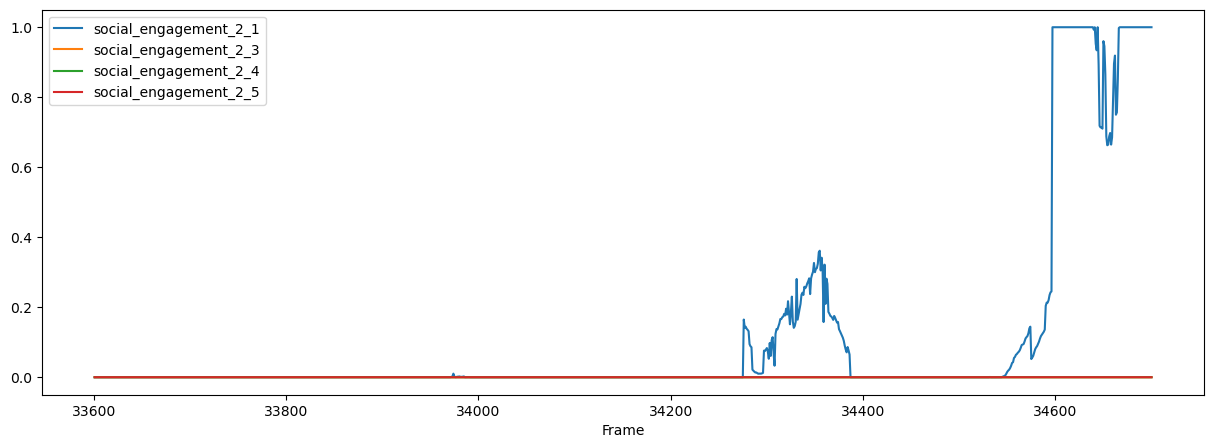

In [31]:
grouped = soc_eng.groupby('GROUP')

for name, group in grouped:
#     group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
    group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


# soc_eng.iloc[1000:10000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))    

In [32]:
eng_df = pd.DataFrame()  

eng_df['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].max(axis=1)
eng_df['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].max(axis=1, numeric_only=True)
eng_df['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].max(axis=1)
eng_df['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].max(axis=1)
eng_df['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].max(axis=1)
eng_df['GROUP'] = soc_eng["GROUP"]
eng_df = eng_df.reset_index() 
# eng_df = eng_df.drop('index', axis=1)

eng_df = eng_df.fillna(0)
eng_df
# print(soc_eng.describe())
# print(eng_df.describe())

index  soc_average_1  soc_average_2  soc_average_3  soc_average_4  \
0           0            0.0            0.0            1.0            1.0   
1           1            0.0            0.0            1.0            1.0   
2           2            0.0            0.0            1.0            1.0   
3           3            0.0            0.0            1.0            1.0   
4           4            0.0            0.0            1.0            1.0   
...       ...            ...            ...            ...            ...   
384290  80113            1.0            0.0            0.0            1.0   
384291  80114            1.0            0.0            0.0            1.0   
384292  80115            1.0            0.0            0.0            1.0   
384293  80116            1.0            0.0            0.0            1.0   
384294  80117            1.0            0.0            0.0            1.0   

        soc_average_5   GROUP  
0                 0.0  study1  
1                 0.0  study1  
2                 0.0  study1  
3                 0.0  study1  
4                 0.0  study1  
...               ...     ...  
384290            0.0  study6  
384291            0.0  study6  
384292            0.0  study6  
384293            0.0  study6  
384294            0.0  study6  

[384295 rows x 7 columns]

In [23]:
###smoothing, rolling window average
# eng_df = eng_df.rolling(window=30).mean() 

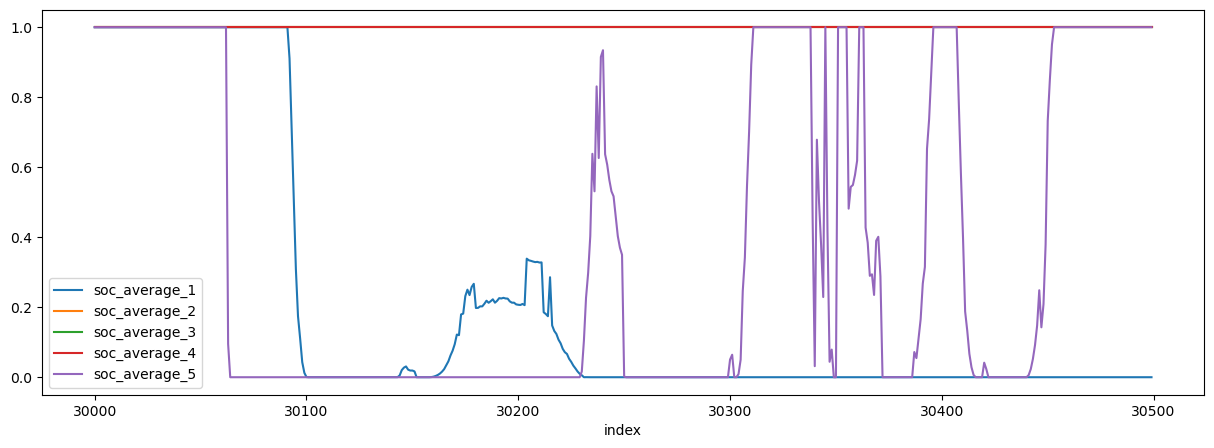

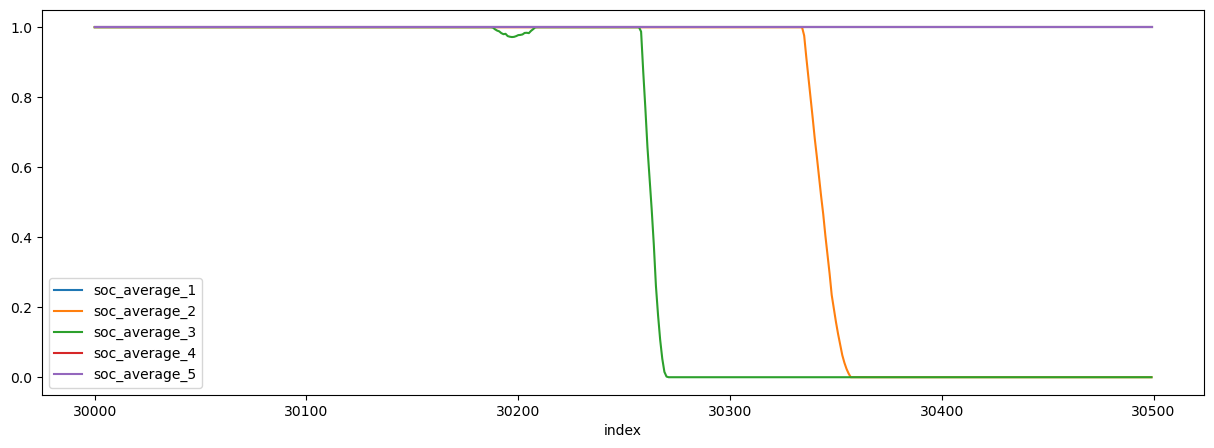

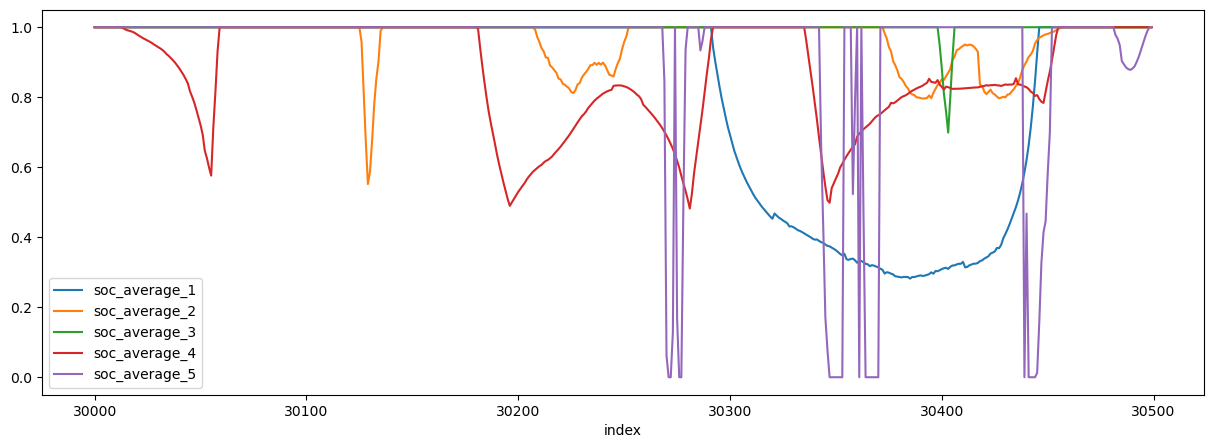

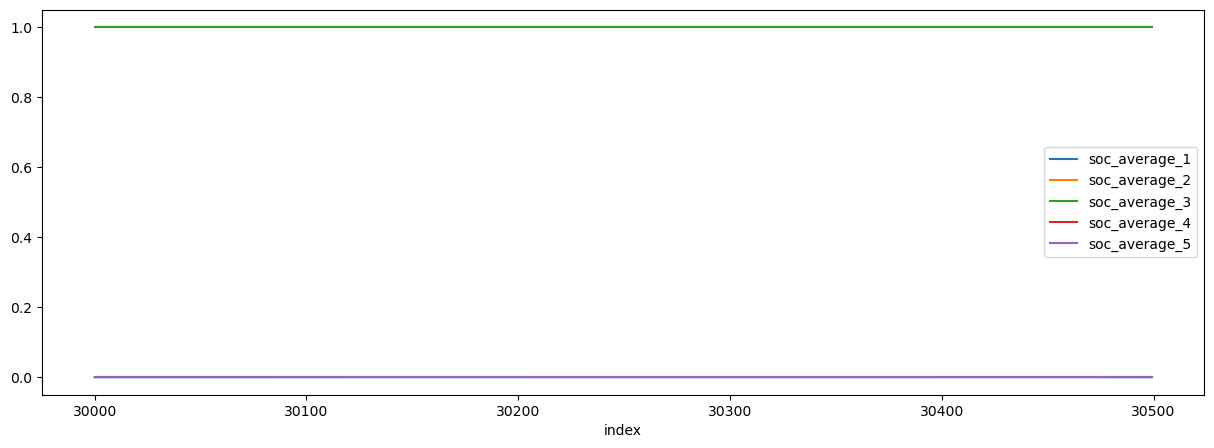

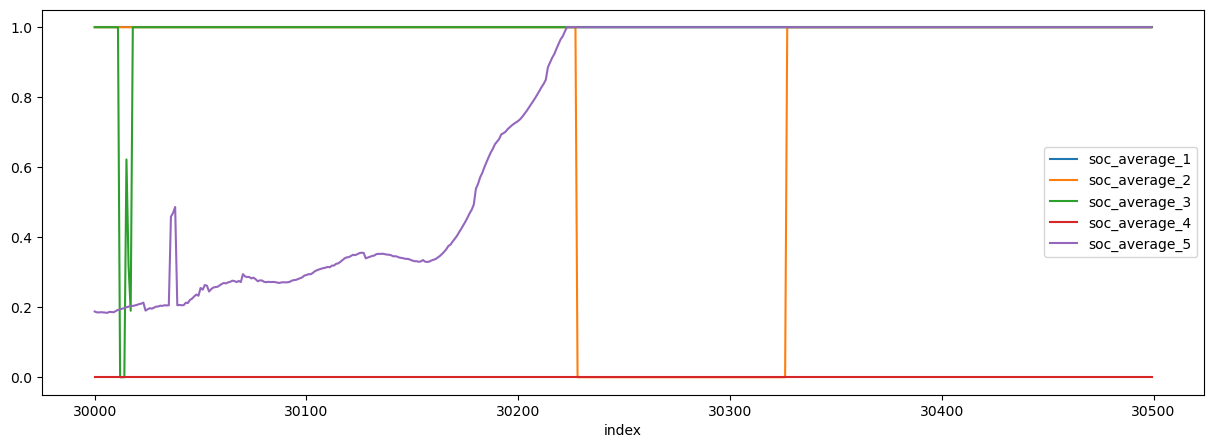

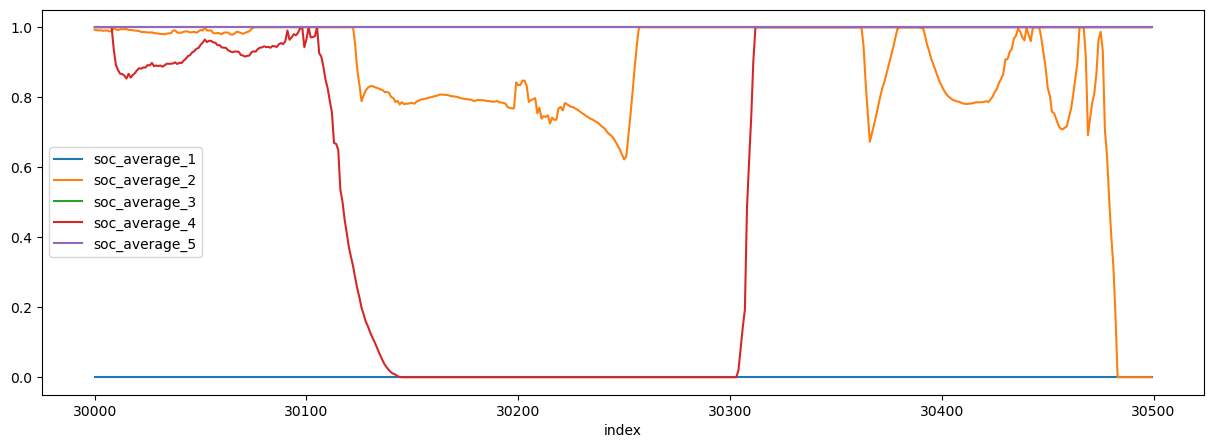

In [33]:
grouped = eng_df.groupby('GROUP')

for name, group in grouped:
    group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))
    
    
# eng_df.iloc[40000:40200][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

# eng_df.iloc[31550:33000][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

## Create Video

In [ ]:
#! python3

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import math
import numpy as np
import matplotlib.animation as animation

VICON_FPS = 100
VIDEO_FPS = 20

start = 601 * VIDEO_FPS
end =  800 * VIDEO_FPS  # 10sec video

#####################################################

csv_files = Path(".").glob("study6H.csv")
data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# convert df index to time periods
data_df.set_index(
    pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
)

# resample df to target FPS
data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


data_df['1RZ'] = data_df['1RZ'] - 90
# data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90



fov_angle = math.radians(60)

length = 500

fig, ax = plt.subplots(figsize=(10, 10))


def init():
    plt.legend(loc="upper left")

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)


def update(frame):

    print("Done %s%%" % (100 * (frame - start) / (end - start)))

    row = data_df.iloc[frame]

    x = row["1TX"]
    y = row["1TY"]
    yaw = row["1RZ"]

    fig.clear()

    plt.xlim(-5000, 5000)
    plt.ylim(-5000, 5000)

    plt.scatter(x, y, s=100, label="1")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["2TX"]
    y = row["2TY"]
    yaw = row["2RZ"]
    plt.scatter(x, y, s=100, label="2")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["3TX"]
    y = row["3TY"]
    yaw = row["3RZ"]
    plt.scatter(x, y, s=100, label="3")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["4TX"]
    y = row["4TY"]
    yaw = row["4RZ"]
    plt.scatter(x, y, s=100, label="4")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw - fov_angle),
        length * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        length * np.cos(yaw + fov_angle),
        length * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    x = row["5TX"]
    y = row["5TY"]
    yaw = row["5RZ"]
    plt.scatter(x, y, s=100, label="5")
    plt.arrow(
        x,
        y,
        length * np.cos(yaw),
        length * np.sin(yaw),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw - fov_angle),
        600 * np.sin(yaw - fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )
    plt.arrow(
        x,
        y,
        600 * np.cos(yaw + fov_angle),
        600 * np.sin(yaw + fov_angle),
        head_width=100,
        head_length=100,
        color="#82ad9d",
        lw=1,
    )

    plt.legend(loc="upper left")
    plt.title(frame)
    
ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
writergif = animation.PillowWriter(fps=20)
ani.save('study6_4.gif',writer=writergif)


# ani.save("test.mp4", fps=VIDEO_FPS)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Done 0.0%
Done 0.02512562814070352%
Done 0.05025125628140704%
Done 0.07537688442211055%
Done 0.10050251256281408%
Done 0.12562814070351758%
Done 0.1507537688442211%
Done 0.17587939698492464%
Done 0.20100502512562815%
Done 0.22613065326633167%
Done 0.25125628140703515%
Done 0.27638190954773867%
Done 0.3015075376884422%
Done 0.32663316582914576%
Done 0.35175879396984927%
Done 0.3768844221105528%
Done 0.4020100502512563%
Done 0.4271356783919598%
Done 0.45226130653266333%
Done 0.47738693467336685%
Done 0.5025125628140703%
Done 0.5276381909547738%
Done 0.5527638190954773%
Done 0.5778894472361809%
Done 0.6030150753768844%
Done 0.628140703517588%
Done 0.6532663316582915%
Done 0.678391959798995%
Done 0.7035175879396985%
Done 0.7286432160804021%
Done 0.7537688442211056%
Done 0.7788944723618091%
Done 0.8040201005025126%
Done 0.8291457286432161%
Done 0.8542713567839196%
Done 0.8793969849246231%
Done 0.9045226130653267%
Done 0.9296482412060302%
Done 0.9547738693467337%
Done 0.9798994974874372%
Don

## Using human verified interaction starting points

In [323]:
from pathlib import Path


def load_and_process_group_file(file_path, group_name):
    ann = os.path.basename(file_path)[-5]
    print(file_path)
    elan_df = pd.read_csv(file_path, sep='\t').fillna(0)
    data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
    for item in data:
        item.insert(0, group_name)
        item.insert(-1, ann)
    return data

# List of group files and their respective group names
group_files = [
    ("newannotations/group1H.txt", "1"),
    ("newannotations/group1P.txt", "1"),
    ("newannotations/group2D.txt", "2"),
    ("newannotations/group2H.txt", "2"),
    ("newannotations/group3E.txt", "3"),
    ("newannotations/group3W.txt", "3"),
    ("newannotations/group4E.txt", "4"),
    ("newannotations/group4W.txt", "4"),
    ("newannotations/group5D.txt", "5"),
    ("newannotations/group5S.txt", "5"),
    ("newannotations/group6P.txt", "6"),
    ("newannotations/group6S.txt", "6")
]

# Load and process each group file
data_list = [load_and_process_group_file(file_path, group_name) for file_path, group_name in group_files]


# Merge all data from different groups
merged_data = list(merge(*data_list))


# Create the final DataFrame
columns = ['GROUP', 'Participant', 'Frame', 'Annotator', 'Interacted']
group_df = pd.DataFrame(merged_data, columns=columns)
group_df = group_df.sort_values('Participant')
group_df = group_df.reset_index()
group_df = group_df.drop('index', axis=1)

group_df[group_df['GROUP']=='5']

newannotations/group1H.txt
newannotations/group1P.txt
newannotations/group2D.txt
newannotations/group2H.txt
newannotations/group3E.txt
newannotations/group3W.txt
newannotations/group4E.txt
newannotations/group4W.txt
newannotations/group5D.txt
newannotations/group5S.txt
newannotations/group6P.txt
newannotations/group6S.txt


GROUP Participant Frame Annotator Interacted
49      5           1  8007         S    2 3 4 5
50      5           1  7982         D    2 3 4 5
51      5           1  6430         S    2 3 4 5
52      5           1  6387         D    2 3 4 5
61      5           1  1989         D    2 3 4 5
..    ...         ...   ...       ...        ...
437     5           5  4122         D    1 2 3 4
438     5           5  4542         S        2 3
439     5           5  6356         S    1 2 3 4
440     5           5  6363         D    1 2 3 4
441     5           5   445         D    1 2 3 4

[62 rows x 5 columns]

In [324]:
# Convert 'Interacted' column to lists of integers
# group_df['Interactedd'] = group_df['Interacted'].str.split()


# Function to check for overlap within a 100 frame leeway
def check_overlap(frames1, frames2):
    frames1 = int(frames1)
    frames2 = int(frames2)

#     frames1 =  list(map(int, frames1))
#     frames2 =  list(map(int, frames2))
#     for frame1 in frames1:
#         for frame2 in frames2:
    if abs(frames1 - frames2) <= 100:
        return True
    return False

# Iterate over each pair of rows and check for overlap
overlapping_pairs = []
for i in range(len(group_df)):
    for j in range(i + 1, len(group_df)):
        if group_df.loc[i, 'GROUP'] == group_df.loc[j, 'GROUP'] and \
           group_df.loc[i, 'Participant'] == group_df.loc[j, 'Participant'] and \
            group_df.loc[i, 'Annotator'] != group_df.loc[j, 'Annotator'] and \
               check_overlap(group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']):
            overlapping_pairs.append((group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']))

# Print overlapping pairs
# print("Overlapping pairs:")
# for pair in overlapping_pairs:
#     print(pair)

# print(overlapping_pairs)
    
overlapping_pairs = [element for innerList in overlapping_pairs for element in innerList]

group_df = group_df[group_df['Frame'].isin(overlapping_pairs)]
group_df = group_df.reset_index() 
group_df


index GROUP Participant  Frame Annotator Interacted
0        2     4           1   2664         W        3 5
1        3     4           1   1928         W        3 5
2        5     3           1   9115         W    2 3 4 5
3        6     3           1   9076         E    2 3 4 5
4        7     3           1   8669         W          4
..     ...   ...         ...    ...       ...        ...
247    456     4           5   6617         W    1 2 3 4
248    457     4           5   9118         W    1 2 3 4
249    458     4           5   9846         W    1 2 3 4
250    459     4           5   2632         W        1 3
251    460     6           5  10403         P        2 3

[252 rows x 6 columns]

In [325]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df
group_df[group_df['GROUP']=='5']

index GROUP Participant  Frame Annotator Interacted
28      49     5           1  40035         S    2 3 4 5
29      50     5           1  39910         D    2 3 4 5
30      51     5           1  32150         S    2 3 4 5
31      52     5           1  31935         D    2 3 4 5
38      63     5           1  20505         S    2 3 4 5
39      64     5           1  20540         D    2 3 4 5
40      65     5           1  22570         S          4
79     140     5           2  12060         D    1 3 4 5
80     142     5           2  15750         D    1 3 4 5
81     143     5           2  20505         D    1 3 4 5
82     148     5           2  11885         S    1 3 4 5
83     149     5           2  39860         S    1 3 4 5
86     158     5           2  39915         D    1 3 4 5
87     160     5           2  15700         S    1 3 4 5
110    198     5           3  20590         S    1 2 4 5
111    203     5           3  20425         D    1 2 4 5
112    204     5           3  31464         D    1 2 4 5
113    205     5           3  39775         S    1 2 4 5
114    206     5           3  39785         D    1 2 4 5
115    207     5           3  31945         S    1 2 4 5
151    276     5           4  39800         D    1 2 3 5
152    277     5           4  40035         S    1 2 3 5
160    295     5           4  26900         D      2 3 5
161    301     5           4  22680         D          1
162    303     5           4   9960         D    1 2 3 5
163    305     5           4  26900         S      2 3 5
164    306     5           4  22570         S          1
165    308     5           4   9930         S    1 2 3 5
211    390     5           5  40045         D    1 2 3 4
229    424     5           5  40450         S    1 2 3 4
235    432     5           5   9795         S    1 2 3 4
236    435     5           5   9895         D    1 2 3 4
237    439     5           5  31780         S    1 2 3 4
238    440     5           5  31814         D    1 2 3 4

In [326]:
for index, row in group_df.iterrows():
    range_frame = []
    frame = row['Frame']
    upp = (frame + 50)
    down = (frame - 50)
    for i in range(down, upp):
        range_frame.append(i)
    
# print(range_frame)
    val = group_df.isin({'Frame':(range_frame)})
print(val)



# for col in group_df:
# for frame in group_df['Frame']:
#     print(frame)


     index  GROUP  Participant  Frame  Annotator  Interacted
0    False  False        False  False      False       False
1    False  False        False  False      False       False
2    False  False        False  False      False       False
3    False  False        False  False      False       False
4    False  False        False  False      False       False
..     ...    ...          ...    ...        ...         ...
247  False  False        False  False      False       False
248  False  False        False  False      False       False
249  False  False        False  False      False       False
250  False  False        False  False      False       False
251  False  False        False   True      False       False

[252 rows x 6 columns]


In [327]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist = df_dist.fillna(0)
df_dist


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.529754      0.250855      0.470718      0.000000   
4          0.000000      0.529720      0.250873      0.470729      0.000000   
...             ...           ...           ...           ...           ...   
80113      0.050720      0.064382      0.069926      0.449102      0.050720   
80114      0.050716      0.064384      0.069925      0.449104      0.050716   
80115      0.050717      0.064382      0.069926      0.449103      0.050717   
80116      0.050721      0.064383      0.069926      0.449101      0.050721   
80117      0.050716      0.064384      0.069924      0.449106      0.050716   

       distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.000000      0.000000      0.529754      0.000000   
4          0.000000      0.000000      0.000000      0.529720      0.000000   
...             ...           ...           ...           ...           ...   
80113      0.068123      0.035554      0.225305      0.064382      0.068123   
80114      0.068123      0.035555      0.225306      0.064384      0.068123   
80115      0.068124      0.035557      0.225308      0.064382      0.068124   
80116      0.068129      0.035556      0.225307      0.064383      0.068129   
80117      0.068126      0.035558      0.225308      0.064384      0.068126   

       ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0      ...      0.000000      0.209044      0.008809      0.000000   
1      ...      0.000000      0.208911      0.008812      0.000000   
2      ...      0.000000      0.208793      0.008814      0.000000   
3      ...      0.000000      0.208670      0.008817      0.470718   
4      ...      0.000000      0.208525      0.008826      0.470729   
...    ...           ...           ...           ...           ...   
80113  ...      0.035554      0.055650      0.198219      0.449102   
80114  ...      0.035555      0.055649      0.198218      0.449104   
80115  ...      0.035557      0.055650      0.198218      0.449103   
80116  ...      0.035556      0.055654      0.198218      0.449101   
80117  ...      0.035558      0.055649      0.198217      0.449106   

       distance_5_2  distance_5_3  distance_5_4  Frame   GROUP  Frame2  
0          0.000000      0.227703      0.008809      0  study1       1  
1          0.000000      0.227546      0.008812      1  study1       2  
2          0.000000      0.227394      0.008814      2  study1       3  
3          0.000000      0.227230      0.008817      3  study1       4  
4          0.000000      0.227103      0.008826      4  study1       5  
...             ...           ...           ...    ...     ...     ...  
80113      0.225305      0.241155      0.198219  80113  study6   80114  
80114      0.225306      0.241156      0.198218  80114  study6   80115  
80115      0.225308      0.241156      0.198218  80115  study6   80116  
80116      0.225307      0.241154      0.198218  80116  study6   80117  
80117      0.225308      0.241158      0.198217  80117  study6   80118  

[384295 rows x 23 columns]

### Interaction Profiles

In [445]:
def calculate_social_engagement(df_dist, eng_df, window_size, int_df, temp_df, opp_df):
    grp = eng_df.groupby(by=["GROUP"])

    for group, data in grp:
        print(group)
        df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
        group_dff = group_df.loc[group_df['GROUP'] == group[-1]]
        group_frames = group_dff['Frame']
        df_filtered = df_dist_g[df_dist_g['Frame2'].isin(group_frames)]
        
        soc_engg = soc_eng.loc[soc_eng['GROUP'] == group]


        for index, row in df_filtered.iterrows():
            last_index = -window_size
            count = 0   
            selector = index

            g_row = group_dff[group_dff['Frame'] == row['Frame2']]
            g_par = g_row['Participant'].values[0]
            g_int = g_row['Interacted'].values[0].rstrip()

            if len(g_int) < 2:
                if selector and index >= (last_index + window_size):
                    last_index = index
                    count += 1

                    for window_offset in range(-window_size, window_size):
                        frame_idx = row["Frame2"] + window_offset
                        frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                        if g_par != g_int:
                            nem = f'social_engagement_{g_par}_{g_int}'
                            int_pps = frames[f'social_engagement_{g_par}_{g_int}'].values[0]
                            
                            opp_nem = f'social_engagement_{g_int}_{g_par}'
                            opp_pps = frames[f'social_engagement_{g_int}_{g_par}'].values[0]

                            for _, roww in frames.iterrows():
                                ro = pd.Series([g_par, window_offset, int_pps, nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                temp_df = pd.concat([temp_df, ro.to_frame().T])

                                opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                opp_df = pd.concat([opp_df, opp_ro.to_frame().T])

            else:
                res = g_int.split() 
                for par in res:
                    if selector and index >= (last_index + window_size):
                        last_index = index
                        count += 1

                        for window_offset in range(-window_size, window_size):
                            frame_idx = row["Frame2"] + window_offset
                            frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                            if g_par != par:
                                nem = f'social_engagement_{g_par}_{par}'
                                int_pps = frames[f'social_engagement_{g_par}_{par}'].values[0]

                                opp_nem = f'social_engagement_{par}_{g_par}'
                                opp_pps = frames[f'social_engagement_{par}_{g_par}'].values[0]

                                for _, roww in frames.iterrows():
                                    ro = pd.Series([g_par, window_offset, int_pps, nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                    temp_df = pd.concat([temp_df, ro.to_frame().T])

                                    opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
                                    opp_df = pd.concat([opp_df, opp_ro.to_frame().T])
    return temp_df, opp_df

# Create empty DataFrames
temp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
opp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])
int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP'])


# Define the window size
WINDOW_SIZE = 50

# Call the function
int_df, opp_df = calculate_social_engagement(df_dist, eng_df, WINDOW_SIZE, int_df, temp_df, opp_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)

opp_df = opp_df.reset_index()
opp_df = opp_df.drop('index', axis=1)

int_df

study1
study2
study3
study4
study5
study6


ID Frame social_engagement           soc_eng_with   GROUP
0      5   -50               0.0  social_engagement_5_1  study1
1      5   -49               0.0  social_engagement_5_1  study1
2      5   -48               0.0  social_engagement_5_1  study1
3      5   -47               0.0  social_engagement_5_1  study1
4      5   -46               0.0  social_engagement_5_1  study1
...   ..   ...               ...                    ...     ...
23595  2    45               0.0  social_engagement_2_3  study6
23596  2    46               0.0  social_engagement_2_3  study6
23597  2    47               0.0  social_engagement_2_3  study6
23598  2    48               0.0  social_engagement_2_3  study6
23599  2    49               0.0  social_engagement_2_3  study6

[23600 rows x 5 columns]

In [414]:
opp_df

ID Frame social_engagement           soc_eng_with   GROUP
0      5   -50               0.0  social_engagement_1_5  study1
1      5   -49               0.0  social_engagement_1_5  study1
2      5   -48               0.0  social_engagement_1_5  study1
3      5   -47               0.0  social_engagement_1_5  study1
4      5   -46               0.0  social_engagement_1_5  study1
...   ..   ...               ...                    ...     ...
23595  2    45               0.0  social_engagement_3_2  study6
23596  2    46               0.0  social_engagement_3_2  study6
23597  2    47               0.0  social_engagement_3_2  study6
23598  2    48               0.0  social_engagement_3_2  study6
23599  2    49               0.0  social_engagement_3_2  study6

[23600 rows x 5 columns]

In [415]:
int_df[(int_df['ID']=='1') &(int_df['GROUP'] == 'study5')]

ID Frame social_engagement           soc_eng_with   GROUP
17600  1   -50               1.0  social_engagement_1_2  study5
17601  1   -49               1.0  social_engagement_1_2  study5
17602  1   -48               1.0  social_engagement_1_2  study5
17603  1   -47               1.0  social_engagement_1_2  study5
17604  1   -46               1.0  social_engagement_1_2  study5
...   ..   ...               ...                    ...     ...
19495  1    45          0.077789  social_engagement_1_2  study5
19496  1    46          0.059277  social_engagement_1_2  study5
19497  1    47          0.066345  social_engagement_1_2  study5
19498  1    48               0.0  social_engagement_1_2  study5
19499  1    49           0.18543  social_engagement_1_2  study5

[700 rows x 5 columns]

In [417]:
int_df = pd.concat([int_df, opp_df])
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
int_df
int_df[(int_df['ID']=='1') &(int_df['GROUP'] == 'study5')]


ID Frame social_engagement           soc_eng_with   GROUP
17600  1   -50               1.0  social_engagement_1_2  study5
17601  1   -49               1.0  social_engagement_1_2  study5
17602  1   -48               1.0  social_engagement_1_2  study5
17603  1   -47               1.0  social_engagement_1_2  study5
17604  1   -46               1.0  social_engagement_1_2  study5
...   ..   ...               ...                    ...     ...
66695  1    45               0.0  social_engagement_2_1  study5
66696  1    46               0.0  social_engagement_2_1  study5
66697  1    47               0.0  social_engagement_2_1  study5
66698  1    48               0.0  social_engagement_2_1  study5
66699  1    49               0.0  social_engagement_2_1  study5

[2100 rows x 5 columns]

In [421]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
# int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])

int_df

int_df[(int_df['ID']==1) &(int_df['GROUP'] == 'study5')]

ID Frame  social_engagement           soc_eng_with   GROUP
17600   1   -50                1.0  social_engagement_1_2  study5
17601   1   -49                1.0  social_engagement_1_2  study5
17602   1   -48                1.0  social_engagement_1_2  study5
17603   1   -47                1.0  social_engagement_1_2  study5
17604   1   -46                1.0  social_engagement_1_2  study5
...    ..   ...                ...                    ...     ...
66695   1    45                0.0  social_engagement_2_1  study5
66696   1    46                0.0  social_engagement_2_1  study5
66697   1    47                0.0  social_engagement_2_1  study5
66698   1    48                0.0  social_engagement_2_1  study5
66699   1    49                0.0  social_engagement_2_1  study5

[2100 rows x 5 columns]

In [422]:
# grp = int_df.groupby(by=["GROUP"])

# for group, data in grp:
interaction_profiles = int_df.groupby(['ID', 'Frame', 'GROUP']).agg({'social_engagement':['mean','std']})
print(interaction_profiles)
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
# interaction_profiles['GROUP'] = int_df['GROUP']
interaction_profiles


interaction_profiles[(interaction_profiles['ID']==1) &(interaction_profiles['GROUP'] == 'study5')]

                social_engagement          
                             mean       std
ID Frame GROUP                             
1  -50   study1          0.298321  0.446127
         study2          0.460512  0.500962
         study3          0.366667  0.490133
         study4          0.321843  0.461429
         study5          0.142857  0.358569
...                           ...       ...
5   49   study2          0.441777  0.498106
         study3          0.385306  0.464141
         study4          0.169021  0.379700
         study5          0.487348  0.456550
         study6          0.230712  0.393146

[3000 rows x 2 columns]


ID  Frame   GROUP  social_engagement_mean  social_engagement_std
4     1    -50  study5                0.142857               0.358569
10    1    -49  study5                0.142857               0.358569
16    1    -48  study5                0.142857               0.358569
22    1    -47  study5                0.142857               0.358569
28    1    -46  study5                0.142857               0.358569
..   ..    ...     ...                     ...                    ...
574   1     45  study5                0.146561               0.357419
580   1     46  study5                0.145680               0.357620
586   1     47  study5                0.146016               0.357538
592   1     48  study5                0.142857               0.358569
598   1     49  study5                0.151687               0.357155

[100 rows x 5 columns]

In [423]:
int_df[int_df["Frame"] ==0].groupby('ID').count()
int_df[(int_df['ID']==1) &(int_df['GROUP'] == 'study5')]

ID Frame  social_engagement           soc_eng_with   GROUP
17600   1   -50                1.0  social_engagement_1_2  study5
17601   1   -49                1.0  social_engagement_1_2  study5
17602   1   -48                1.0  social_engagement_1_2  study5
17603   1   -47                1.0  social_engagement_1_2  study5
17604   1   -46                1.0  social_engagement_1_2  study5
...    ..   ...                ...                    ...     ...
66695   1    45                0.0  social_engagement_2_1  study5
66696   1    46                0.0  social_engagement_2_1  study5
66697   1    47                0.0  social_engagement_2_1  study5
66698   1    48                0.0  social_engagement_2_1  study5
66699   1    49                0.0  social_engagement_2_1  study5

[2100 rows x 5 columns]

<AxesSubplot:>

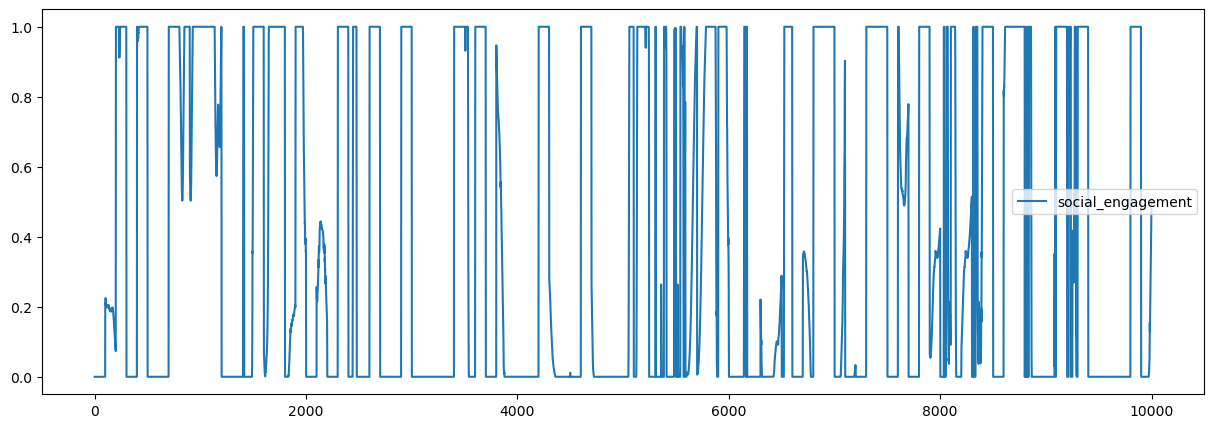

In [424]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.lineplot(data=int_df, y="social_engagement",x="Frame",hue="ID",ci=None, palette="flare")

# plt.plot(data=int_df, ax=ax, kind='line', x='Frame', y='social_engagement')

int_df.iloc[0:10000][["social_engagement"]].plot(kind="line", figsize=(15,5))


# Clustering

In [336]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Visualise Data Distribution

(array([27399.,   731.,   643.,   682.,   525.,   523.,   616.,   402.,
          323., 15356.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

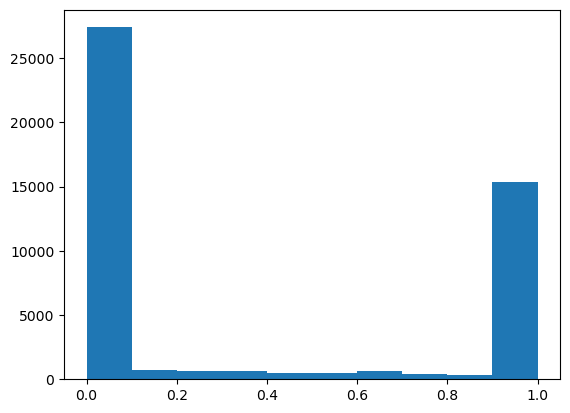

In [337]:
plt.hist(int_df['social_engagement'])

### ___________________________________________________________________

## ________________________________________

In [444]:
int_df['index1'] = int_df.index
new = int_df[['Frame', 'social_engagement']]
new.set_index('Frame', inplace=True)
new = new.T
new

Frame              -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  ...   40  \
social_engagement  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   

Frame               41   42   43   44   45   46   47   48   49  
social_engagement  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 70800 columns]

In [427]:
int_df = int_df.fillna(0)
# int_df = int_df.replace(to_replace=" NULL",value=0)
int_df.isnull().any()
int_df.isnull().sum().sum()

int_df
int_df[(int_df['ID']==1) &(int_df['GROUP'] == 'study5')]

ID  Frame  social_engagement           soc_eng_with   GROUP  index1
17600   1    -50                1.0  social_engagement_1_2  study5   17600
17601   1    -49                1.0  social_engagement_1_2  study5   17601
17602   1    -48                1.0  social_engagement_1_2  study5   17602
17603   1    -47                1.0  social_engagement_1_2  study5   17603
17604   1    -46                1.0  social_engagement_1_2  study5   17604
...    ..    ...                ...                    ...     ...     ...
66695   1     45                0.0  social_engagement_2_1  study5   66695
66696   1     46                0.0  social_engagement_2_1  study5   66696
66697   1     47                0.0  social_engagement_2_1  study5   66697
66698   1     48                0.0  social_engagement_2_1  study5   66698
66699   1     49                0.0  social_engagement_2_1  study5   66699

[2100 rows x 6 columns]

In [428]:
columns_per_row = 100
num_columns = len(new.columns) 

# Calculate the number of resulting rows
num_result_rows = num_columns // columns_per_row + (1 if num_columns % columns_per_row != 0 else 0)
# Initialize an empty DataFrame to store the result
result_list = []

# Loop through the range of rows
for i in range(num_result_rows):
    # Calculate the start and end indices for the current subset of columns
    start_index = i * columns_per_row
    end_index = min((i + 1) * columns_per_row, num_columns)

    ID = int_df['ID'].loc[start_index]
    INDEX = int_df['index1'].loc[start_index]
    GROUP = int_df['GROUP'].loc[start_index]

    subset_df = new.iloc[:, start_index:end_index].copy()
    subset_df['ID'] = ID
    subset_df['OGINDEX'] = INDEX + 50
    subset_df['GROUP'] = GROUP
    # print(subset_df)
    result_list.append(subset_df)    

result_df = pd.DataFrame()
print (subset_df.columns[subset_df.columns.duplicated(keep=False)])
result_df = pd.concat(result_list)
result_df.reset_index(drop=True, inplace=True)
result_df['ID'] = result_df['ID'].astype(int)

result_df


Index([], dtype='object', name='Frame')


Frame       -50       -49       -48       -47       -46       -45       -44  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.211379  0.205350  0.205758  0.224928  0.222171  0.217401  0.213032   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      1.000000  1.000000  0.992533  0.992071  0.996926  0.989993  0.972910   
..          ...       ...       ...       ...       ...       ...       ...   
703    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
704    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
705    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
706    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
707    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...       43        44        45  \
0      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
1      0.203705  0.206590  0.206474  ...  0.10198  0.097736  0.093524   
2      1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
4      0.970368  0.959164  0.962239  ...  1.00000  1.000000  1.000000   
..          ...       ...       ...  ...      ...       ...       ...   
703    1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
704    1.000000  1.000000  1.000000  ...  0.00000  0.000000  0.000000   
705    0.387299  0.391139  0.407174  ...  0.00000  0.000000  0.000000   
706    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
707    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   

Frame        46        47        48        49  ID  OGINDEX   GROUP  
0      0.000000  0.000000  0.000000  0.000000   5       50  study1  
1      0.088611  0.083741  0.078427  0.073444   2      150  study1  
2      1.000000  1.000000  1.000000  1.000000   4      250  study1  
3      0.000000  0.000000  0.000000  0.000000   2      350  study1  
4      1.000000  1.000000  1.000000  1.000000   4      450  study1  
..          ...       ...       ...       ...  ..      ...     ...  
703    1.000000  1.000000  1.000000  1.000000   3    70350  study6  
704    0.000000  0.000000  0.000000  0.000000   2    70450  study6  
705    0.000000  0.000000  0.000000  0.000000   5    70550  study6  
706    0.000000  0.000000  0.000000  0.000000   5    70650  study6  
707    0.000000  0.000000  0.000000  0.000000   2    70750  study6  

[708 rows x 103 columns]

## ______________________________________________________________

In [440]:
select_df = result_df.drop(['ID', 'OGINDEX', 'GROUP'], axis=1)
select_df = select_df.fillna(0)
select_df = select_df.replace(to_replace=" NULL",value=0)
select_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.211379  0.205350  0.205758  0.224928  0.222171  0.217401  0.213032   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      1.000000  1.000000  0.992533  0.992071  0.996926  0.989993  0.972910   
..          ...       ...       ...       ...       ...       ...       ...   
703    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
704    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
705    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
706    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
707    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        40        41        42  \
0      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1      0.203705  0.206590  0.206474  ...  0.115816  0.110971  0.106544   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4      0.970368  0.959164  0.962239  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
703    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
704    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
705    0.387299  0.391139  0.407174  ...  0.000000  0.000000  0.000000   
706    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
707    0.000000  0.000000  0.000000  ...  1.000000  1.000000  0.000000   

Frame       43        44        45        46        47        48        49  
0      0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1      0.10198  0.097736  0.093524  0.088611  0.083741  0.078427  0.073444  
2      1.00000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
3      0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4      1.00000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
..         ...       ...       ...       ...       ...       ...       ...  
703    1.00000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
704    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
705    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
706    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
707    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[708 rows x 100 columns]

In [441]:
s = select_df.std(axis=1)
select_df['std'] = s
select_df['ID'] = result_df['ID'].values
select_df['OGINDEX'] = result_df['OGINDEX'].values

std_df = select_df
std_df = std_df.loc[std_df['std'] != 0.000000]
std_df = std_df.loc[std_df['std'] > 0.090499]
std_df['GROUP'] = result_df['GROUP']

std_df = std_df.reset_index()
stdd_df = std_df
# stdd_df['GROUP'] = select_df['GROUP'].values
std_df
# std_df[std_df['GROUP']=='study5']

Frame  index       -50       -49       -48       -47       -46       -45  \
0          8  1.000000  1.000000  0.987772  0.969110  0.948663  0.928404   
1          9  0.607032  0.583048  0.563948  0.546880  0.529279  0.518946   
2         11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3         14  0.000000  0.000000  0.000000  0.000000  0.296315  0.525046   
4         16  0.086001  0.069951  0.061663  0.051460  0.043821  0.035085   
..       ...       ...       ...       ...       ...       ...       ...   
221      698  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
222      699  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
223      704  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
224      705  0.481144  0.459985  0.436112  0.407776  0.402511  0.385061   
225      707  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -44       -43       -42  ...        44        45        46  \
0      0.911765  0.894542  0.881232  ...  1.000000  1.000000  1.000000   
1      0.509715  0.504803  0.503123  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  0.906577  0.940798  0.977336   
3      1.000000  1.000000  1.000000  ...  0.353409  0.405785  0.556372   
4      0.028209  0.020379  0.015057  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
221    1.000000  1.000000  1.000000  ...  0.115760  0.067933  0.029124   
222    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
223    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
224    0.393112  0.387299  0.391139  ...  0.000000  0.000000  0.000000   
225    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame        47        48        49       std  ID  OGINDEX   GROUP  
0      1.000000  1.000000  1.000000  0.175454   1      850  study1  
1      1.000000  1.000000  1.000000  0.174386   1      950  study1  
2      1.000000  1.000000  1.000000  0.158623   4     1150  study1  
3      0.658911  0.708306  0.824043  0.299278   3     1450  study1  
4      1.000000  1.000000  1.000000  0.454354   1     1650  study1  
..          ...       ...       ...       ...  ..      ...     ...  
221    0.008758  0.000053  0.000000  0.280763   1    69850  study6  
222    0.000000  0.000000  0.000000  0.289450   4    69950  study6  
223    0.000000  0.000000  0.000000  0.493858   2    70450  study6  
224    0.000000  0.000000  0.000000  0.231023   5    70550  study6  
225    0.000000  0.000000  0.000000  0.368453   2    70750  study6  

[226 rows x 105 columns]

In [442]:
interaction_counts = std_df.groupby(['GROUP'])['ID'].value_counts()
# interaction_counts_df = interaction_counts.reset_index(name='occurrences')
# interaction_counts_df = interaction_counts_df.sort_values(by='GROUP')
interaction_counts_df

GROUP  ID  occurrences
0   study1   4            7
1   study1   1            4
2   study1   2            4
3   study1   5            3
4   study1   3            1
5   study2   2           11
6   study2   4           11
7   study2   1           10
8   study2   3           10
9   study2   5            5
10  study3   1           15
11  study3   4           12
12  study3   5           12
13  study3   2           11
14  study3   3            9
15  study4   1           13
16  study4   3            9
17  study4   4            7
18  study4   2            6
19  study4   5            2
20  study5   3            8
21  study5   5            8
22  study5   4            6
23  study5   2            3
24  study6   4           15
25  study6   1            7
26  study6   2            7
27  study6   5            6
28  study6   3            4

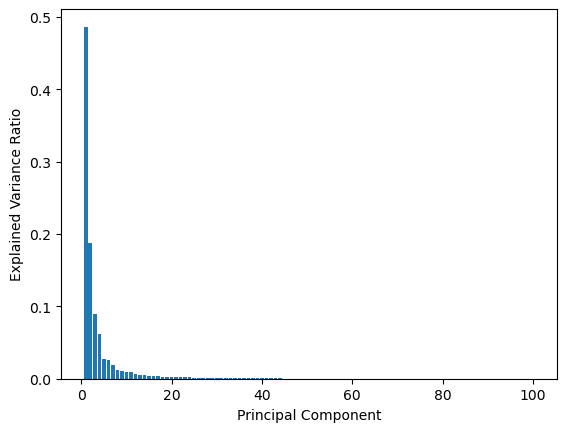

Original DataFrame:
Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42      

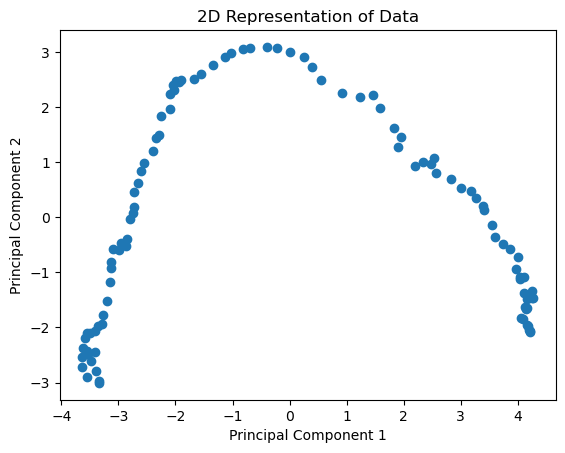

In [361]:
std_df = std_df.rename(str,axis="columns")
std_df = std_df.drop('std', axis=1)
std_df = std_df.drop('index', axis=1)
std_df = std_df.drop('ID', axis=1)
std_df = std_df.drop('OGINDEX', axis=1)
std_df = std_df.drop('GROUP', axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(std_df)

# Perform PCA
pca = PCA()
#pca_result = pca.fit_transform(scaled_data)

pca_result = pca.fit_transform(std_df.T)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 5
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(std_df.T)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)



# Display the results
print("Original DataFrame:")
print(std_df)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()

In [362]:
pca_result.T
pca_result = (pca_result-pca_result.min())/(pca_result.max()-pca_result.min())
# df_norm

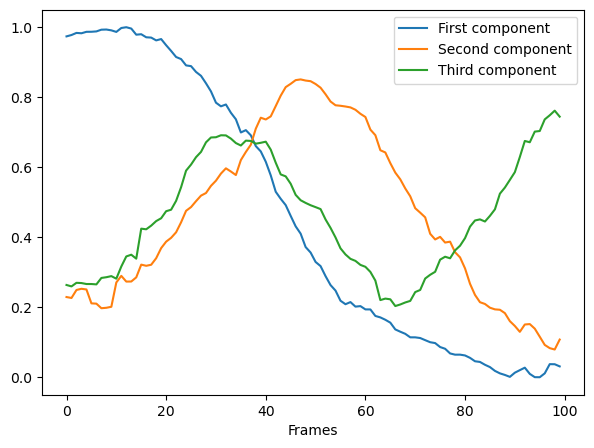

In [363]:
fig, ax = plt.subplots(figsize=(7, 5))

line1, = ax.plot(pca_result.T[0])
line2, = ax.plot(pca_result.T[1])
line3, = ax.plot(pca_result.T[2])

plt.xlabel('Frames')
plt.ylabel('')
# plt.xlim(-50, 50)

ax.legend([line1, line2, line3], ['First component', 'Second component', 'Third component'])

0          1          2          3          4
0    35.363904  39.368948  38.608051  38.920125  40.005319
1    36.592317  43.318758  42.708586  42.241285  41.524595
2    42.484833  36.274985  38.764337  38.365395  37.793626
3     8.844857   2.551316   5.689814   4.173315   5.570929
4    10.547822  28.682652  26.440186  26.567736  27.678686
..         ...        ...        ...        ...        ...
144  42.493937  41.223679  34.914301  38.942047  38.603477
145   6.118759  14.610487   8.243272   7.210216   9.169670
146  40.767079  25.043892  25.157195  22.980029  23.119395
147  17.219830   9.326224  10.347202   9.987654   8.882230
148   1.988559   6.878944   7.502525   6.844535   8.402401

[149 rows x 5 columns]

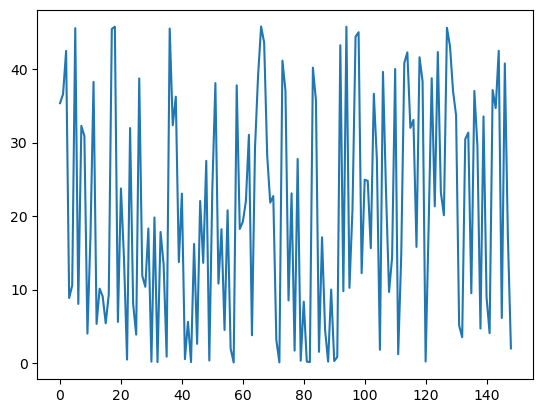

In [364]:
std_df.dot(pca_result)[0].plot()
projected_interactions = std_df.dot(pca_result) 
#the spikes: how they've responded to the PCA

projected_interactions_df = pd.DataFrame(projected_interactions)
projected_interactions_df

Number of clusters from 3 to 7: 
 [3, 4, 5, 6]
For n_clusters = 3, silhouette score is 0.45817447614958223)
For n_clusters = 4, silhouette score is 0.4394385466871112)
For n_clusters = 5, silhouette score is 0.4649534240365869)
For n_clusters = 6, silhouette score is 0.45011148445414795)


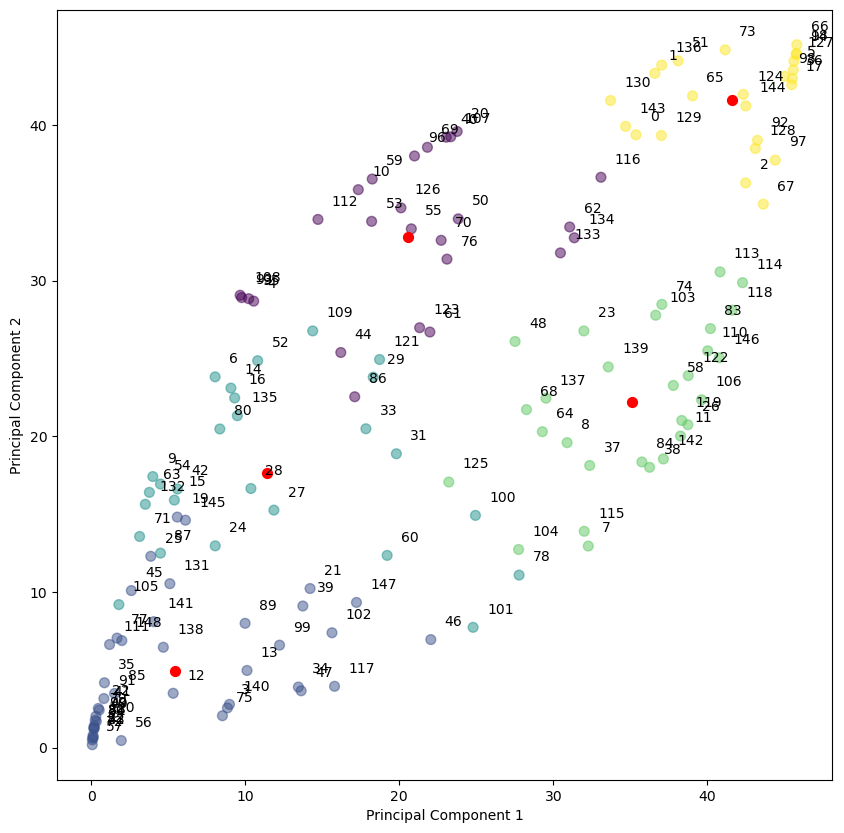

In [382]:
# Convert DataFrame to matrix
X = projected_interactions_df[[0, 1, 2, 3, 4]]

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
projected_interactions_df['Cluster'] = kmeans.labels_

##Optimum k
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(3,7))
print ("Number of clusters from 3 to 7: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
           
##############

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X[0], X[1], c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")


#label as ID
for i, txt in enumerate(range(len(projected_interactions_df))):
    plt.annotate(txt, (X.iloc[i,0], X.iloc[i,1]), xytext=(10,10), textcoords='offset points')
    
# plt.legend()
plt.show()

<AxesSubplot:xlabel='Frame'>

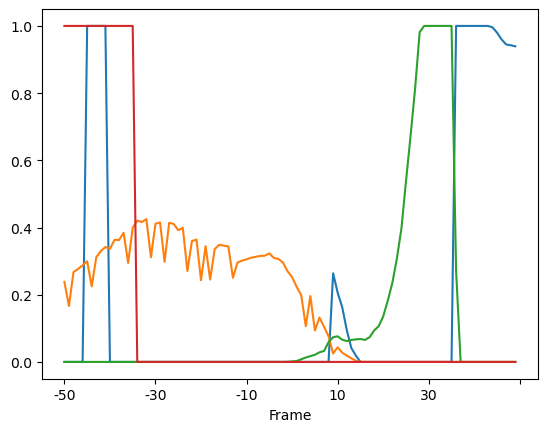

In [383]:
std_df.iloc[12].plot()
std_df.iloc[39].plot()
std_df.iloc[35].plot()
std_df.iloc[117].plot()

In [384]:
#get avg/std of cluster
stdd_df

Frame  index       -50       -49       -48       -47       -46       -45  \
0          8  1.000000  1.000000  0.987772  0.969110  0.948663  0.928404   
1          9  0.607032  0.583048  0.563948  0.546880  0.529279  0.518946   
2         11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3         14  0.000000  0.000000  0.000000  0.000000  0.296315  0.525046   
4         16  0.086001  0.069951  0.061663  0.051460  0.043821  0.035085   
..       ...       ...       ...       ...       ...       ...       ...   
144      462  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145      463  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146      468  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147      469  0.481144  0.459985  0.436112  0.407776  0.402511  0.385061   
148      471  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -44       -43       -42  ...        44        45        46  \
0      0.911765  0.894542  0.881232  ...  1.000000  1.000000  1.000000   
1      0.509715  0.504803  0.503123  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  0.906577  0.940798  0.977336   
3      1.000000  1.000000  1.000000  ...  0.353409  0.405785  0.556372   
4      0.028209  0.020379  0.015057  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.115760  0.067933  0.029124   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.393112  0.387299  0.391139  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame        47        48        49       std  ID  OGINDEX   GROUP  
0      1.000000  1.000000  1.000000  0.175454   1      850  study1  
1      1.000000  1.000000  1.000000  0.174386   1      950  study1  
2      1.000000  1.000000  1.000000  0.158623   4     1150  study1  
3      0.658911  0.708306  0.824043  0.299278   3     1450  study1  
4      1.000000  1.000000  1.000000  0.454354   1     1650  study1  
..          ...       ...       ...       ...  ..      ...     ...  
144    0.008758  0.000053  0.000000  0.280763   1    46250  study6  
145    0.000000  0.000000  0.000000  0.289450   4    46350  study6  
146    0.000000  0.000000  0.000000  0.493858   2    46850  study6  
147    0.000000  0.000000  0.000000  0.231023   5    46950  study6  
148    0.000000  0.000000  0.000000  0.368453   2    47150  study6  

[149 rows x 105 columns]

In [385]:
std_df['Cluster'] = projected_interactions_df['Cluster']
std_df['ID'] = stdd_df['ID']
std_df['OGINDEX'] = stdd_df['OGINDEX']
std_df['index'] = stdd_df['index']
std_df['std'] = stdd_df['std']
# std_df['GROUP'] = stdd_df['GROUP']
std_df['GROUP'] = stdd_df['GROUP']
std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        46        47        48  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000  1.000000   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  0.977336  1.000000  1.000000   
3      1.000000  1.000000  1.000000  ...  0.556372  0.658911  0.708306   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.029124  0.008758  0.000053   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame        49  Cluster  ID  OGINDEX  index       std   GROUP  
0      1.000000        4   1      850      8  0.175454  study1  
1      1.000000        4   1      950      9  0.174386  study1  
2      1.000000        4   4     1150     11  0.158623  study1  
3      0.824043        1   3     1450     14  0.299278  study1  
4      1.000000        0   1     1650     16  0.454354  study1  
..          ...      ...  ..      ...    ...       ...     ...  
144    0.000000        4   1    46250    462  0.280763  study6  
145    0.000000        1   4    46350    463  0.289450  study6  
146    0.000000        3   2    46850    468  0.493858  study6  
147    0.000000        1   5    46950    469  0.231023  study6  
148    0.000000        1   2    47150    471  0.368453  study6  

[149 rows x 106 columns]

In [386]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(groups[['OGINDEX','Cluster', 'ID', 'std', 'index']])  

Frame  OGINDEX  Cluster  ID       std  index
4         1650        0   1  0.454354     16
10        5150        0   4  0.447534     51
20        6550        0   1  0.414993     65
40       12750        0   1  0.414416    127
44       13650        0   1  0.496567    136
50       15450        0   3  0.472582    154
53       16450        0   1  0.376846    164
55       17050        0   4  0.500000    170
59       19950        0   3  0.456048    199
61       20750        0   5  0.114157    207
62       20850        0   5  0.134106    208
69       22050        0   4  0.419943    220
70       22550        0   1  0.273962    225
76       27350        0   2  0.222541    273
86       29950        0   2  0.483022    299
93       31550        0   5  0.491213    315
95       31750        0   3  0.488429    317
96       31850        0   5  0.436859    318
107      35350        0   4  0.402114    353
108      35550        0   4  0.491676    355
112      36250        0   2  0.463821    362
116      3

Frame
-50    0.235276
-49    0.236297
-48    0.237054
-47    0.237287
-46    0.238684
         ...   
45     0.908378
46     0.908484
47     0.870550
48     0.870585
49     0.908001
Length: 100, dtype: float64
Frame
-50    0.208966
-49    0.209455
-48    0.188033
-47    0.185972
-46    0.200932
         ...   
45     0.340348
46     0.375650
47     0.381915
48     0.409311
49     0.416427
Length: 100, dtype: float64
Frame
-50    0.139459
-49    0.140050
-48    0.173694
-47    0.176592
-46    0.176413
         ...   
45     0.440359
46     0.446094
47     0.452008
48     0.460775
49     0.461934
Length: 100, dtype: float64
Frame
-50    0.935662
-49    0.947689
-48    0.955020
-47    0.952537
-46    0.954208
         ...   
45     0.179826
46     0.218760
47     0.253197
48     0.259198
49     0.250854
Length: 100, dtype: float64
Frame
-50    0.838512
-49    0.842066
-48    0.845052
-47    0.848936
-46    0.855166
         ...   
45     0.603698
46     0.601467
47     0.601879
48     0.5

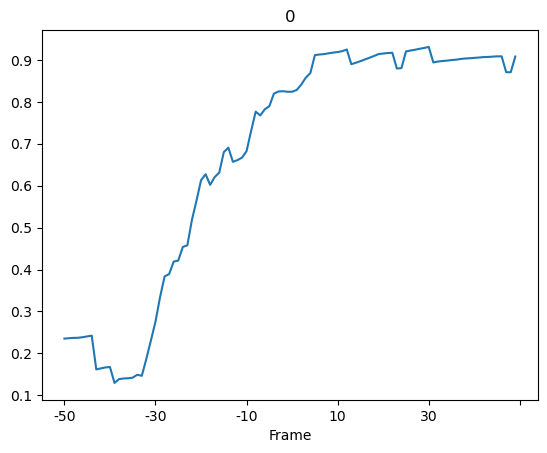

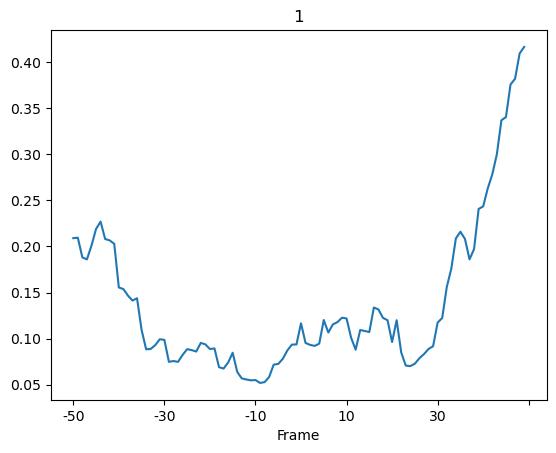

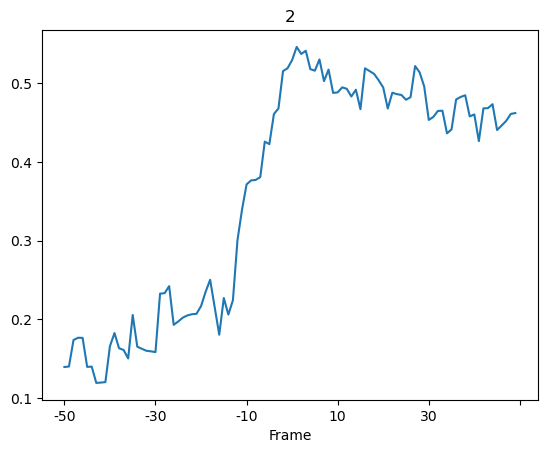

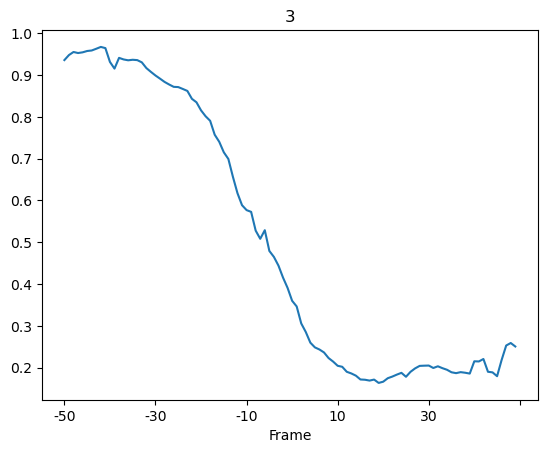

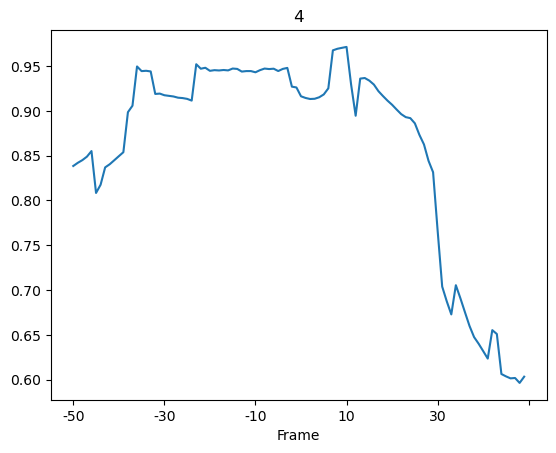

In [391]:
#plotting cluster 
grp = std_df.groupby(by=["Cluster"])

#avg profile of cluster
for name, data in grp:
    data = data.drop(['std','ID', 'OGINDEX', 'Cluster', 'index'], axis=1)
    avg = data.mean(axis=0)
    fig, ax = plt.subplots()
    ax.set_title(name)
    print(avg)
    ax= avg.plot(label=name)    

In [392]:
std_df
data_df
full_df = pd.merge(std_df, data_df, left_on='OGINDEX', right_on='Frame', how='inner')
full_df

-50  -49       -48      -47       -46       -45       -44       -43  \
0    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
1    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
2    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
3    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
4    1.0  1.0  0.987772  0.96911  0.948663  0.928404  0.911765  0.894542   
..   ...  ...       ...      ...       ...       ...       ...       ...   
886  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
887  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
888  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
889  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
890  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

          -42       -41  ...         51z          52x          52y  \
0    0.881232  0.870084  ...   84.982223   861.241572  -393.775984   
1    0.881232  0.870084  ...  334.851935    15.356476  1323.536169   
2    0.881232  0.870084  ... -314.913565  -636.787736   509.563000   
3    0.881232  0.870084  ...  453.506104  1105.087524  -102.280317   
4    0.881232  0.870084  ... -376.423480  -410.374683   896.034631   
..        ...       ...  ...         ...          ...          ...   
886  0.000000  0.000000  ... -643.051941   135.212899   -68.231843   
887  0.000000  0.000000  ... -549.497295    78.421613   778.037110   
888  0.000000  0.000000  ... -217.833136   153.651862   653.882043   
889  0.000000  0.000000  ... -787.752326   368.583427  -235.987657   
890  0.000000  0.000000  ...  238.992947 -2752.684085 -3650.367875   

             52z          53x          53y          53z          54x  \
0    -207.513765  -134.103548  3540.814124   301.221770  -735.943273   
1     839.912036 -1560.424535   386.220002   320.287135 -1060.803393   
2    -147.887541  1263.957684  2310.726059  -471.720689   983.258620   
3    -104.392443  1662.561718  1652.374228   865.207446  1866.975742   
4    -121.541181 -1786.039913   721.115477  -208.277220 -1811.398866   
..           ...          ...          ...          ...          ...   
886   703.422792   178.525459   647.820281  1427.577206   -61.136323   
887   102.219478  1658.214815   840.829587 -1022.755974  1289.589626   
888  -389.048867   793.501410    19.324000  -181.461658  -685.917409   
889 -1201.984411  1218.265920    49.700777  -916.879293  -433.274983   
890   388.010318  -311.597528   575.209994  -139.897940 -2064.602221   

             54y          54z  
0    1914.480307   252.258654  
1    1352.674595   932.486179  
2     312.121908  -121.506979  
3     879.162294   295.324251  
4    1769.046035  -208.150588  
..           ...          ...  
886   735.239307  -687.712918  
887    66.697742 -1051.677987  
888   826.481601  -304.009508  
889     0.252264   629.555734  
890 -3935.312584   568.797478  

[891 rows x 199 columns]

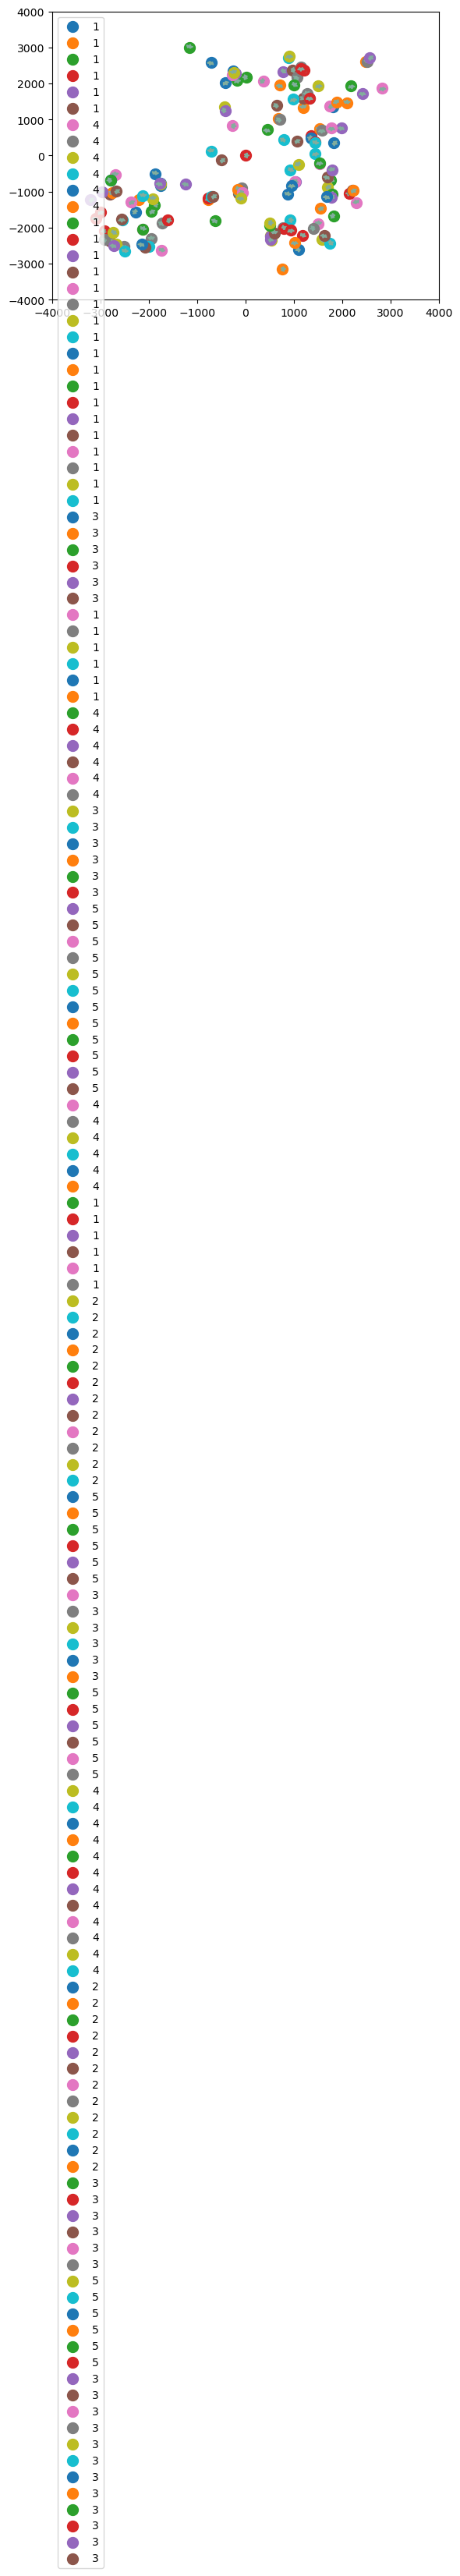

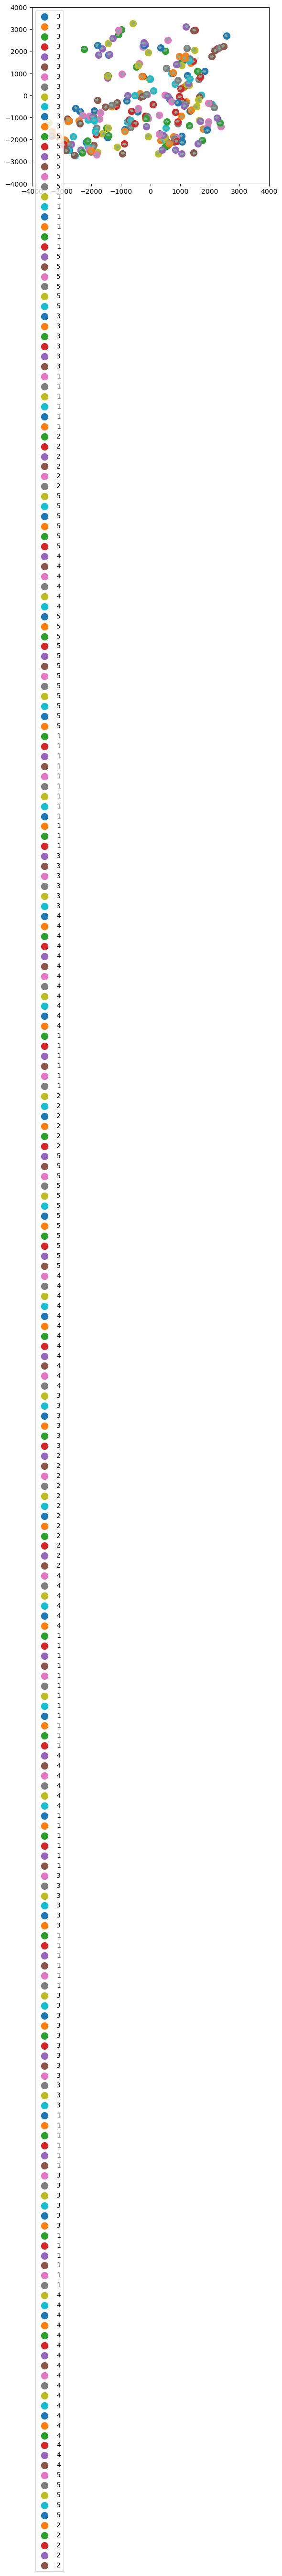

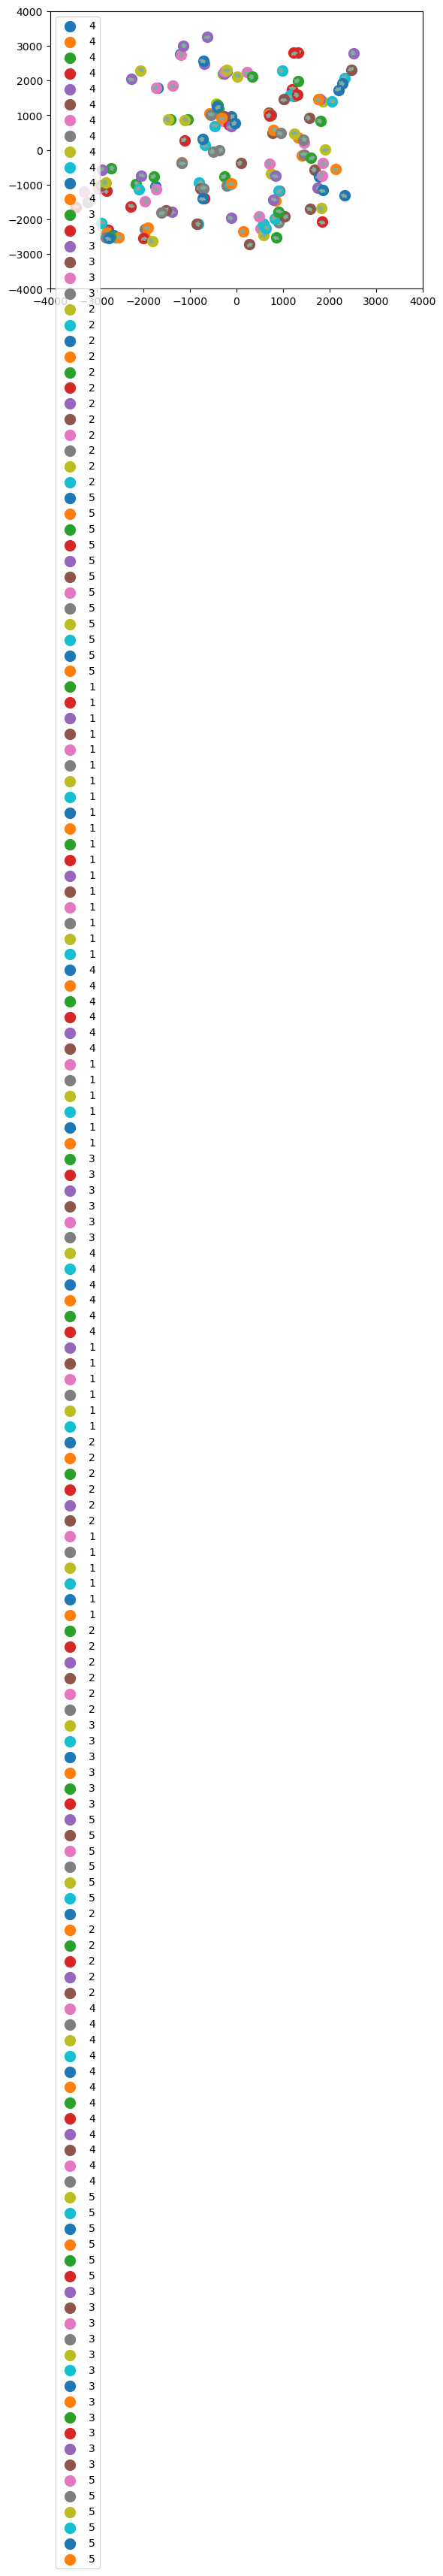

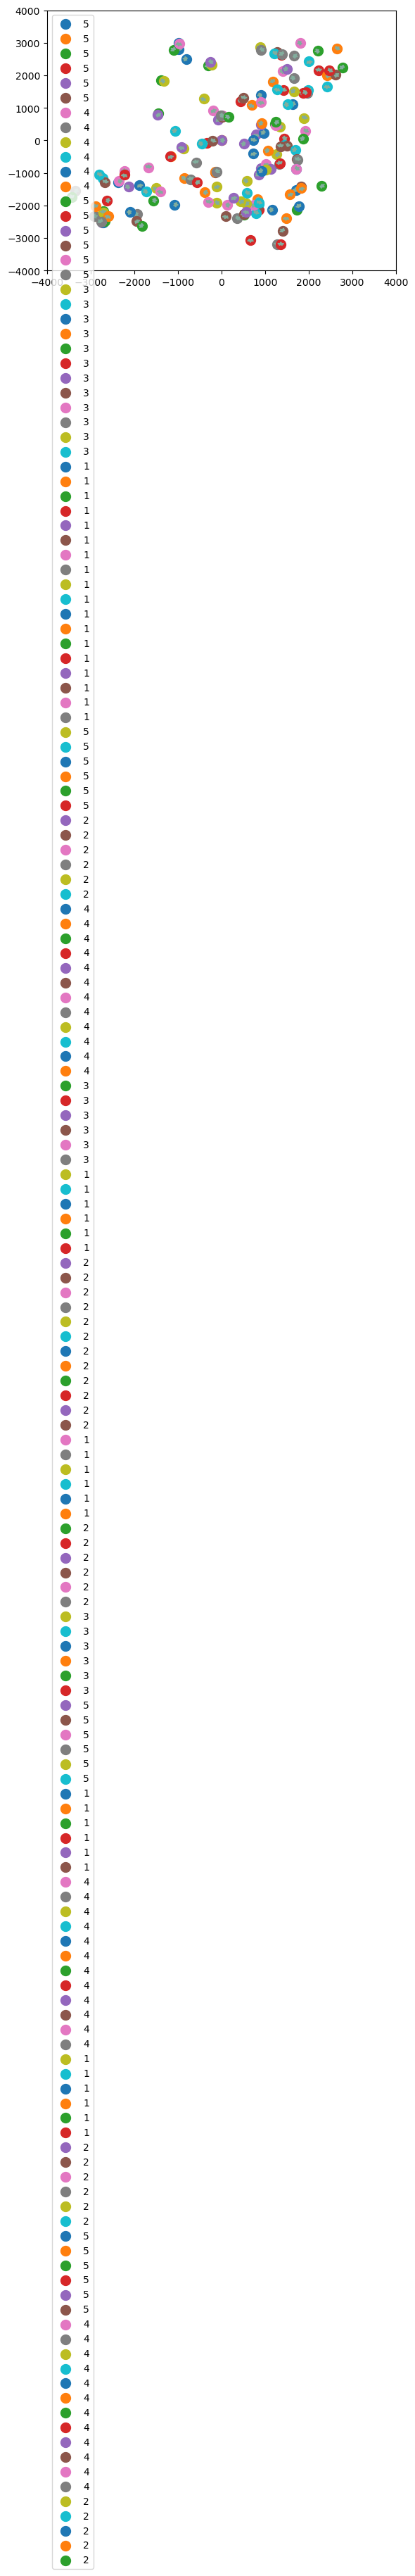

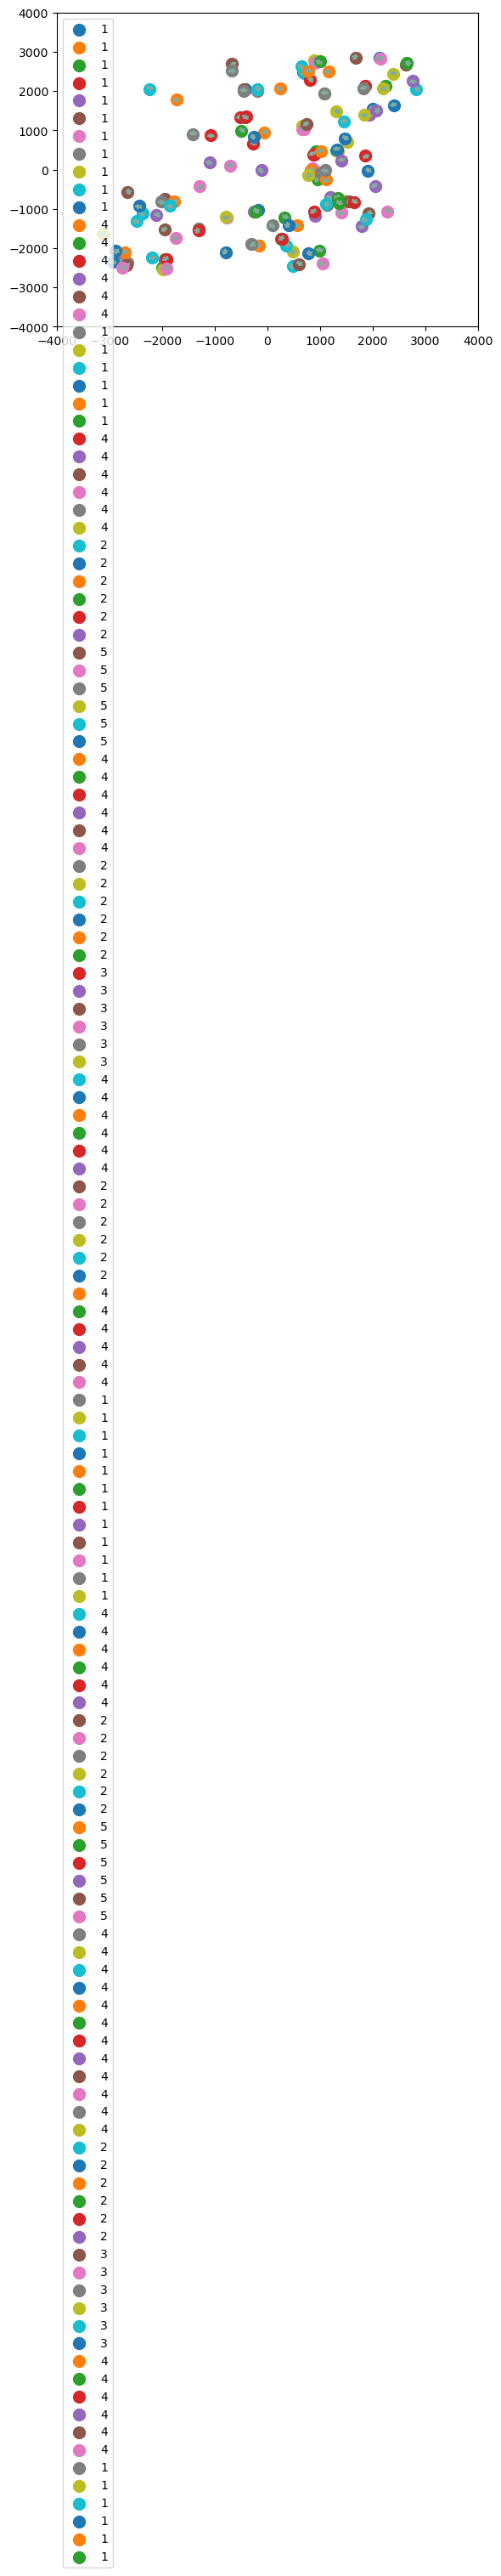

In [393]:
grp = full_df.groupby(by=["Cluster"])

length = 10

for name, data in grp:
    for i, row in data.iterrows():
        if i == ID:
            continue
        else:
            ID = int(row["ID"])
            x = row['{}TX'.format(ID)]
            y = row['{}TY'.format(ID)]
            yaw = row['{}TZ'.format(ID)]
    
        plt.scatter(x, y, s=100, label=ID)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        
    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()


In [395]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in std_df.iterrows():
    frame = row['OGINDEX']
    frame = (int(frame)/VICON_FPS)*VIDEO_FPS
    std_df.at[index,'Framez'] = int(frame)

std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        47        48        49  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000  1.000000   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3      1.000000  1.000000  1.000000  ...  0.658911  0.708306  0.824043   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.008758  0.000053  0.000000   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame  Cluster  ID  OGINDEX  index       std   GROUP  Framez  
0            4   1      850      8  0.175454  study1   170.0  
1            4   1      950      9  0.174386  study1   190.0  
2            4   4     1150     11  0.158623  study1   230.0  
3            1   3     1450     14  0.299278  study1   290.0  
4            0   1     1650     16  0.454354  study1   330.0  
..         ...  ..      ...    ...       ...     ...     ...  
144          4   1    46250    462  0.280763  study6  9250.0  
145          1   4    46350    463  0.289450  study6  9270.0  
146          3   2    46850    468  0.493858  study6  9370.0  
147          1   5    46950    469  0.231023  study6  9390.0  
148          1   2    47150    471  0.368453  study6  9430.0  

[149 rows x 107 columns]

In [396]:
projected_interactions_df
# projected_interactions_df = projected_interactions_df.rename_axis('Frame', axis=1)
projected_interactions_df.rename(columns={0:'Zero'}, inplace=True)
projected_interactions_df.rename(columns={1:'One'}, inplace=True)
projected_interactions_df.rename(columns={2:'Two'}, inplace=True)
projected_interactions_df.rename(columns={3:'Three'}, inplace=True)
projected_interactions_df.rename(columns={4:'Four'}, inplace=True)
projected_interactions_df

Zero        One        Two      Three       Four  Cluster
0    35.363904  39.368948  38.608051  38.920125  40.005319        4
1    36.592317  43.318758  42.708586  42.241285  41.524595        4
2    42.484833  36.274985  38.764337  38.365395  37.793626        4
3     8.844857   2.551316   5.689814   4.173315   5.570929        1
4    10.547822  28.682652  26.440186  26.567736  27.678686        0
..         ...        ...        ...        ...        ...      ...
144  42.493937  41.223679  34.914301  38.942047  38.603477        4
145   6.118759  14.610487   8.243272   7.210216   9.169670        1
146  40.767079  25.043892  25.157195  22.980029  23.119395        3
147  17.219830   9.326224  10.347202   9.987654   8.882230        1
148   1.988559   6.878944   7.502525   6.844535   8.402401        1

[149 rows x 6 columns]

In [397]:
projected_interactions_df
projected_interactions_df = projected_interactions_df.drop('Cluster', axis=1)
std_df
clus_df = pd.concat([std_df, projected_interactions_df], axis=1)
print(clus_df.columns.tolist())

['-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 'Cluster', 'ID', 'OGINDEX', 'index', 'std', 'GROUP', 'Framez', 'Zero', 'One', 'Two', 'Three', 'Four']


In [398]:
clus_df

-50       -49       -48       -47       -46       -45       -44  \
0    1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1    0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3    0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4    0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..        ...       ...       ...       ...       ...       ...       ...   
144  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147  0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          -43       -42       -41  ...  OGINDEX  index       std   GROUP  \
0    0.894542  0.881232  0.870084  ...      850      8  0.175454  study1   
1    0.504803  0.503123  0.506511  ...      950      9  0.174386  study1   
2    1.000000  1.000000  1.000000  ...     1150     11  0.158623  study1   
3    1.000000  1.000000  1.000000  ...     1450     14  0.299278  study1   
4    0.020379  0.015057  0.010384  ...     1650     16  0.454354  study1   
..        ...       ...       ...  ...      ...    ...       ...     ...   
144  1.000000  1.000000  1.000000  ...    46250    462  0.280763  study6   
145  0.000000  0.000000  0.000000  ...    46350    463  0.289450  study6   
146  1.000000  1.000000  1.000000  ...    46850    468  0.493858  study6   
147  0.387299  0.391139  0.407174  ...    46950    469  0.231023  study6   
148  0.000000  0.000000  0.000000  ...    47150    471  0.368453  study6   

     Framez       Zero        One        Two      Three       Four  
0     170.0  35.363904  39.368948  38.608051  38.920125  40.005319  
1     190.0  36.592317  43.318758  42.708586  42.241285  41.524595  
2     230.0  42.484833  36.274985  38.764337  38.365395  37.793626  
3     290.0   8.844857   2.551316   5.689814   4.173315   5.570929  
4     330.0  10.547822  28.682652  26.440186  26.567736  27.678686  
..      ...        ...        ...        ...        ...        ...  
144  9250.0  42.493937  41.223679  34.914301  38.942047  38.603477  
145  9270.0   6.118759  14.610487   8.243272   7.210216   9.169670  
146  9370.0  40.767079  25.043892  25.157195  22.980029  23.119395  
147  9390.0  17.219830   9.326224  10.347202   9.987654   8.882230  
148  9430.0   1.988559   6.878944   7.502525   6.844535   8.402401  

[149 rows x 112 columns]

Cluster
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Zero, dtype: object

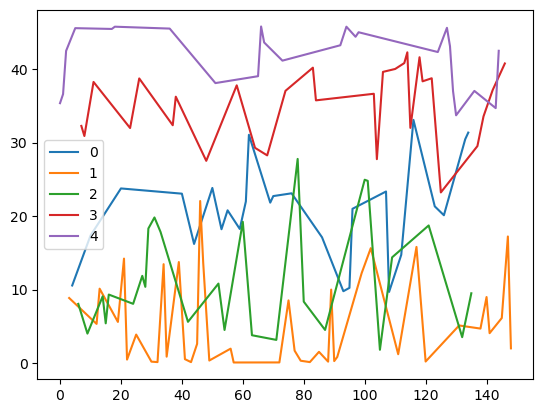

In [399]:
clus_df.groupby('Cluster')['Zero'].plot(legend=True)
# clus_df.groupby('Cluster')['One'].plot(legend=True)
# clus_df.groupby('Cluster')['Two'].plot(legend=True)
# clus_df.groupby('Cluster')['Three'].plot(legend=True)
# clus_df.groupby('Cluster')['Four'].plot(legend=True)

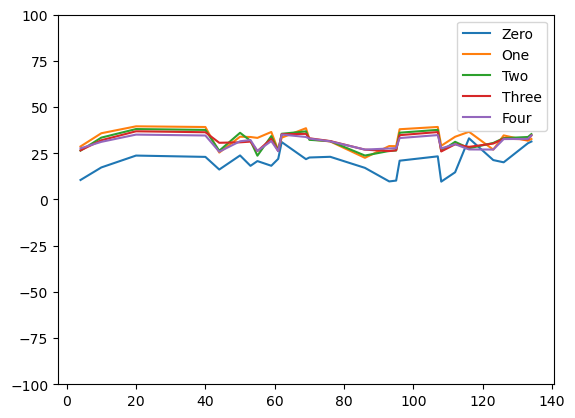

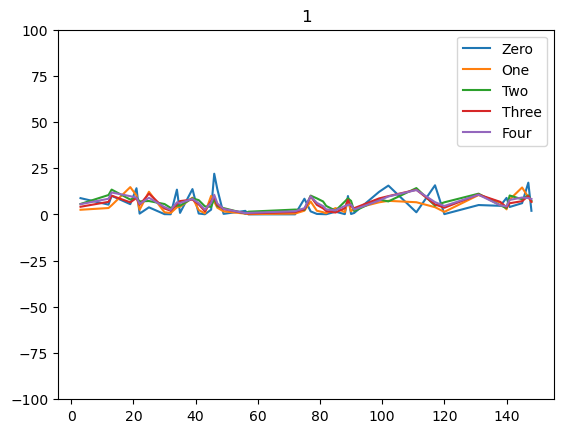

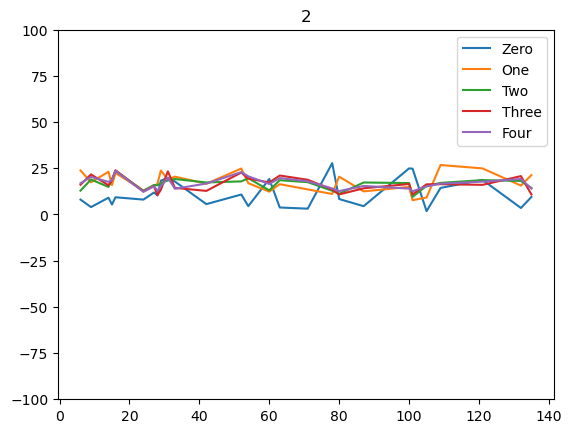

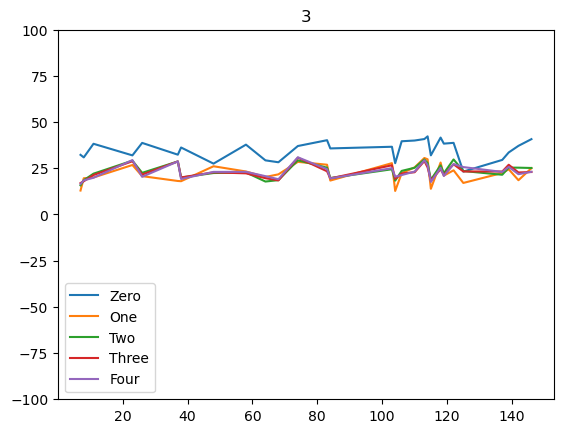

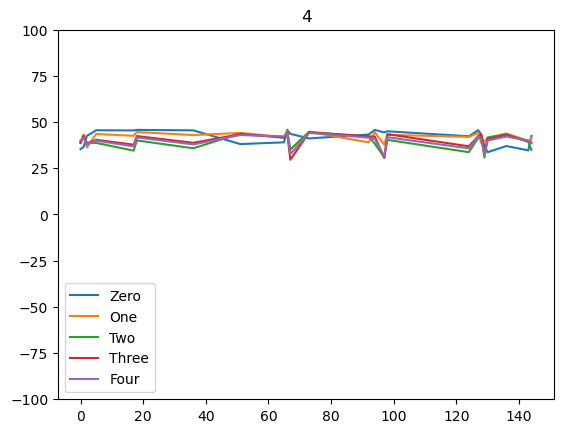

In [400]:
grp = clus_df.groupby(by=["Cluster"])

for name, data in grp:
    ax= data[['Zero','One', 'Two', 'Three', 'Four']].plot(title=name, ylim=(-100,100))  
#     plt.xlabel('Framez')
    

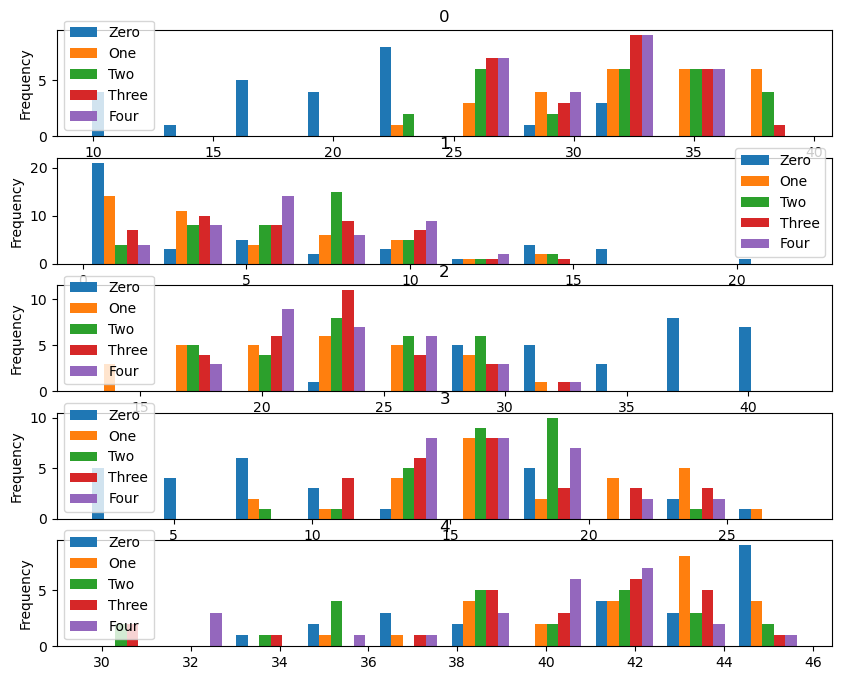

In [252]:
ax = clus_df.plot.hist(column=["Zero", "One", "Two", "Three", "Four"], by="Cluster", figsize=(10, 8))

In [401]:
grp = stdd_df.groupby(by=["GROUP"])

for name, data in grp:
    print(data['ID'])
#     print(name)

0     1
1     1
2     4
3     3
4     1
5     1
6     4
7     5
8     4
72    5
73    2
74    4
75    4
76    2
Name: ID, dtype: int32
9     4
10    4
11    5
12    3
13    5
14    3
15    2
16    2
17    4
18    2
19    1
20    1
21    5
22    3
23    3
77    4
78    2
79    3
80    3
81    2
82    2
83    3
84    1
85    4
86    2
87    5
88    1
89    1
90    4
91    1
92    4
Name: ID, dtype: int32
24     5
25     1
26     3
27     5
28     1
29     1
30     2
31     1
32     5
33     4
34     4
35     5
36     5
37     1
38     1
39     5
40     1
93     5
94     1
95     3
96     5
97     1
98     4
99     3
100    2
101    4
102    1
103    2
104    2
105    4
106    1
107    4
108    4
109    5
110    2
111    3
112    2
113    3
Name: ID, dtype: int32
41     1
42     1
43     1
44     1
45     3
46     4
47     4
48     1
49     1
50     3
51     4
52     3
53     1
114    5
115    1
116    2
117    3
118    4
119    4
120    1
121    3
122    1
123    3
124    2
125    2
Name

In [402]:
#is participant always in same cluster?

# Group by "GROUP" column
grouped_by_group = std_df.groupby(by=["GROUP"])

# Iterate over groups
for group_name, group_data in grouped_by_group:
    print(f"Group {group_name}:")
    
    # Group data within each group by "Cluster" column
    grouped_by_cluster = group_data.groupby(by=["Cluster"])
    
    # Count occurrences of each ID within the cluster
    id_counts = grouped_by_cluster['ID'].value_counts()

    print(id_counts)

    

Group study1:
Cluster  ID
0        1     1
         2     1
1        3     1
         4     1
         5     1
2        4     1
3        4     2
         5     1
4        1     3
         2     1
         4     1
Name: ID, dtype: int64
Group study2:
Cluster  ID
0        1     1
         2     1
         4     1
1        1     4
         3     3
         4     3
         2     2
         5     2
2        2     3
         3     2
         4     1
         5     1
3        3     2
         1     1
         5     1
4        4     2
         2     1
Name: ID, dtype: int64
Group study3:
Cluster  ID
0        4     2
         5     2
         1     1
         2     1
         3     1
1        5     3
         1     2
         3     2
         2     1
         4     1
2        1     3
         4     3
         5     3
         2     1
3        1     3
         2     3
         3     2
4        1     2
         4     1
         5     1
Name: ID, dtype: int64
Group study4:
Cluster  ID
0        1 

In [407]:
counts = std_df.groupby(['Cluster', 'GROUP'])['ID'].value_counts()
counts_df = counts.reset_index(name='occurrences')
counts_df
counts_df[counts_df['GROUP']=='study5']

Cluster   GROUP  ID  occurrences
13        0  study5   3            2
14        0  study5   4            1
15        0  study5   5            1
36        1  study5   2            1
37        1  study5   3            1
38        1  study5   5            1
54        2  study5   3            1
55        2  study5   4            1
56        2  study5   5            1
71        3  study5   5            1
85        4  study5   4            2
86        4  study5   2            1
87        4  study5   5            1

In [411]:
std_df
std_df[std_df['GROUP']=='study5']

Frame       -50       -49       -48       -47       -46       -45       -44  \
54     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
55     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
56     1.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
57     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
58     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
126    0.108005  0.115090  0.117917  0.100748  0.103084  0.109725  0.114462   
127    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
128    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
129    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
130    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
131    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
132    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
133    0.625564  0.619382  0.614668  0.611777  0.609810  0.610396  0.610923   
134    0.614134  0.615731  0.618149  0.619411  0.634274  0.637617  0.641878   
135    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        47        48        49  \
54     0.000000  0.000000  0.000000  ...  1.000000  1.000000  1.000000   
55     0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000   
56     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
57     0.000000  0.000000  0.000000  ...  0.000000  1.000000  1.000000   
58     1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
126    0.122042  0.129057  0.136226  ...  1.000000  1.000000  1.000000   
127    1.000000  1.000000  1.000000  ...  0.561356  0.549887  0.533466   
128    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
129    1.000000  1.000000  0.991518  ...  0.051463  0.048131  0.421326   
130    0.000000  0.000000  0.000000  ...  1.000000  1.000000  1.000000   
131    0.000005  0.001150  0.001739  ...  0.476382  0.482106  0.489280   
132    0.000000  0.000000  0.000000  ...  1.000000  1.000000  1.000000   
133    0.610954  0.611973  0.613620  ...  0.989631  1.000000  1.000000   
134    0.646298  0.650599  0.660796  ...  1.000000  1.000000  1.000000   
135    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame  Cluster  ID  OGINDEX  index       std   GROUP  Framez  
54           2   4    16950    169  0.497570  study5  3390.0  
55           0   4    17050    170  0.500000  study5  3410.0  
56           1   2    17250    172  0.140705  study5  3450.0  
57           1   5    19550    195  0.140705  study5  3910.0  
58           3   5    19650    196  0.449354  study5  3930.0  
126          0   5    40350    403  0.342651  study5  8070.0  
127          4   5    40450    404  0.131967  study5  8090.0  
128          4   4    40550    405  0.260546  study5  8110.0  
129          4   4    40650    406  0.411906  study5  8130.0  
130          4   2    40850    408  0.358870  study5  8170.0  
131          1   3    41150    411  0.151811  study5  8230.0  
132          2   3    41850    418  0.475349  study5  8370.0  
133          0   3    42450    424  0.099719  study5  8490.0  
134          0   3    42550    425  0.125506  study5  8510.0  
135          2   5    43250    432  0.460566  study5  8650.0  

[15 rows x 107 columns]

In [409]:
#How many people in same ish cluster?
grp = std_df.groupby(by=["GROUP"])

for name, data in grp:
    print(data['ID'].value_counts())

4    5
1    4
5    2
2    2
3    1
Name: ID, dtype: int64
4    7
3    7
2    7
1    6
5    4
Name: ID, dtype: int64
1    11
5     9
4     7
2     6
3     5
Name: ID, dtype: int64
1    10
3     6
4     5
2     3
5     1
Name: ID, dtype: int64
5    5
4    4
3    4
2    2
Name: ID, dtype: int64
4    9
1    5
2    5
5    4
3    3
Name: ID, dtype: int64


# Correlations between social engagement profiles and personality

In [405]:
file = Path("big5.csv")
big5_df = pd.read_csv(file)

C:\Users\n22-webb\AppData\Local\Temp\ipykernel_14364\52850351.py:93: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

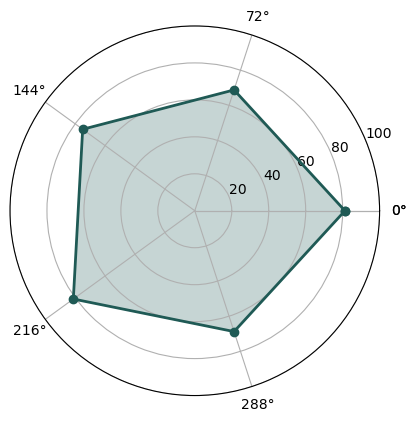

In [406]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age
dfbig5["culture"] = country
dfbig5["gender"] = sex

emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [262]:
# grp = dfbig5.groupby(by=["group"])

# for group, data in grp:
    # interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")
soceng_std

GROUP  ID  social_engagement_std
0   study1   1               0.468462
1   study1   2               0.475098
2   study1   3               0.445571
3   study1   4               0.480617
4   study1   5               0.322680
5   study2   1               0.502077
6   study2   2               0.468974
7   study2   3               0.452332
8   study2   4               0.404874
9   study2   5               0.477381
10  study3   1               0.454123
11  study3   2               0.458379
12  study3   3               0.491459
13  study3   4               0.504936
14  study3   5               0.446244
15  study4   1               0.439460
16  study4   2               0.495188
17  study4   3               0.454563
18  study4   4               0.490162
19  study4   5               0.425897
20  study5   1               0.425559
21  study5   2               0.487143
22  study5   3               0.452912
23  study5   4               0.514915
24  study5   5               0.455076
25  study6   1               0.429936
26  study6   2               0.493472
27  study6   3               0.484168
28  study6   4               0.473761
29  study6   5               0.375947

In [263]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles

ID  Frame   GROUP  social_engagement_mean  social_engagement_std
0      1    -50  study1                0.347481               0.460369
1      1    -50  study2                0.440768               0.500212
2      1    -50  study3                0.350000               0.489360
3      1    -50  study4                0.280500               0.441673
4      1    -50  study5                0.214286               0.425815
...   ..    ...     ...                     ...                    ...
2995   5     49  study2                0.448380               0.499697
2996   5     49  study3                0.357043               0.444666
2997   5     49  study4                0.189266               0.402298
2998   5     49  study5                0.519899               0.456314
2999   5     49  study6                0.243564               0.406861

[3000 rows x 5 columns]

In [264]:
dfbig5

emotional_stability  extraversion  agreeableness  conscientiousness  \
0                 75.00         68.75          75.00              43.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
3                 75.00         81.25          81.25              81.25   
4                 68.75         81.25          75.00              68.75   
5                 68.75         68.75          75.00              68.75   
6                 81.25         68.75          68.75             112.50   
7                106.25         68.75          75.00             100.00   
8                 68.75         68.75          81.25             100.00   
9                 87.50         68.75          68.75              75.00   
10                62.50         68.75          75.00              68.75   
11                62.50         75.00          68.75              75.00   
12               100.00         62.50          56.25              87.50   
13                68.75         81.25          75.00              75.00   
14                75.00         68.75          81.25              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
20                75.00         75.00          75.00              87.50   
21                87.50         81.25          81.25              68.75   
22                87.50         62.50          81.25              93.75   
23                75.00         87.50          75.00              75.00   
24                93.75         81.25          81.25              62.50   
25                43.75         68.75          81.25              87.50   
26                75.00         62.50          62.50              50.00   
27                68.75         68.75          56.25              62.50   
28                75.00         93.75          93.75              56.25   
29                81.25         68.75          75.00              81.25   

    intellect  helmet  group  age culture  gender  
0       68.75       4      1   30      GB    male  
1       75.00       2      1   29      GB   other  
2       81.25       3      1   28      GR    male  
3       75.00       5      1   28      GB    male  
4       75.00       1      1   34      NG    male  
5       75.00       2      2   28      GB    male  
6       75.00       4      2   32      GB  female  
7       68.75       3      2   30      GB    male  
8       75.00       5      2   34      GB    male  
9       62.50       1      2   29      GB    male  
10      68.75       5      3   40      GB    male  
11      87.50       4      3   24      GB    male  
12      75.00       1      3   26      PT    male  
13      62.50       2      3   34      IT  female  
14      75.00       3      3   27      GB  female  
15      81.25       1      4   53      GB  female  
16      81.25       2      4   34      CO  female  
17      68.75       3      4   59      GB    male  
18      68.75       4      4   38      HK  female  
19      56.25       5      4   34      LK    male  
20      87.50       1      5   27      GB  female  
21      68.75       3      5   26      TH    male  
22      68.75       5      5   46      GB    male  
23      75.00       2      5   53      GB    male  
24      68.75       4      5   29      GB  female  
25      62.50       4      6   26      GB    male  
26      75.00       1      6   28      GB    male  
27      81.25       5      6   28      GB  female  
28      62.50       3      6   30      GB    male  
29      68.75       2      6   34      GB    male

In [265]:
big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr = df_corr.loc[:,~df_corr.columns.duplicated()].copy()
df_corr.index = np.arange(1, len(df_corr) + 1)

dfbig5 = dfbig5.rename(columns={"helmet": "ID", "group": "GROUP"})

df_corr['ID'] = df_corr['ID'].astype(int)

for idx, name in df_corr.iterrows():
    new = name['GROUP'][-1]
    df_corr.loc[idx, 'GROUP'] = new

df_corr['ID'] = df_corr['ID'].astype(int)
df_corr['GROUP'] = df_corr['GROUP'].astype(int)
dfbig5['ID'] = dfbig5['ID'].astype(int)
dfbig5['GROUP'] = dfbig5['GROUP'].astype(int)


full_corr = pd.merge(dfbig5, df_corr, on=['GROUP', 'ID'])
full_corr


emotional_stability  extraversion  agreeableness  conscientiousness  \
0                 75.00         68.75          75.00              43.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
3                 75.00         81.25          81.25              81.25   
4                 68.75         81.25          75.00              68.75   
5                 68.75         68.75          75.00              68.75   
6                 81.25         68.75          68.75             112.50   
7                106.25         68.75          75.00             100.00   
8                 68.75         68.75          81.25             100.00   
9                 87.50         68.75          68.75              75.00   
10                62.50         68.75          75.00              68.75   
11                62.50         75.00          68.75              75.00   
12               100.00         62.50          56.25              87.50   
13                68.75         81.25          75.00              75.00   
14                75.00         68.75          81.25              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
20                75.00         75.00          75.00              87.50   
21                87.50         81.25          81.25              68.75   
22                87.50         62.50          81.25              93.75   
23                75.00         87.50          75.00              75.00   
24                93.75         81.25          81.25              62.50   
25                43.75         68.75          81.25              87.50   
26                75.00         62.50          62.50              50.00   
27                68.75         68.75          56.25              62.50   
28                75.00         93.75          93.75              56.25   
29                81.25         68.75          75.00              81.25   

    intellect  ID  GROUP  age culture  gender  social_engagement_mean  \
0       68.75   4      1   30      GB    male                0.458214   
1       75.00   2      1   29      GB   other                0.462961   
2       81.25   3      1   28      GR    male                0.256076   
3       75.00   5      1   28      GB    male                0.117778   
4       75.00   1      1   34      NG    male                0.383585   
5       75.00   2      2   28      GB    male                0.369500   
6       75.00   4      2   32      GB  female                0.235048   
7       68.75   3      2   30      GB    male                0.331478   
8       75.00   5      2   34      GB    male                0.381752   
9       62.50   1      2   29      GB    male                0.475408   
10      68.75   5      3   40      GB    male                0.360817   
11      87.50   4      3   24      GB    male                0.471321   
12      75.00   1      3   26      PT    male                0.316798   
13      62.50   2      3   34      IT  female                0.313426   
14      75.00   3      3   27      GB  female                0.394838   
15      81.25   1      4   53      GB  female                0.326815   
16      81.25   2      4   34      CO  female                0.433822   
17      68.75   3      4   59      GB    male                0.289952   
18      68.75   4      4   38      HK  female                0.441263   
19      56.25   5      4   34      LK    male                0.223454   
20      87.50   1      5   27      GB  female                0.214862   
21      68.75   3      5   26      TH    male                0.524677   

(array([[ 1.,  9., 13.,  5.,  2.],
        [ 0., 14., 14.,  2.,  0.],
        [ 2.,  4., 20.,  4.,  0.],
        [ 3., 11.,  7.,  6.,  3.],
        [ 1., 13., 14.,  2.,  0.]]),
 array([ 43.75,  57.5 ,  71.25,  85.  ,  98.75, 112.5 ]),
 <a list of 5 BarContainer objects>)

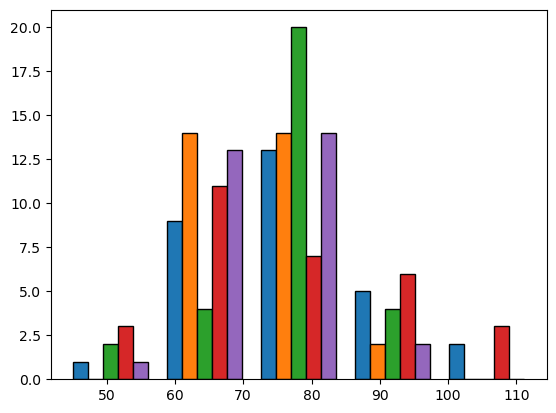

In [270]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

In [271]:
corr_df = std_df.groupby(['GROUP', 'ID'])['std'].mean().reset_index()
corr_df

GROUP  ID       std
0   study1   1  0.257277
1   study1   2  0.177785
2   study1   3  0.299278
3   study1   4  0.278570
4   study1   5  0.284648
5   study2   1  0.314877
6   study2   2  0.336851
7   study2   3  0.342492
8   study2   4  0.303934
9   study2   5  0.365306
10  study3   1  0.422097
11  study3   2  0.396765
12  study3   3  0.410711
13  study3   4  0.399497
14  study3   5  0.275512
15  study4   1  0.317805
16  study4   2  0.427822
17  study4   3  0.432209
18  study4   4  0.359995
19  study4   5  0.459806
20  study5   2  0.249788
21  study5   3  0.213096
22  study5   4  0.417505
23  study5   5  0.305049
24  study6   1  0.325584
25  study6   2  0.346767
26  study6   3  0.305039
27  study6   4  0.308498
28  study6   5  0.172582

In [141]:
big5

['emotional_stability',
 'extraversion',
 'agreeableness',
 'conscientiousness',
 'intellect']

In [272]:
corr_df

GROUP  ID       std
0   study1   1  0.257277
1   study1   2  0.177785
2   study1   3  0.299278
3   study1   4  0.278570
4   study1   5  0.284648
5   study2   1  0.314877
6   study2   2  0.336851
7   study2   3  0.342492
8   study2   4  0.303934
9   study2   5  0.365306
10  study3   1  0.422097
11  study3   2  0.396765
12  study3   3  0.410711
13  study3   4  0.399497
14  study3   5  0.275512
15  study4   1  0.317805
16  study4   2  0.427822
17  study4   3  0.432209
18  study4   4  0.359995
19  study4   5  0.459806
20  study5   2  0.249788
21  study5   3  0.213096
22  study5   4  0.417505
23  study5   5  0.305049
24  study6   1  0.325584
25  study6   2  0.346767
26  study6   3  0.305039
27  study6   4  0.308498
28  study6   5  0.172582

In [273]:
for cat in big5+ ["age"]:
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], corr_df["std"])))
print("===================================================")

ValueError: x and y must have the same length.

In [155]:
#CORR INTERACTION COUNT AND BIG 5
for cat in big5+ ["age", 'gender', 'culture']:
    print("no. of interactions <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], interaction_counts_df["occurrences"])))
print("===================================================")

no. of interactions <-> emotional_stability: (r, p): (0.2395350687902042, 0.5050607620580976) 
no. of interactions <-> extraversion: (r, p): (-0.8539125638299666, 0.0016641422636672865) 
no. of interactions <-> agreeableness: (r, p): (-0.3770308417611187, 0.2828246328162076) 
no. of interactions <-> conscientiousness: (r, p): (0.09643959372630748, 0.7909895324835328) 
no. of interactions <-> intellect: (r, p): (-0.229550012918565, 0.5234927055838351) 
no. of interactions <-> age: (r, p): (0.09391786047461383, 0.7963572535725658) 


TypeError: unsupported operand type(s) for +: 'float' and 'str'

PearsonRResult(statistic=-0.8026707239676593, pvalue=0.005188246060875324)

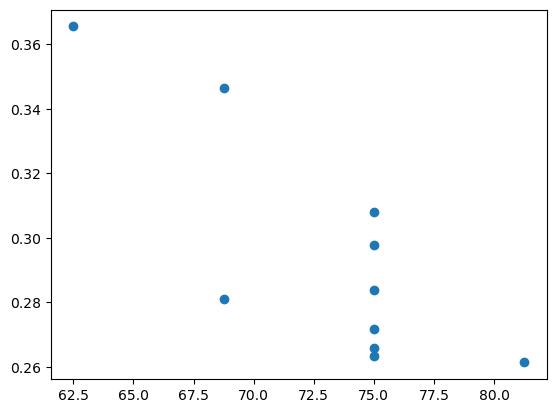

In [468]:
plt.scatter(full_corr["intellect"], corr_df["std"])

scipy.stats.pearsonr(full_corr["intellect"], corr_df["std"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="emotional_stability")
# scipy.stats.pearsonr(full_corr["emotional_stability"], df_corr["social_engagement_std"])

# sns.lmplot(data=full_corr, x="social_engagement_before", y="agreeableness")
# scipy.stats.pearsonr(full_corr["agreeableness"], df_corr["social_engagement_before"])

# sns.lmplot(data=full_corr, x="social_engagement_std", y="age")
# scipy.stats.pearsonr(full_corr["age"], df_corr["social_engagement_std"])

In [469]:
clus_df

-50       -49       -48       -47       -46       -45       -44  \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.515307  0.512555  0.507615  0.507378  0.509860  0.506314  0.497577   
2   0.666978  0.650435  0.633123  0.621162  0.608057  0.595071  0.584406   
3   0.389084  0.373711  0.361469  0.350529  0.339247  0.332624  0.326707   
4   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
..       ...       ...       ...       ...       ...       ...       ...   
83  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
84  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
85  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
86  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
87  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

         -43       -42       -41  ...  OGINDEX  index       std   GROUP  \
0   1.000000  1.000000  1.000000  ...      350      3  0.190108  study1   
1   0.496276  0.490546  0.492118  ...      550      5  0.184403  study1   
2   0.573367  0.564836  0.557690  ...     1050     10  0.245479  study1   
3   0.323559  0.322483  0.324654  ...     1150     11  0.253994  study1   
4   1.000000  1.000000  1.000000  ...     1350     13  0.281265  study1   
..       ...       ...       ...  ...      ...    ...       ...     ...   
83  0.000000  0.000000  0.000000  ...    29350    293  0.375852  study2   
84  0.000000  0.000000  0.000000  ...    29450    294  0.221349  study2   
85  0.000000  0.000000  0.000000  ...    30050    300  0.173115  study2   
86  0.000000  0.000000  0.000000  ...    30450    304  0.128712  study2   
87  1.000000  1.000000  1.000000  ...    30750    307  0.252593  study2   

    Framez       Zero        One        Two      Three       Four  
0     70.0  36.659110  41.613824  37.311973  39.461974  39.280765  
1    110.0  31.272686  37.618944  38.083193  37.325728  37.650689  
2    210.0  25.308970  34.546213  31.521402  32.962057  32.833297  
3    230.0  28.810263  35.967494  37.935570  37.420642  37.524635  
4    270.0  35.928566  29.608256  26.608805  26.988588  27.579836  
..     ...        ...        ...        ...        ...        ...  
83  5870.0   5.259533  19.006095  16.849892  16.645956  15.488912  
84  5890.0   0.193260   6.625772   4.446295   4.674393   4.639898  
85  6010.0   6.129055   3.382255   5.908537   3.270843   4.153413  
86  6090.0   0.212777   4.850782   3.285802   3.265144   3.079221  
87  6150.0  36.781662  33.774275  29.902562  29.933403  30.444175  

[88 rows x 112 columns]

In [470]:
full_corr

emotional_stability  extraversion  agreeableness  conscientiousness  \
0                75.00         68.75          75.00              43.75   
1                75.00         81.25          87.50              68.75   
2                75.00         81.25          75.00              93.75   
3                75.00         81.25          81.25              81.25   
4                68.75         81.25          75.00              68.75   
5                68.75         68.75          75.00              68.75   
6                81.25         68.75          68.75             112.50   
7               106.25         68.75          75.00             100.00   
8                68.75         68.75          81.25             100.00   
9                87.50         68.75          68.75              75.00   

   intellect  ID  GROUP  age  social_engagement_mean  social_engagement_std  \
0      68.75   4      1   30                0.380990               0.450451   
1      75.00   2      1   29                0.412467               0.473962   
2      81.25   3      1   28                0.318609               0.438333   
3      75.00   5      1   28                0.299851               0.434356   
4      75.00   1      1   34                0.419667               0.473072   
5      75.00   2      2   28                0.429665               0.476774   
6      75.00   4      2   32                0.316036               0.400290   
7      68.75   3      2   30                0.410535               0.468728   
8      75.00   5      2   34                0.334112               0.463339   
9      62.50   1      2   29                0.423030               0.477875   

   social_engagement_after  social_engagement_before  social_engagement_delta  
0                 0.383042                  0.378785                 0.004257  
1                 0.417986                  0.406906                 0.011080  
2                 0.302971                  0.334242                -0.031270  
3                 0.308248                  0.291074                 0.017174  
4                 0.447002                  0.392745                 0.054258  
5                 0.450343                  0.410432                 0.039911  
6                 0.311744                  0.319578                -0.007834  
7                 0.413390                  0.406895                 0.006495  
8                 0.322878                  0.346084                -0.023206  
9                 0.424899                  0.420715                 0.004184

In [472]:
ahh_df = clus_df.groupby(['ID', 'GROUP'])['Zero'].mean().reset_index()
ahh_df

ID   GROUP       Zero
0   1  study1  24.796169
1   1  study2  11.350716
2   2  study1  23.806211
3   2  study2  14.582503
4   3  study1  27.572172
5   3  study2  12.369846
6   4  study1  26.422071
7   4  study2  22.462571
8   5  study1  23.280720
9   5  study2  16.864788

In [473]:
for cat in big5+ ["age"]:
    print("0 <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], ahh_df["Zero"])))
    print()

0 <-> emotional_stability: (r, p): PearsonRResult(statistic=0.07533892185034652, pvalue=0.8361283462869088) 

0 <-> extraversion: (r, p): PearsonRResult(statistic=-0.14675328040267424, pvalue=0.6858020344521891) 

0 <-> agreeableness: (r, p): PearsonRResult(statistic=-0.4721283848969771, pvalue=0.16827615708183466) 

0 <-> conscientiousness: (r, p): PearsonRResult(statistic=0.2763312127266489, pvalue=0.43960625130978526) 

0 <-> intellect: (r, p): PearsonRResult(statistic=0.08707261389346238, pvalue=0.8109661850152179) 

0 <-> age: (r, p): PearsonRResult(statistic=0.677120216190372, pvalue=0.03149007336007724) 



### Detect if someone talking

In [948]:
import feat
from feat import Detector

# Define the function just to extract landmarks from images
detector = Detector(emotion_model='resmasknet', landmark_model="mobilefacenet", au_model='xgb', device='cpu')

detector

##try different model!!!!

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

In [20]:
video_prediction = detector.detect_video("videos/H1s.mp4", skip_frames=24)
video_prediction.head()

100%|███████████████████████████████████████| 248/248 [1:16:11<00:00, 18.43s/it]


FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
frame                                                                      
0       532.563961    9.967422     780.827320      997.105448   0.992355   
24      531.064155   -4.842649     775.902687      999.974197   0.990961   
48      566.043095  -59.444923     804.724289     1072.035427   0.989011   
72      567.384453  -20.973644     818.857496     1061.639273   0.987186   
72     1435.308027  478.783121      55.583254       62.240325   0.880153   

               x_0          x_1          x_2          x_3          x_4  ...  \
frame                                                                   ...   
0       570.161365   570.395058   581.043308   603.839103   646.817455  ...   
24      563.114675   565.335809   579.351759   606.251386   652.944347  ...   
48      569.165530   570.504059   584.957948   611.856668   654.867630  ...   
72      531.454649   537.652810   557.953823   588.028309   632.719703  ...   
72     1442.385846  1440.565313  1440.196010  1439.958253  1439.866873  ...   

          anger   disgust      fear  happiness   sadness  surprise   neutral  \
frame                                                                          
0      0.000108  0.016044  0.000142   0.224129  0.131102  0.000431  0.628045   
24     0.000072  0.003285  0.000030   0.470029  0.168435  0.000177  0.357972   
48     0.001277  0.007510  0.007431   0.139870  0.153835  0.019572  0.670504   
72     0.001197  0.003922  0.011565   0.352511  0.221603  0.313005  0.096198   
72     0.123673  0.323415  0.082240   0.279507  0.129806  0.024104  0.037254   

                input  frame  approx_time  
frame                                      
0      videos/H1s.mp4      0        00:00  
24     videos/H1s.mp4     24        00:00  
48     videos/H1s.mp4     48        00:00  
72     videos/H1s.mp4     72        00:01  
72     videos/H1s.mp4     72        00:01  

[5 rows x 174 columns]

In [4]:
print(video_prediction.columns.tolist())

['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight', 'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29', 'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39', 'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', '

In [6]:
video_prediction['AU25'].mean()
# video_prediction['AU27'].max()
# video_prediction['AU22'].max()
# video_prediction['AU14'].max()
# video_prediction['AU26'].max()

0.24123338

In [10]:
mouth = video_prediction[["AU25", "AU26", "AU14"]]
mouth.iloc[150:180]

AU25      AU26      AU14
frame                              
3528   0.358712  0.341844  0.216655
3552   0.102041  0.096459  0.280882
3576   0.008942  0.105147  0.269985
3600   0.081196  0.202491  0.173768
3624   0.643201  0.119092  0.249561
3624   0.810326  0.097260  0.623785
3648   0.110290  0.127742  0.345433
3672   0.153207  0.177455  0.520680
3696   0.219818  0.155854  0.528218
3720   0.775021  0.090153  0.426988
3744   0.169367  0.157559  0.431578
3768   0.292496  0.102191  0.343140
3792   0.906183  0.498110  0.174598
3816   0.122669  0.214201  0.187119
3840   0.048341  0.184248  0.277051
3864   0.048479  0.154014  0.372769
3888   0.025162  0.093680  0.403279
3912   0.081039  0.423501  0.594517
3936   0.074056  0.172562  0.589890
3960   0.115731  0.452172  0.389371
3984   0.050268  0.180894  0.269405
4008   0.113643  0.316171  0.528033
4032   0.179619  0.365015  0.390431
4056   0.202178  0.253346  0.464590
4080   0.371003  0.383603  0.319375
4104   0.003959  0.184879  0.334447
4128   0.569733  0.324537  0.396223
4152   0.107284  0.392294  0.425218
4176   0.187478  0.478269  0.559717
4200   0.090989  0.446169  0.339091

In [14]:
talking = video_prediction.loc[(video_prediction['AU25'] >= 0.5)]
talking

FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
frame                                                                      
264     591.579087  -26.218017     789.476197     1098.641643   0.993102   
1200    525.997361   -8.271468     746.943807     1016.173981   0.991313   
1248   1498.122615  687.432755      84.358451      107.830941   0.624091   
1320    546.287795   14.122174     756.349073     1044.342746   0.978113   
1368    513.497846   -6.151719     799.598827     1065.187153   0.980322   
1704    432.882462  -17.776801     799.160566     1057.115303   0.979189   
1776    546.743611  -19.952512     787.712794     1046.410364   0.984833   
1800    527.946610  -20.495589     797.871765     1045.259944   0.990759   
1848    634.841961    5.431215     772.625686      968.795452   0.988635   
1920    473.080719  -84.784735     770.015431     1040.308500   0.986640   
1944    455.720084 -130.187308     775.162027     1046.401517   0.979198   
1992    692.757112  -17.586170     750.782815      923.010048   0.978823   
2016    580.536811  -40.927218     753.864727      964.544295   0.986829   
2496    581.662281   78.724731     780.277277     1011.168095   0.991287   
2736    501.782748  -28.324855     818.138083     1028.337353   0.994924   
2760    485.802682  -25.707324     834.505345     1034.325658   0.994150   
2928    526.189282  -10.577640     804.048672     1030.884653   0.990866   
3264    541.968966   -9.798732     768.027157     1016.730807   0.988293   
3384    654.834730  -45.024111     763.140133      948.675729   0.991451   
3624    542.354261   -3.934213     743.752758      956.705975   0.992919   
3624    111.861395  305.893073     184.378168      241.222235   0.567725   
3720    550.821058    4.894724     781.579049     1017.472908   0.990623   
3792    587.700233  -43.062449     794.642325     1001.369044   0.990759   
4128    416.325889  -88.904597     801.739772      977.595585   0.981109   
4224    646.138031  -87.128331     778.574219      936.711652   0.989829   
4248    697.441183  -50.298938     754.537139      952.438741   0.993513   
4704    620.957106  -45.198646     825.819642     1096.897286   0.980700   
4800    435.034664  -45.983176     771.668282      952.590283   0.986790   
4800    167.770008  445.882969      87.616479      151.743804   0.697690   
4848    566.201246  -75.967460     769.869990      967.301610   0.990434   
5088    549.971933  -15.828215     791.478150     1054.431252   0.981382   
5112    512.966551   -7.905241     774.968057     1022.051077   0.989831   
5208    550.303703  -12.421531     778.904908     1045.362097   0.988599   
5232    547.271812   -6.279642     769.589769     1001.161930   0.991173   
5256    547.633662   -6.850410     765.778641      999.430716   0.993397   
5280    548.994029    3.138407     760.942308     1016.803458   0.993728   
5304    529.262024    0.627405     781.133670     1038.130056   0.991778   
5328    539.259117   -4.986731     778.764201     1029.624671   0.991993   
5472    539.842408   21.008242     780.281787      990.665867   0.984237   
5688    549.942860    1.005969     766.264499     1006.711009   0.993455   
5712    536.766199   -4.082695     772.310912     1017.031298   0.991633   
5736    543.459678    0.127216     767.574584     1010.855885   0.991763   
5784    535.897058    4.063742     775.763545     1021.613436   0.989540   

               x_0          x_1          x_2          x_3          x_4  ...  \
frame                                                                   ...   
264     515.216702   529.333204   557.775862   597.789668   655.236249  ...   
1200    534.166858   533.849926   546.408360   572.901413   620.165778  ...   
1248   1511.742292  1509.421750  1508.051610  1508.550142  1511.747005  ...   
1320    564.009824   559.176466   565.601136   589.165493   635.686488  ...   
1368    535.524606   531.294184   540.687170   569.248573   621.560805  ...   
1704    417.602811   426.607488   4

In [ ]:
#split video into frames
#ffmpeg -i videos/CROP/H1CROP.mp4 -vf fps=1 "videos/CROP/frames/group4/H1-frame%05d.png"